# <center> Punchlines as Mirrors: Social Attitudes, Politics, and Biases in the *The New Yorker* Caption Contest

Humor reflects society’s views, stereotypes, and political climate. The New Yorker Caption Contest offers a unique lens into this process, showing what people find acceptable, absurd, or taboo.

**Narrative Flow**:

- **Introduction:** The Caption Contest as a cultural mirror — humor as social data.
- **Axis 1:** What Is Considered Funny
- **Axis 2:** Professions & politics → humor about authority and power
- **Axis 3:** Social norms → gender roles
- **Conclusion:** Humor not only entertains — it reveals evolving attitudes, biases, and the cultural pulse of society.
---

In [1]:
# The necessary packages for this notebook
import sys
import os

# Data manipulation
import numpy as np
import pandas as pd
import pickle
import joblib
from scipy.sparse import load_npz
import ast
from collections import defaultdict

# Statistical analysis
import scipy.stats as stats
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt


# <center> Professions And Politics

The aim of this axis is to tell a data story: *How do occupations occur in captions and what is their effect on their performance in the competition?*. This is by no means a simple task, but can be easily broken down into segments that make it easier to swallow. An occupational database was created previously, and is going to form the basis of the research of occupations that occur in the captions. The method to identify the occupations is by checking if they are directly mentioned: we cannot account for implied meaning, as it does not come so easily to algorithms as it comes to humans. We realsie this limits the research, and we will keep it mind for future analyses.
---

# <center> All data files previously created with their column names and what each column represents. This is summarised by the use of ChatGPT.
The occupational database is contained in the file called: ``final_combined_occupations.csv`` in the data folder. It can be read from this file by: "../../data/final_combined_occupations.csv".

The ``../../data/data_prepared_v2.pkl`` is a database of the competitions, where the captions were only lightly cleaned for the bag of words, while ``data/cleaned_data_nouns_with_occupations.pkl`` is the database that had a much heavier cleaning by having some form of lemmatising, fixing for typos, removing punctuation and so forth. It also has a column which contains the noun count in to form of a dictionary. Singular and plural terms were accounted for as being the same job already when preparing this count. A useful step is to merge these two datasets together, and save them as a single pickle, while deleting the other two.

``occupation_analysis_df`` refers to a new dataframe which was created by having as columns: ['Occupation_Term', 'Caption_Count' , 'Avg_Funniness', 'Std_Funniness', 'Contests', 'Num_Contests']

In [2]:
#reload data to continue analysis
with open('../../data/data_prepared_v2.pkl', "rb") as f:
    official_stored_data_loaded = pickle.load(f)
print("Reprocessed official data loaded successfully.")
dataA_v2 = official_stored_data_loaded["dataA"]
dataC_v2 = official_stored_data_loaded["dataC"]

#open the pickle
with open('../../data/cleaned_data_nouns_with_occupations.pkl', "rb") as f:
    noun_stored_data_loaded = pickle.load(f)

dataA_nouns = noun_stored_data_loaded["dataA_nouns"]
dataC_nouns = noun_stored_data_loaded["dataC_nouns"]
dataA_startID = noun_stored_data_loaded["dataA_startID"]
dataA_endID = noun_stored_data_loaded["dataA_endID"]
dataC_lastGoodID = noun_stored_data_loaded["dataC_lastGoodID"]

#read occupation analysis
occupation_analysis_df = pd.read_csv("occupation_analysis.csv")
print("Occupation analysis data loaded successfully.")



vectorizer = joblib.load("vectorizer.joblib")


tfidf_matrix = load_npz("tfidf_matrix.npz")
print("TF-IDF matrix loaded successfully.")
occupation_indices = np.load("occupation_indices.npy")
print("Occupation indices loaded successfully.")
occupation_counts = np.load("occupation_counts.npy")
print("Occupation counts loaded successfully.")

feature_names = np.array(vectorizer.get_feature_names_out())
    
# Funniness metric is "mean" for now.
funniness_metric=  'mean'
documents = []
all_funniness = []
all_contest_ids = []

for i in range(len(dataA_v2)):
    df = dataA_v2[i]
    df['contest_id'] = i * np.ones(len(df), dtype=int)
    documents.extend(df['cleaned_caption_v2'].tolist())
    all_funniness.extend(df[funniness_metric].tolist())
    all_contest_ids.extend(df['contest_id'].tolist())  # make sure this column exists

Reprocessed official data loaded successfully.
Occupation analysis data loaded successfully.
TF-IDF matrix loaded successfully.
Occupation indices loaded successfully.
Occupation counts loaded successfully.


In [3]:
'''#load occupations
df_occupations = pd.read_csv("final_combined_occupations.csv")

# Convert each string to a Python list
df_occupations['Synonyms'] = df_occupations['Synonyms'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# create mapping from singular term to plural. We already have this in occupational data
# Create a mapping from synonym to occupation
occupations = df_occupations['Occupation']
synonyms_list = df_occupations['Synonyms'].tolist()

syn_to_occ = {
    synonym.lower(): occ
    for occ, synonyms in zip(occupations, synonyms_list)
    for synonym in synonyms
}

# Subset TF-IDF matrix to only occupation columns
occupation_tfidf_matrix = tfidf_matrix[:, occupation_indices]

# Count the number of captions where each occupation appears (non-zero entries)
occupation_counts_nonzero = (occupation_tfidf_matrix > 0).sum(axis=0)  # still a matrix

# Convert to 1D numpy array
occupation_counts_nonzero = np.array(occupation_counts_nonzero).flatten()

#Add the plural occupations into the singular versions, and only keep the singular versions
occupation_count_dict = {}
for idx, count in zip(occupation_indices, occupation_counts_nonzero):
    term = feature_names[idx]
    if term in syn_to_occ:
        singular_occ = syn_to_occ[term]
        if singular_occ in occupation_count_dict:
            occupation_count_dict[singular_occ] += count
        else:
            occupation_count_dict[singular_occ] = count

# Convert to Series for easier handling
occupation_count_series = pd.Series(occupation_count_dict)

#manual correction for boss which was turned into bos
if 'bos' in occupation_count_series.index:
    occupation_count_series['boss'] = occupation_count_series.get('boss', 0) + occupation_count_series['bos']
    occupation_count_series = occupation_count_series.drop('bos')'''

'#load occupations\ndf_occupations = pd.read_csv("final_combined_occupations.csv")\n\n# Convert each string to a Python list\ndf_occupations[\'Synonyms\'] = df_occupations[\'Synonyms\'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)\n\n# create mapping from singular term to plural. We already have this in occupational data\n# Create a mapping from synonym to occupation\noccupations = df_occupations[\'Occupation\']\nsynonyms_list = df_occupations[\'Synonyms\'].tolist()\n\nsyn_to_occ = {\n    synonym.lower(): occ\n    for occ, synonyms in zip(occupations, synonyms_list)\n    for synonym in synonyms\n}\n\n# Subset TF-IDF matrix to only occupation columns\noccupation_tfidf_matrix = tfidf_matrix[:, occupation_indices]\n\n# Count the number of captions where each occupation appears (non-zero entries)\noccupation_counts_nonzero = (occupation_tfidf_matrix > 0).sum(axis=0)  # still a matrix\n\n# Convert to 1D numpy array\noccupation_counts_nonzero = np.array(occupation_counts

In [4]:
# save this table
occupation_analysis_df.to_csv("occupation_analysis.csv", index=False)

Verifying this is correctly done by seeing if the counts still match the previous plot.

In [5]:
# Preview top 20 occupations
occupation_analysis_df.head(50)

Occupation_Term  Caption_Count  Avg_Funny_Centered  Std_Funny_Centered  \
0            clown           5922           -0.079906            1.235287   
1             boss           5828           -0.134886            1.271115   
2           doctor           5469           -0.119316            1.292717   
3        president           4861           -0.057399            1.413229   
4           lawyer           4255            0.078447            1.421459   
5             chef           4187           -0.035563            1.457339   
6            owner           3440            0.056988            1.505547   
7             cook           2361           -0.134927            1.227482   
8              ceo           2125           -0.167946            1.085491   
9            judge           2125           -0.041058            1.720249   
10          leader           2093           -0.112580            1.355862   
11        security           1936           -0.049341            1.293435   
12             cop           1911           -0.096529            1.227904   
13        employee           1829           -0.055410            1.195384   
14          member           1552            0.041731            1.497386   
15           agent           1547           -0.063806            1.284970   
16          cowboy           1426           -0.098338            1.296422   
17          driver           1310           -0.030425            1.418419   
18        attorney           1291            0.153013            1.640899   
19           guard           1283            0.053752            1.421201   
20           media           1187           -0.049352            1.445881   
21         cleaner            950           -0.075412            1.360404   
22           chief            916           -0.128381            1.714125   
23       executive            891           -0.073229            1.083038   
24          washer            857            0.061637            1.130244   
25       assistant            844           -0.116602            1.407527   
26          critic            803            0.104317            1.350607   
27          police            799           -0.195703            1.193521   
28          hunter            793            0.004969            1.487421   
29           solar            760            0.074398            1.392150   
30        director            756           -0.163088            1.104816   
31          intern            752           -0.050602            1.308434   
32     real estate            743           -0.088097            1.398042   
33         cracker            700           -0.085733            1.207409   
34         starter            694            0.094161            1.396763   
35        magician            682           -0.017109            1.553542   
36       detective            642            0.017486            1.349824   
37     conditioner            629           -0.100158            0.958034   
38       professor            627           -0.112694            1.197440   
39         printer            624            0.009170            1.297895   
40       secretary            613            0.123081            1.913993   
41           maker            612           -0.057445            1.309771   
42            film            608           -0.273843            1.221764   
43          blower            572            0.067250            1.314829   
44     maintenance            564            0.073008            1.273281   
45       scientist            559           -0.178359            1.268829   
46      politician            537           -0.080799            1.437392   
47         realtor            531            0.203401            1.666090   
48          tenant            529           -0.055090            0.939240   
49          runner            529           -0.173872            1.289016   

                                             Contests  \
0   {0, 1, 4, 6, 1

A dataframe that contains all the caption, their funniness and the contest id.

In [6]:
from scipy.stats import zscore
def compute_funny_ranking(data, by_image=False):
    """
    Compute humor ranking metrics for caption data.
    
    Parameters
    ----------
    data : pd.DataFrame or list[pd.DataFrame]
        Either a single merged dataframe or a list of dataframes per image.
    by_image : bool, optional (default=False)
        If True, compute rankings within each image dataframe in the list.
        If False, compute one global ranking on the merged dataframe.
        
    Returns
    -------
    pd.DataFrame or list[pd.DataFrame]
        DataFrame(s) with additional columns:
        ['funny_score', 'rank_funny']
    """
 
    def _compute(df):
        df = df.copy()

        # Proportions
        df['funny_over_total'] = df['funny'] / df['votes']
        df['unfunny_over_total'] = df['not_funny'] / df['votes']

        # Weighted z-scores
        df['funny_z'] = zscore(df['funny_over_total'] * np.log1p(df['votes']))
        df['not_funny_z'] = zscore(df['unfunny_over_total'] * np.log1p(df['votes']))

        # Combined metric and rank
        df['funny_score'] = df['funny_z'] - df['not_funny_z']
        df[f'rank_funny_{level}'] = df['funny_score'].rank(ascending=False, method='max') #'method="max"' assigns tied scores the highest (max) rank among the ties,
                                                                                             # ensuring integer ranks (no fractional values).
        # Remove columns not longer usefull
        df = df.drop(columns=['funny_over_total', 'unfunny_over_total','funny_z','not_funny_z'])
        return df

    # If working with multiple images
    if by_image:
        level = 'image'
        return [_compute(df) for df in data]
    else:
        level = 'overall'
        return _compute(data)

So, In order to compare if a caption is funny compared to all the captions in that current contest, we still need to check funny relative to others within the same contest.

In [7]:
dataA_ranked = compute_funny_ranking(dataA_v2, by_image=True)

documents = []
all_funny_score = []
all_contest_ids = []

for i, df in enumerate(dataA_ranked):
    df["contest_id"] = i
    
    documents.extend(df["cleaned_caption_v2"].tolist())
    all_funny_score.extend(df["funny_score"].tolist())
    all_contest_ids.extend(df["contest_id"].tolist())

captions_df = pd.DataFrame({
    "caption": documents,
    "funny_score": all_funny_score,
    "contest_id": all_contest_ids,
})

captions_df["funny_score_centered"] = (
    captions_df["funny_score"] -
    captions_df.groupby("contest_id")["funny_score"].transform("mean")
)

In [8]:
'''# Initialize dictionary
occupation_contests_dict = {occ: set() for occ in occupation_count_series.index}
occupation_funny_centered_dict = {occ: [] for occ in occupation_count_series.index}
occupation_temporal_counts = {occ: {} for occ in occupation_count_series.index}

# Iterate over captions once
for idx, doc in enumerate(documents):
    doc_lower = doc.lower()
    contest_id = all_contest_ids[idx]
    fun_centered = captions_df.loc[idx, "funny_score_centered"]   # <-- NEW METRIC
    
    for occ in occupation_count_series.index:
        occ_lower = occ.lower()
        if occ_lower in doc_lower:
            occupation_contests_dict[occ].add(contest_id) # which contests it appears in
            occupation_funny_centered_dict[occ].append(fun_centered) # centered funniness scores

            # How often does it appear in a given contest
            occupation_temporal_counts[occ][contest_id] = (
                occupation_temporal_counts[occ].get(contest_id, 0) + 1
            )

# Build dataframe
occupation_analysis_df = pd.DataFrame({
    "Occupation_Term": occupation_count_series.index,
    "Caption_Count": occupation_count_series.values,
    
    # raw centered average
    "Avg_Funny_Centered": [
        np.mean(occupation_funny_centered_dict[occ]) 
        if occupation_funny_centered_dict[occ] else 0.0
        for occ in occupation_count_series.index
    ],
    
    # std of centered scores
    "Std_Funny_Centered": [
        np.std(occupation_funny_centered_dict[occ]) 
        if occupation_funny_centered_dict[occ] else 0.0
        for occ in occupation_count_series.index
    ],

    
    # contests where it appears
    "Contests": [occupation_contests_dict[occ] for occ in occupation_count_series.index],

    "Temporal_Counts": [occupation_temporal_counts[occ] for occ in occupation_count_series.index]
})

# Number of contests
occupation_analysis_df["Num_Contests"] = occupation_analysis_df["Contests"].apply(len)

# Sort
occupation_analysis_df = occupation_analysis_df.sort_values(
    by="Caption_Count", ascending=False
).reset_index(drop=True)

occupation_analysis_df.head(20)
'''

'# Initialize dictionary\noccupation_contests_dict = {occ: set() for occ in occupation_count_series.index}\noccupation_funny_centered_dict = {occ: [] for occ in occupation_count_series.index}\noccupation_temporal_counts = {occ: {} for occ in occupation_count_series.index}\n\n# Iterate over captions once\nfor idx, doc in enumerate(documents):\n    doc_lower = doc.lower()\n    contest_id = all_contest_ids[idx]\n    fun_centered = captions_df.loc[idx, "funny_score_centered"]   # <-- NEW METRIC\n\n    for occ in occupation_count_series.index:\n        occ_lower = occ.lower()\n        if occ_lower in doc_lower:\n            occupation_contests_dict[occ].add(contest_id) # which contests it appears in\n            occupation_funny_centered_dict[occ].append(fun_centered) # centered funniness scores\n\n            # How often does it appear in a given contest\n            occupation_temporal_counts[occ][contest_id] = (\n                occupation_temporal_counts[occ].get(contest_id, 0) + 1\n   

In [9]:
#save the table 
occupation_analysis_df.to_csv("occupation_analysis.csv", index=False)

In [10]:
#load the table
occupation_analysis_df = pd.read_csv("occupation_analysis.csv")
print("Occupation analysis data loaded successfully.")

Occupation analysis data loaded successfully.


---
# <center> Part 1: Occupation frequency and Distribution

This section will focus on the frequency of occupations referenced by occupants. It will plot the most common jobs, and then analyse if there are any which occur rarely, but score really well.

There are three graphs that I will produce here:
1. Bar chart of the top 20.
2. Histogram of occupation frequencies on a log scale
3. Number of contests each top occupation appears in
4. Number of contest each occupation appears in, descending order (+ support)

The final point will show us if there are some jobs which occur in many contexts, meaning that they are universally used, while less frequent occurences must be tied to specific scenes.

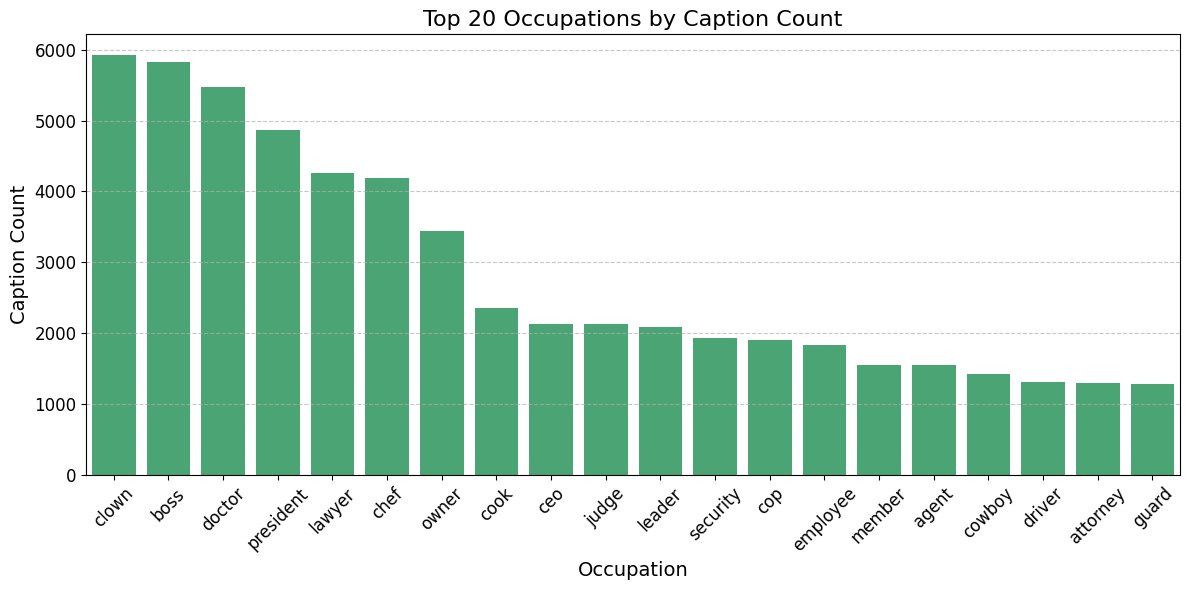

In [11]:
#Graph 1: Top 20 occupations by caption count
plt.figure(figsize=(12, 6))
sns.barplot(
    data=occupation_analysis_df.head(20),
    x="Occupation_Term",
    y="Caption_Count",
    color='mediumseagreen'
)
plt.title("Top 20 Occupations by Caption Count", fontsize = 16)
plt.xlabel("Occupation", fontsize = 14)
plt.ylabel("Caption Count", fontsize = 14)
plt.xticks(rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

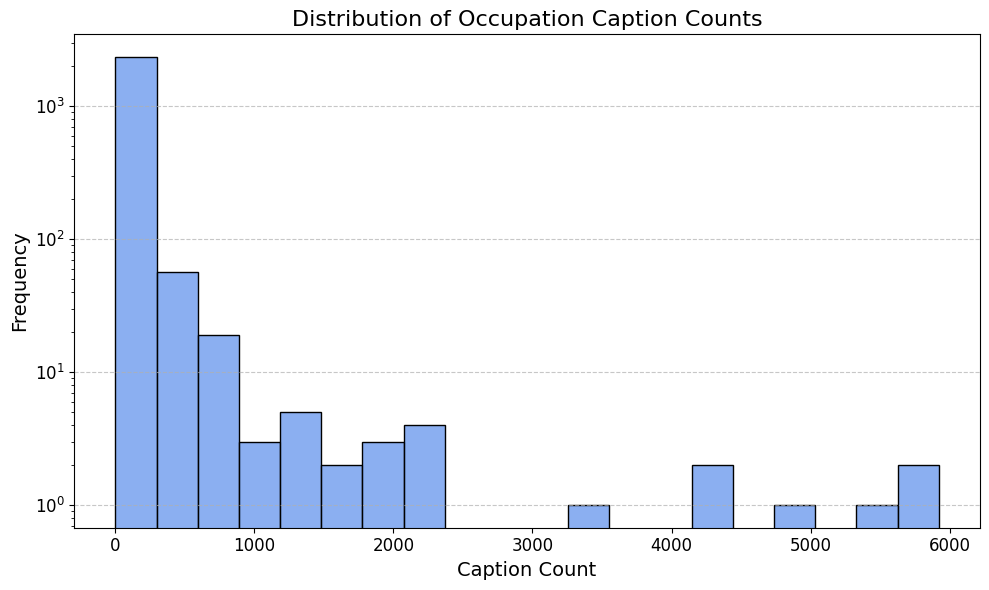

In [12]:
# Graph 2: Histogram of occupation frequencies
plt.figure(figsize=(10, 6))
sns.histplot(
    data=occupation_analysis_df,
    x="Caption_Count",
    bins=20,
    color='cornflowerblue',
)
plt.title("Distribution of Occupation Caption Counts", fontsize=16)
plt.yscale('log')
plt.xlabel("Caption Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

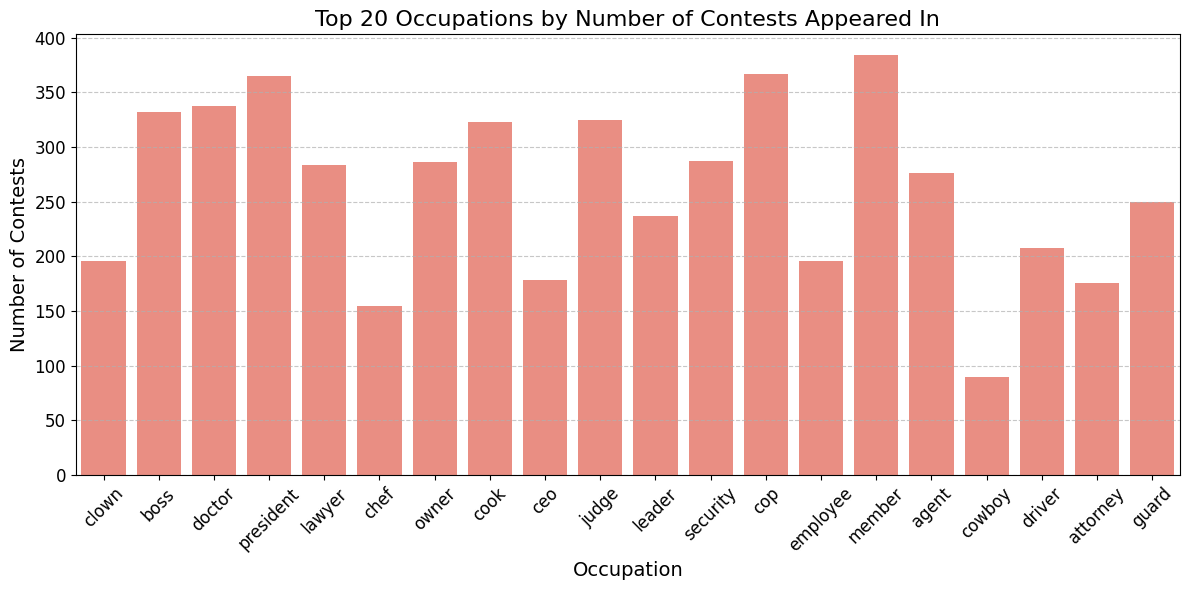

In [13]:
# Graph 3: Number of contests each top occupation appears in
plt.figure(figsize=(12, 6))
sns.barplot(
    data=occupation_analysis_df.head(20),
    x="Occupation_Term",
    y="Num_Contests",
    color='salmon'
)
plt.title("Top 20 Occupations by Number of Contests Appeared In", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Number of Contests", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:
#some manual cleaning: we need to remove some jobs:
remove = ['m', 'pt', 'lin', 'ta', 'ot', 'od', 'dd', 'ob', 'sider', 'np', 'ager', 'roper', 'dc']
for r in remove:
    occupation_analysis_df = occupation_analysis_df[occupation_analysis_df['Occupation_Term'] != r]

#save the table
occupation_analysis_df.to_csv("occupation_analysis.csv", index=False)

In [15]:
#reload the cleaned table
occupation_analysis_df = pd.read_csv("occupation_analysis.csv")
print("Cleaned occupation analysis data loaded successfully.")

# Only needed if Temporal_Counts came from CSV and is string-typed
if occupation_analysis_df["Temporal_Counts"].dtype == object:
    occupation_analysis_df["Temporal_Counts"] = occupation_analysis_df["Temporal_Counts"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )

Cleaned occupation analysis data loaded successfully.


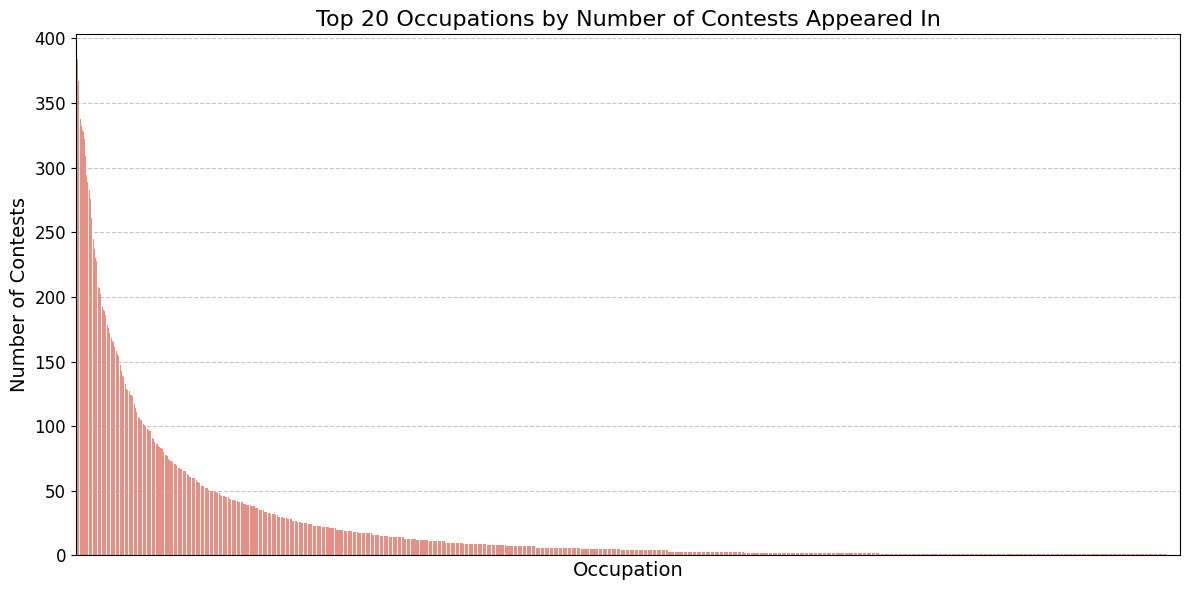

In [16]:
# Graph 4: Number of contest each occupation appears in, descending order

# Sort occupations by number of contests (descending)
top_contests_df = occupation_analysis_df.sort_values(
    by="Num_Contests", ascending=False
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_contests_df,
    x="Occupation_Term",
    y="Num_Contests",
    color='salmon'
)
plt.title("Top 20 Occupations by Number of Contests Appeared In", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Number of Contests", fontsize=14)
plt.xticks([], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

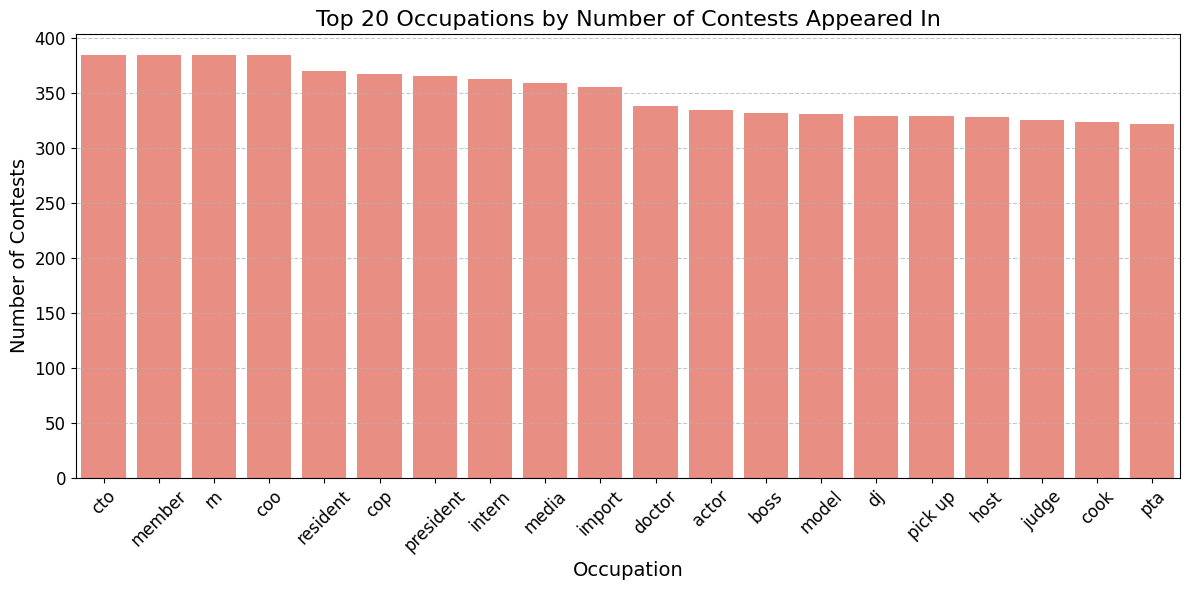

In [17]:
#Support: 

# Sort occupations by number of contests (descending)
top_contests_df = occupation_analysis_df.sort_values(
    by="Num_Contests", ascending=False
).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_contests_df,
    x="Occupation_Term",
    y="Num_Contests",
    color='salmon'
)
plt.title("Top 20 Occupations by Number of Contests Appeared In", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Number of Contests", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---
# <center> Part 2: How funny is an occupation

We will try to answer here whether captions with certain jobs are funnier than similar captions in the same contest? This will also help show which occupations are most associated with the success of a cpation and show if some jobs consistently perform bad.

I will produce three graphs:

1. A scatterplot of frequency and funniness. This will show if there are rare but funny occupations (top left section), common but unfunny (bottom right), and see if there are common strong performers (top right) + (support stats and plot)

2. A bar chart of the top 20 occupations by funnines. For this, we need to use the centered funnines per caption. To avoid some noise, we can filter to only take into account occupations if they are above a certain threshold. + (2 supports)

3. A bar chart with error bars: Mean and std values of funny score centered. + (support)

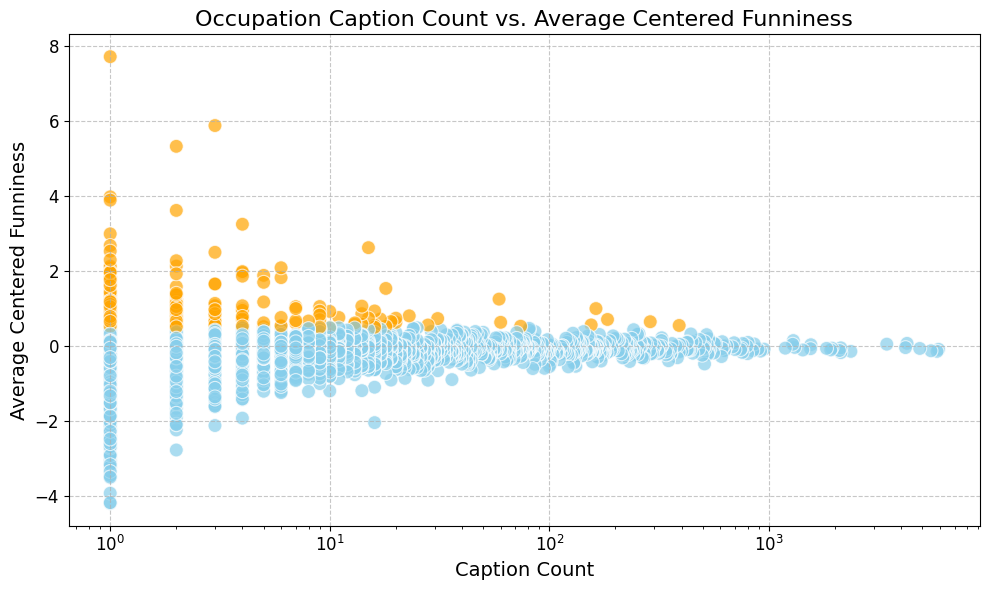

In [18]:
# Graph 1: Scatterlpot of freq vs funniness (centered)

# color code by being above or below a certain threshold
threshold = 0.5 # Adjust this threshold as needed
colors = ['orange' if x >= threshold else 'skyblue' for x in occupation_analysis_df['Avg_Funny_Centered']]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=occupation_analysis_df,
    x="Caption_Count",
    y="Avg_Funny_Centered",
    hue=colors,
    palette=['skyblue', 'orange'],
    legend=False,
    s=100,
    alpha=0.7
)
plt.title("Occupation Caption Count vs. Average Centered Funniness", fontsize=16)
plt.xlabel("Caption Count", fontsize=14)
plt.ylabel("Average Centered Funniness", fontsize=14)
plt.xscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Occupations with Average Centered Funniness above 0.5
priest: 390 occurrences
gatherer: 288 occurrences
mailman: 184 occurrences
branch manager: 163 occurrences
pointer: 155 occurrences
meteorologist: 74 occurrences
head waiter: 60 occurrences
violinist: 59 occurrences
house sitter: 31 occurrences
venture capitalist: 28 occurrences
leg man: 23 occurrences
archeologist: 20 occurrences
airbnb host: 20 occurrences
food processor: 19 occurrences
rope maker: 18 occurrences
window washer: 18 occurrences
corporate lawyer: 17 occurrences
book critic: 16 occurrences
technical support: 16 occurrences
fund raiser: 16 occurrences
department chair: 15 occurrences
cherry pitter: 15 occurrences
neurosurgeon: 14 occurrences
sticker on: 14 occurrences
loan officer: 14 occurrences
english language: 13 occurrences
imam: 13 occurrences
lyft driver: 11 occurrences
patent attorney: 10 occurrences
blotter: 10 occurrences
poll watcher: 9 occurrences
geologist: 9 occurrences
statistician: 9 occurrences
pipe cl

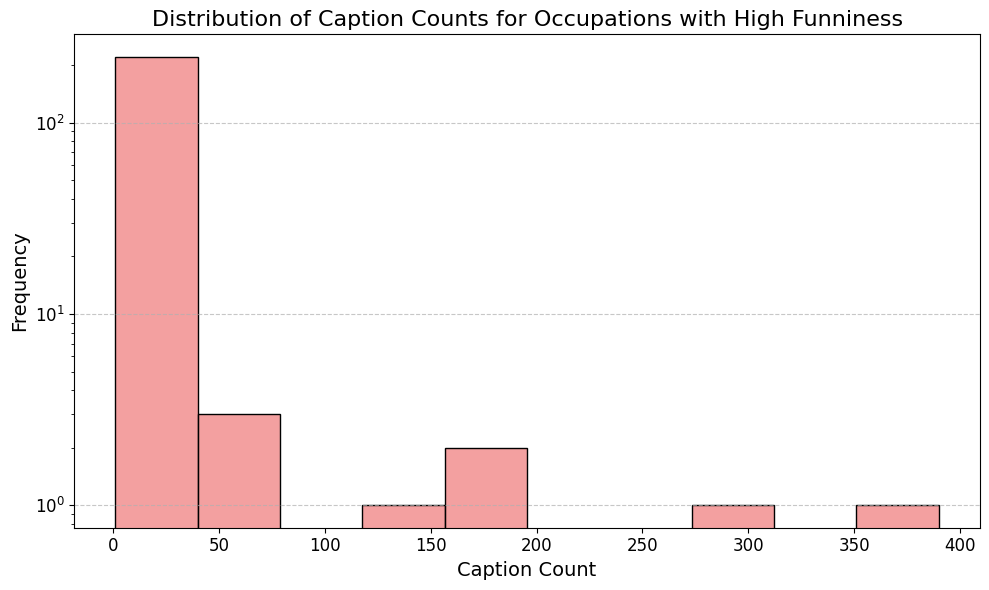

In [19]:
#support: print the occupations above threshold and how many times they occur
above_threshold = occupation_analysis_df[occupation_analysis_df['Avg_Funny_Centered'] >= threshold]
print("Occupations with Average Centered Funniness above", threshold)
for _, row in above_threshold.iterrows():
    print(f"{row['Occupation_Term']}: {row['Caption_Count']} occurrences")

# plot their histogram of occurences
above_threshold = occupation_analysis_df[occupation_analysis_df['Avg_Funny_Centered'] >= threshold]
plt.figure(figsize=(10, 6))
sns.histplot(
    data=above_threshold,
    x="Caption_Count",
    bins=10,
    color='lightcoral',
)
plt.title("Distribution of Caption Counts for Occupations with High Funniness", fontsize=16)
plt.yscale('log')
plt.xlabel("Caption Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

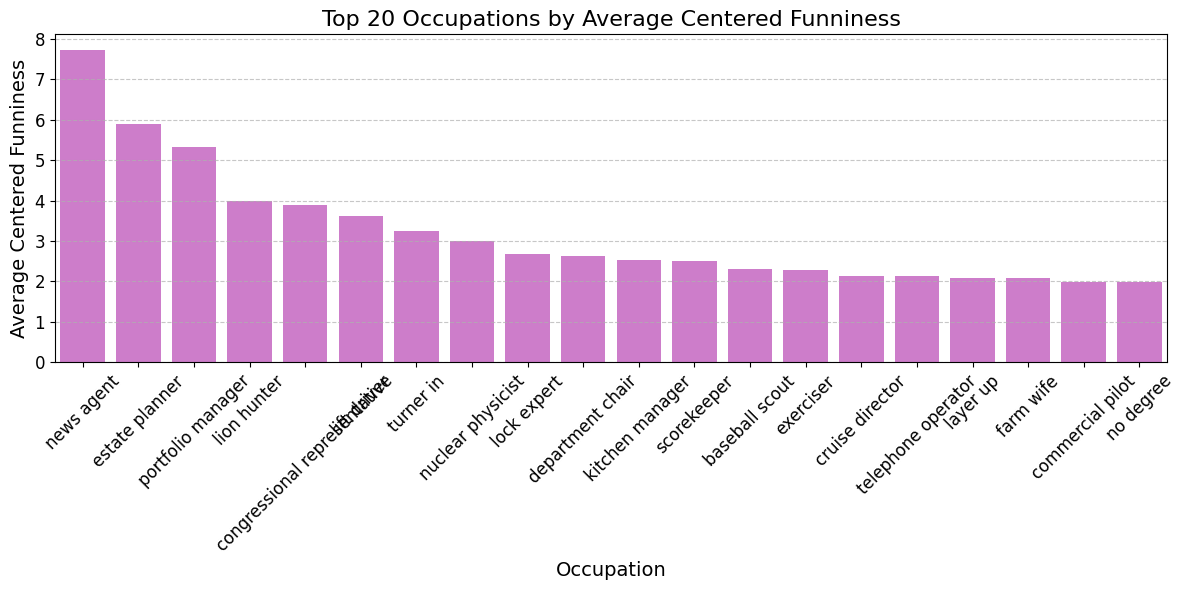

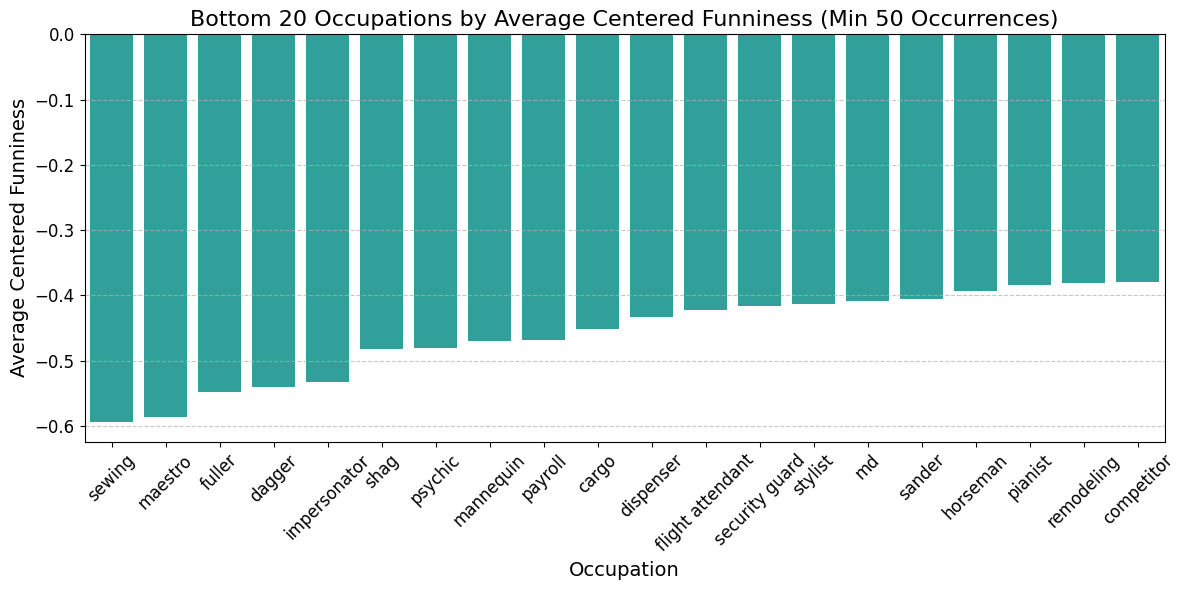

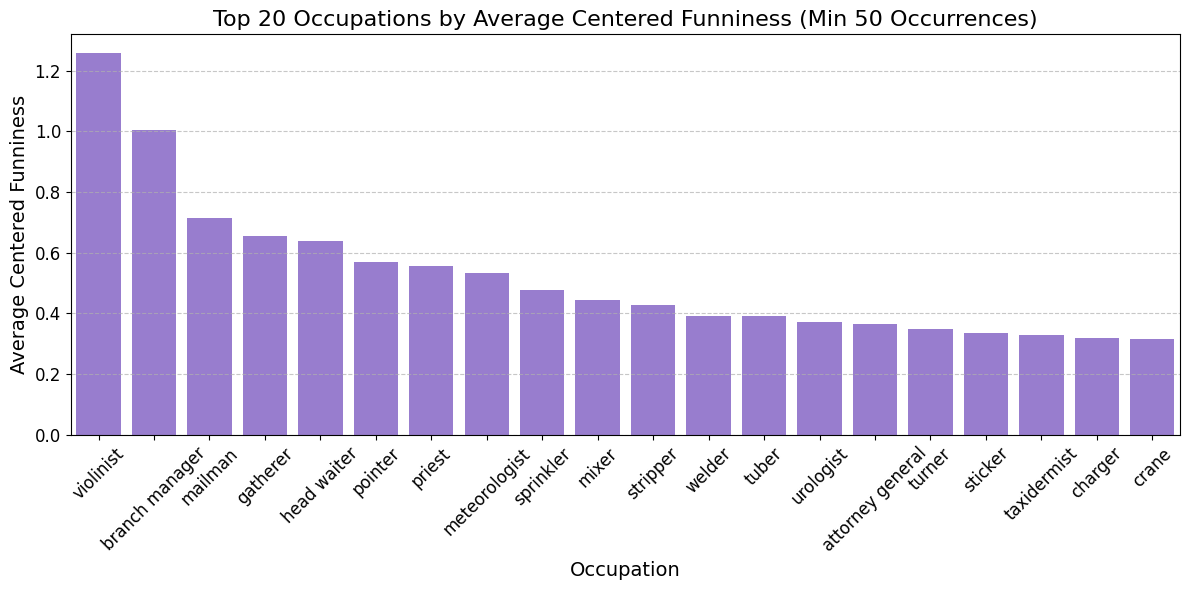

In [20]:
# Graph 2: Top 20 occupations by funniness, no threshold on occurence... may be misleading
plt.figure(figsize=(12, 6))
sns.barplot(
    data=occupation_analysis_df.sort_values(by="Avg_Funny_Centered", ascending=False).head(20),
    x="Occupation_Term",
    y="Avg_Funny_Centered",
    color='orchid'
)
plt.title("Top 20 Occupations by Average Centered Funniness", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Average Centered Funniness", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Support: bootm 20 occupations by funniness, with at least threshold_occ occurrences
threshold_occ = 50
plt.figure(figsize=(12, 6))
sns.barplot(
    data=occupation_analysis_df[occupation_analysis_df['Caption_Count'] >= threshold_occ].sort_values(by="Avg_Funny_Centered").head(20),
    x="Occupation_Term",
    y="Avg_Funny_Centered",
    color='lightseagreen'
)
plt.title(f"Bottom 20 Occupations by Average Centered Funniness (Min {threshold_occ} Occurrences)", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Average Centered Funniness", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Support: top 20 occupations by funniness, with at least threshold_occ occurrences
threshold_occ = 50
plt.figure(figsize=(12, 6))
sns.barplot(
    data=occupation_analysis_df[occupation_analysis_df['Caption_Count'] >= threshold_occ].sort_values(by="Avg_Funny_Centered", ascending=False).head(20),
    x="Occupation_Term",
    y="Avg_Funny_Centered",
    color='mediumpurple'
)
plt.title(f"Top 20 Occupations by Average Centered Funniness (Min {threshold_occ} Occurrences)", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Average Centered Funniness", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

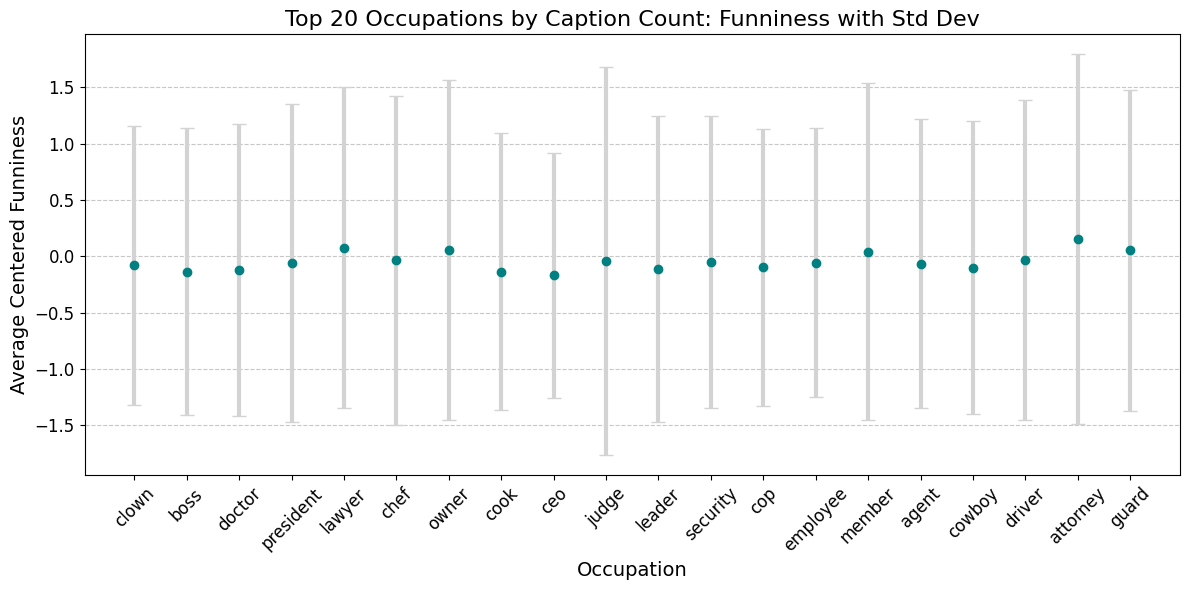

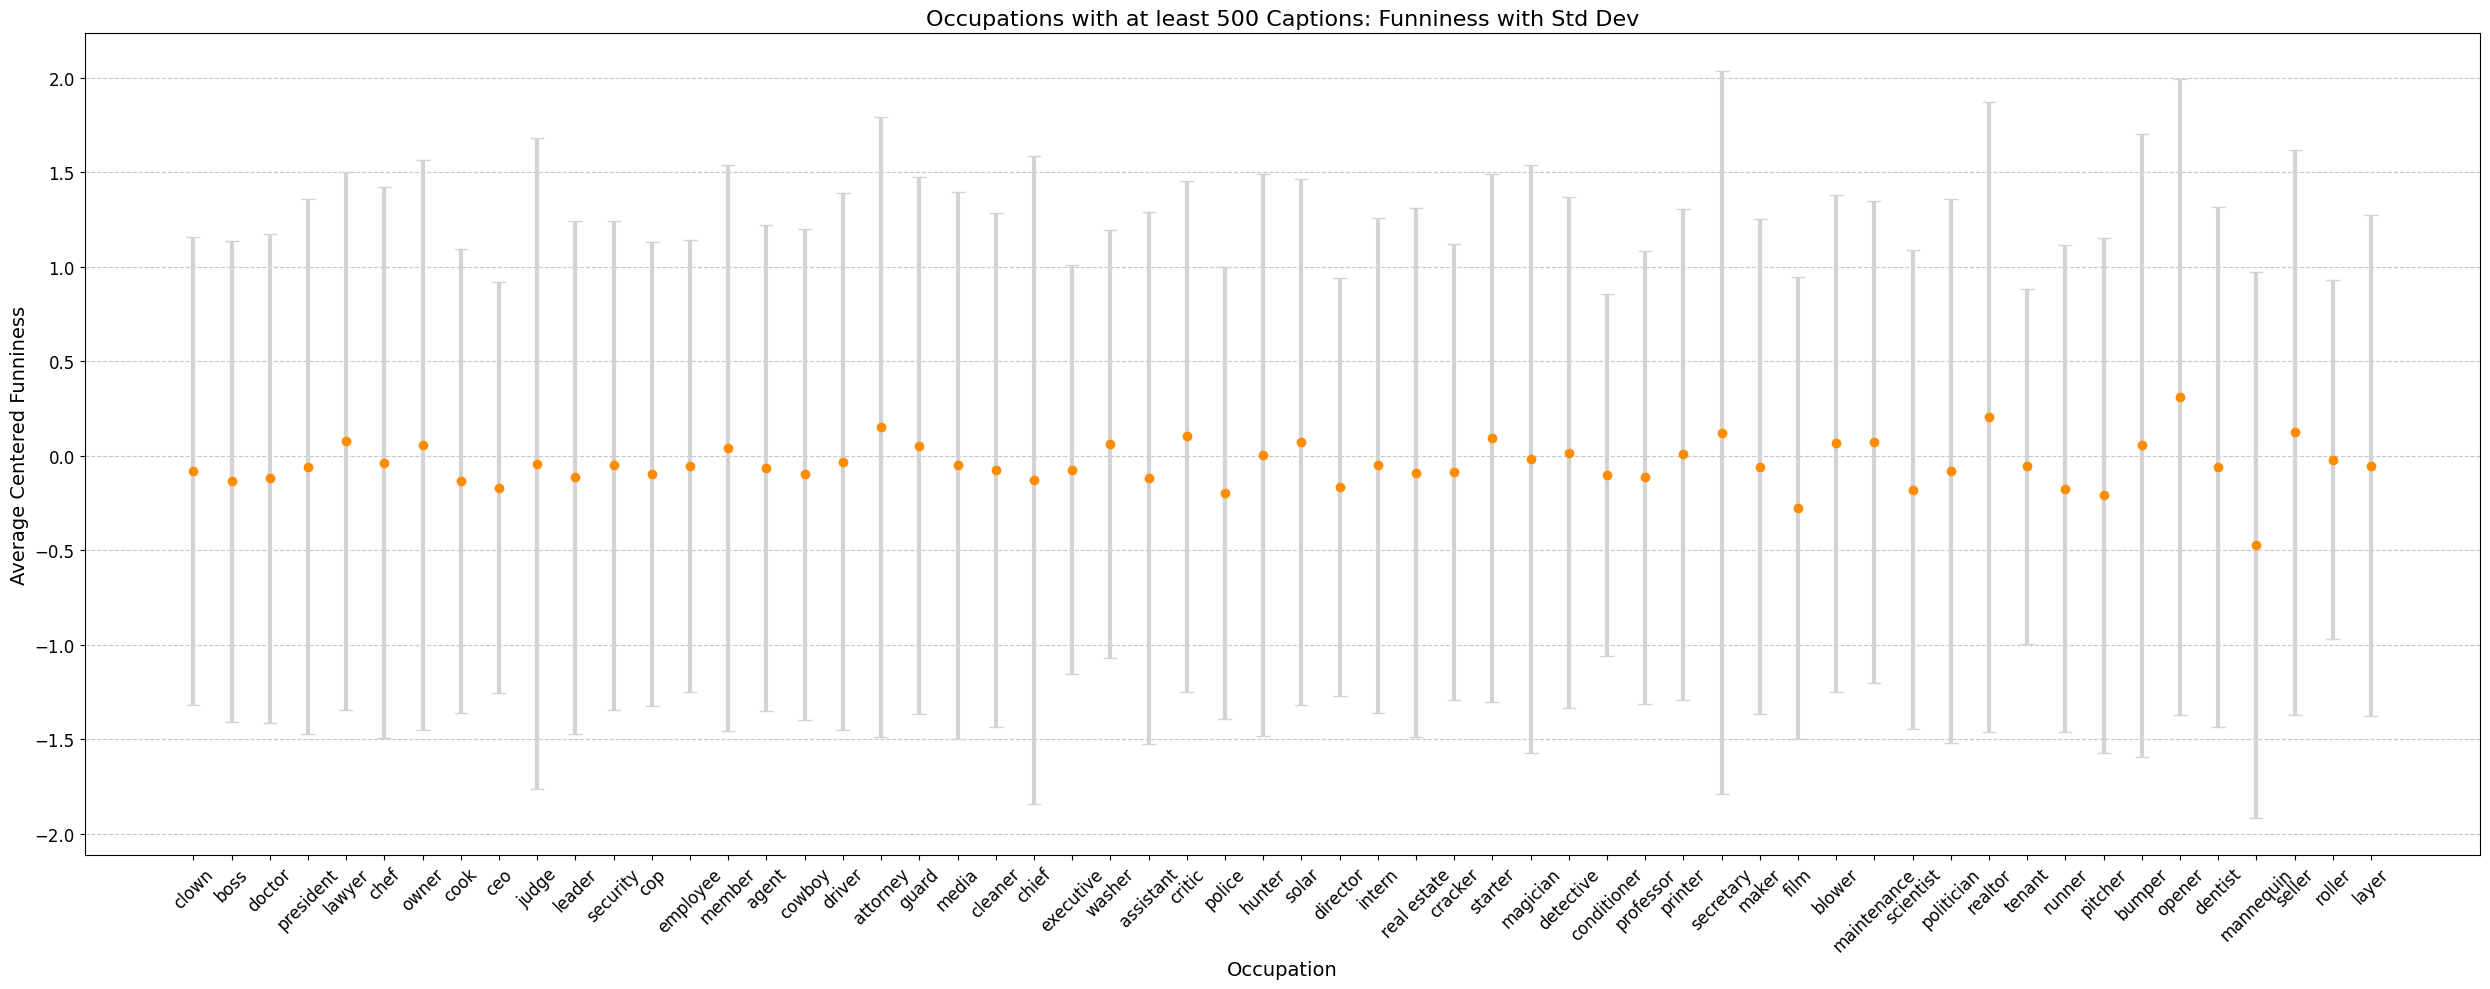

In [21]:
# Graph 3: Error bar plot: mean +/- std dev of funniness for top 20 occupations by caption count
plt.figure(figsize=(12, 6))
top_20_occ = occupation_analysis_df.head(20)
plt.errorbar(
    x=top_20_occ["Occupation_Term"],
    y=top_20_occ["Avg_Funny_Centered"],
    yerr=top_20_occ["Std_Funny_Centered"],
    fmt='o',
    ecolor='lightgray',
    elinewidth=3,
    capsize=5,
    color='teal'
)
plt.title("Top 20 Occupations by Caption Count: Funniness with Std Dev", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Average Centered Funniness", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Support: maybe other error bar plots with different thresholds on occurences
# Graph 4: Error bar plot: mean +/- std dev of funniness for occupations with at least 100 occurrences
threshold_occ = 500
plt.figure(figsize=(25, 10))
filtered_occ = occupation_analysis_df[occupation_analysis_df['Caption_Count'] >= threshold_occ]
plt.errorbar(
    x=filtered_occ["Occupation_Term"],
    y=filtered_occ["Avg_Funny_Centered"],
    yerr=filtered_occ["Std_Funny_Centered"],
    fmt='o',
    ecolor='lightgray',
    elinewidth=3,
    capsize=5,
    color='darkorange'
)
plt.title(f"Occupations with at least {threshold_occ} Captions: Funniness with Std Dev", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Average Centered Funniness", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


---
# <center> Part 3: occupations and their categories.

here we need to list the groups to different fields. To do this, we give the list of around 3000 occupations that were found to ChatGPT to form them into groups. This eliminates the need to manually go through all the occupations and their potential fields. This will allow us to examine if there is a categorical reason behind  certain words.

The identified fields are:
 - Arts & Entertainment
 - Business, Management & Finance
 - Law, Government & Politics
 - Healthcare & Medicine
 - Education & Academia
 - Science & Engineering
 - Trade, Craft & Manufacturing
 - Service Industry & Hospitality
 - Transportation & Logistics
 - Agriculture, Animals & Outdoors
 - Public Safety, Military, Security
 - Sports & Fitness
 - Media, Writing & Communication
 - Domestic & Personal Care
 - Miscellaneous / Unclear / Humorous Jobs

I will produce graphs:
1. Box plot of occupation centered scores of each field.
2. bar chart: mean humour by category to see if some professions are more funny than others.

In [22]:
occupation_categories = {
    "Arts & Entertainment": [
        "clown","magician","artist","pianist","film","performer","art critic","actor","comedian","model",
        "singer","dancer","musician","musical conductor","circus performer","writer","poet","cartoonist",
        "illustrator","dj","screenwriter","playwright","story writer","story reader","fiction writer",
        "concert pianist","trumpeter","soloist","harpist","band leader","vocalist","photographer",
        "camera operator","cinematographer","news anchor","radio announcer","radio commentator","showman",
        "ventriloquist","stagehand","stage manager","puppeteer","master chef","fashion model",
        "fashion stylist","fashion designer","fashion director","fashion coordinator","dresser",
        "costume designer","opera singer","art model","artists model","art director","artistic director",
        "conceptual artist","music teacher","piano player","piano mover","animator","yoga instructor"
    ],
    "Business, Management & Finance": [
        "boss","ceo","owner","executive","chief","manager","assistant","administrator","supervisor",
        "branch manager","department head","project manager","operations manager","investment banker",
        "banker","financier","financial advisor","financial analyst","financial planner","accountant",
        "tax accountant","auditor","internal auditor","consultant","business consultant",
        "marketing consultant","marketing director","sales manager","sales associate","sales representative",
        "sales assistant","store manager","business manager","business analyst","entrepreneur","broker",
        "insurance agent","insurance broker","insurance underwriter","cpa","account executive","asset manager",
        "portfolio manager","investment advisor","vendor","purchaser","buyer","seller"
    ],
    "Law, Government & Politics": [
        "lawyer","attorney","attorney general","judge","justice","prosecutor","public defender",
        "district attorney","trial lawyer","patent attorney","corporate lawyer","criminal lawyer",
        "probate lawyer","legal counsel","legal advisor","legal aide","paralegal","litigator",
        "litigation attorney","politician","senator","us senator","congressman","congressperson",
        "state representative","representative","president","vice president","governor","mayor",
        "commissioner","ambassador","diplomat","legislator","councilman","official","city official",
        "precinct captain","police commissioner"
    ],
    "Healthcare & Medicine": [
        "doctor","dentist","surgeon","chiropractor","physician","physician assistant","cardiologist",
        "pediatrician","nurse","rn","nurse practitioner","medical doctor","medical officer",
        "medical resident","medical writer","medical illustrator","medical consultant",
        "medical technologist","orthodontist","ophthalmologist","optometrist","optician","psychiatrist",
        "psychologist","clinical","mental health","therapist","massage therapist","physical therapist",
        "occupational therapy","emt","paramedic","dietitian","nutritionist","radiologist","virologist",
        "epidemiologist","urologist","proctologist","pathologist","hematologist","dermatologist",
        "anesthesiologist","neurosurgeon","oncologist","veterinarian","podiatrist","speech therapist",
        "speech pathologist"
    ],
    "Education & Academia": [
        "professor","teacher","kindergarten teacher","music teacher","math teacher","school nurse",
        "school counselor","school principal","assistant principal","educator","lecturer","tutor",
        "academic researcher","research scientist","scientist","student nurse","research analyst","mentor",
        "instructor","piano professor"
    ],
    "Science & Engineering": [
        "scientist","biologist","chemist","physicist","astronaut","engineer","software engineer",
        "civil engineer","mechanical engineer","electrical engineer","aerospace engineer",
        "environmental scientist","epidemiologist","geologist","hydrologist","astronomer","astrophysicist",
        "anthropologist","archaeologist","ichthyologist","ornithologist","zoologist","herpetologist",
        "entomologist","economist","statistician","data scientist","data analyst","programmer",
        "network engineer","cloud engineer","cybersecurity","technician","technologist"
    ],
    "Trades, Craft & Manufacturing": [
        "carpenter","mason","plumber","electrician","welder","mechanic","machinist","builder","contractor",
        "construction worker","ironworker","stonemason","bricklayer","roofer","house painter","glass cutter",
        "glass blower","blacksmith","farrier","tool maker","metalworker","engraver","seamstres","tailor",
        "dressmaker","cobbler","upholsterer","woodworker","boat builder","ship carpenter","steamfitter",
        "pipe fitter","painter","sculptor"
    ],
    "Service Industry & Hospitality": [
        "chef","cook","sous chef","barista","bartender","waiter","waitress","server","valet",
        "hotel concierge","housekeeper","maid","janitor","laundry","baker","pastry chef","line cook",
        "butler","doorman","caterer","bar manager","food handler","food processor","delivery driver",
        "tour guide","travel agent","host","hostess","customer service","hairdresser","stylist","manicurist"
    ],
    "Transportation & Logistics": [
        "driver","uber driver","taxi driver","delivery driver","truck driver","bus driver","pilot","co pilot",
        "airline pilot","ship captain","sailor","fisherman","train driver","train conductor",
        "forklift operator","baggage handler","loader","mover","courier","dispatcher","navigator","porter",
        "mail carrier","mailman","postal worker"
    ],
    "Agriculture, Animals & Outdoors": [
        "farmer","rancher","gardener","shepherd","beekeeper","fisher","fisherman","hunter","cowboy",
        "lumberjack","park ranger","forester","tree surgeon","tree trimmer","zookeeper","animal trainer",
        "dog walker","dog trainer","agricultural worker","crop duster","game warden"
    ],
    "Public Safety, Military & Security": [
        "cop","police officer","security guard","guard","prison guard","firefighter","fire chief","marshal",
        "constable","deputy","soldier","military","lifeguard","paramedic","border patrol","parole officer",
        "detective","homicide detective","inspector","first responder","sheriff","policewoman",
        "transit police","state trooper"
    ],
    "Sports & Fitness": [
        "athlete","football player","baseball player","basketball player","skier","swimmer","diver","golfer",
        "tennis player","yoga teacher","fitness instructor","trainer","personal trainer","coach",
        "boxing coach","boxing instructor","umpire","referee","jockey","skateboarder","runner","pitcher",
        "catcher","drummer"
    ],
    "Media, Writing & Communication": [
        "journalist","reporter","columnist","news writer","editor","copyeditor","fact checker","publicist",
        "press secretary","communication officer","commentator","blogger","vlogger","publisher","copywriter",
        "speech writer","screen writer","court stenographer","captioner"
    ],
    "Domestic & Personal Care": [
        "babysitter","nanny","caregiver","housekeeper","house sitter","homemaker","child care","home health aide",
        "personal shopper","personal assistant","personal stylist","life coach","doula"
    ],
    "Miscellaneous / Unclear / Humorous Jobs": []
}

# append Miscellaneous / Unclear / Humorous Jobs with remaining occupations
all_categorized = set()
for cat, occs in occupation_categories.items():
    all_categorized.update(occs) # add all occupations already categorized
for occ in occupation_analysis_df['Occupation_Term']:
    if occ not in all_categorized:
        occupation_categories["Miscellaneous / Unclear / Humorous Jobs"].append(occ) # add uncategorized occupations here

# Map each occupation to its category
occupation_to_category = {}
for category, occupations in occupation_categories.items():
    for occupation in occupations:
        occupation_to_category[occupation] = category
# Add category column to occupation_analysis_df
occupation_analysis_df['Category'] = occupation_analysis_df['Occupation_Term'].map(occupation_to_category)

# Save the categorized occupation analysis
occupation_analysis_df.to_csv("occupation_analysis.csv", index=False)

In [23]:
#load the categorized occupation analysis
occupation_analysis_df = pd.read_csv("occupation_analysis.csv")
print("Categorized occupation analysis data loaded successfully.")

import ast

# Only needed if Temporal_Counts came from CSV and is string-typed
if occupation_analysis_df["Temporal_Counts"].dtype == object:
    occupation_analysis_df["Temporal_Counts"] = occupation_analysis_df["Temporal_Counts"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )

Categorized occupation analysis data loaded successfully.


In [24]:
#Before categorising, we had:
print(f"Total unique occupations before categorization: {len(occupation_analysis_df)}")
#After categorising, we have:
sum = 0
for category in occupation_categories.keys():
    count = occupation_analysis_df[occupation_analysis_df['Category'] == category].shape[0]
    print(f"{category}: {count} occupations")
    sum += count
print(f"Total occupations after categorization: {sum}")

Total unique occupations before categorization: 2455
Arts & Entertainment: 60 occupations
Business, Management & Finance: 47 occupations
Law, Government & Politics: 39 occupations
Healthcare & Medicine: 46 occupations
Education & Academia: 18 occupations
Science & Engineering: 34 occupations
Trades, Craft & Manufacturing: 28 occupations
Service Industry & Hospitality: 29 occupations
Transportation & Logistics: 21 occupations
Agriculture, Animals & Outdoors: 21 occupations
Public Safety, Military & Security: 22 occupations
Sports & Fitness: 24 occupations
Media, Writing & Communication: 17 occupations
Domestic & Personal Care: 12 occupations
Miscellaneous / Unclear / Humorous Jobs: 2037 occupations
Total occupations after categorization: 2455


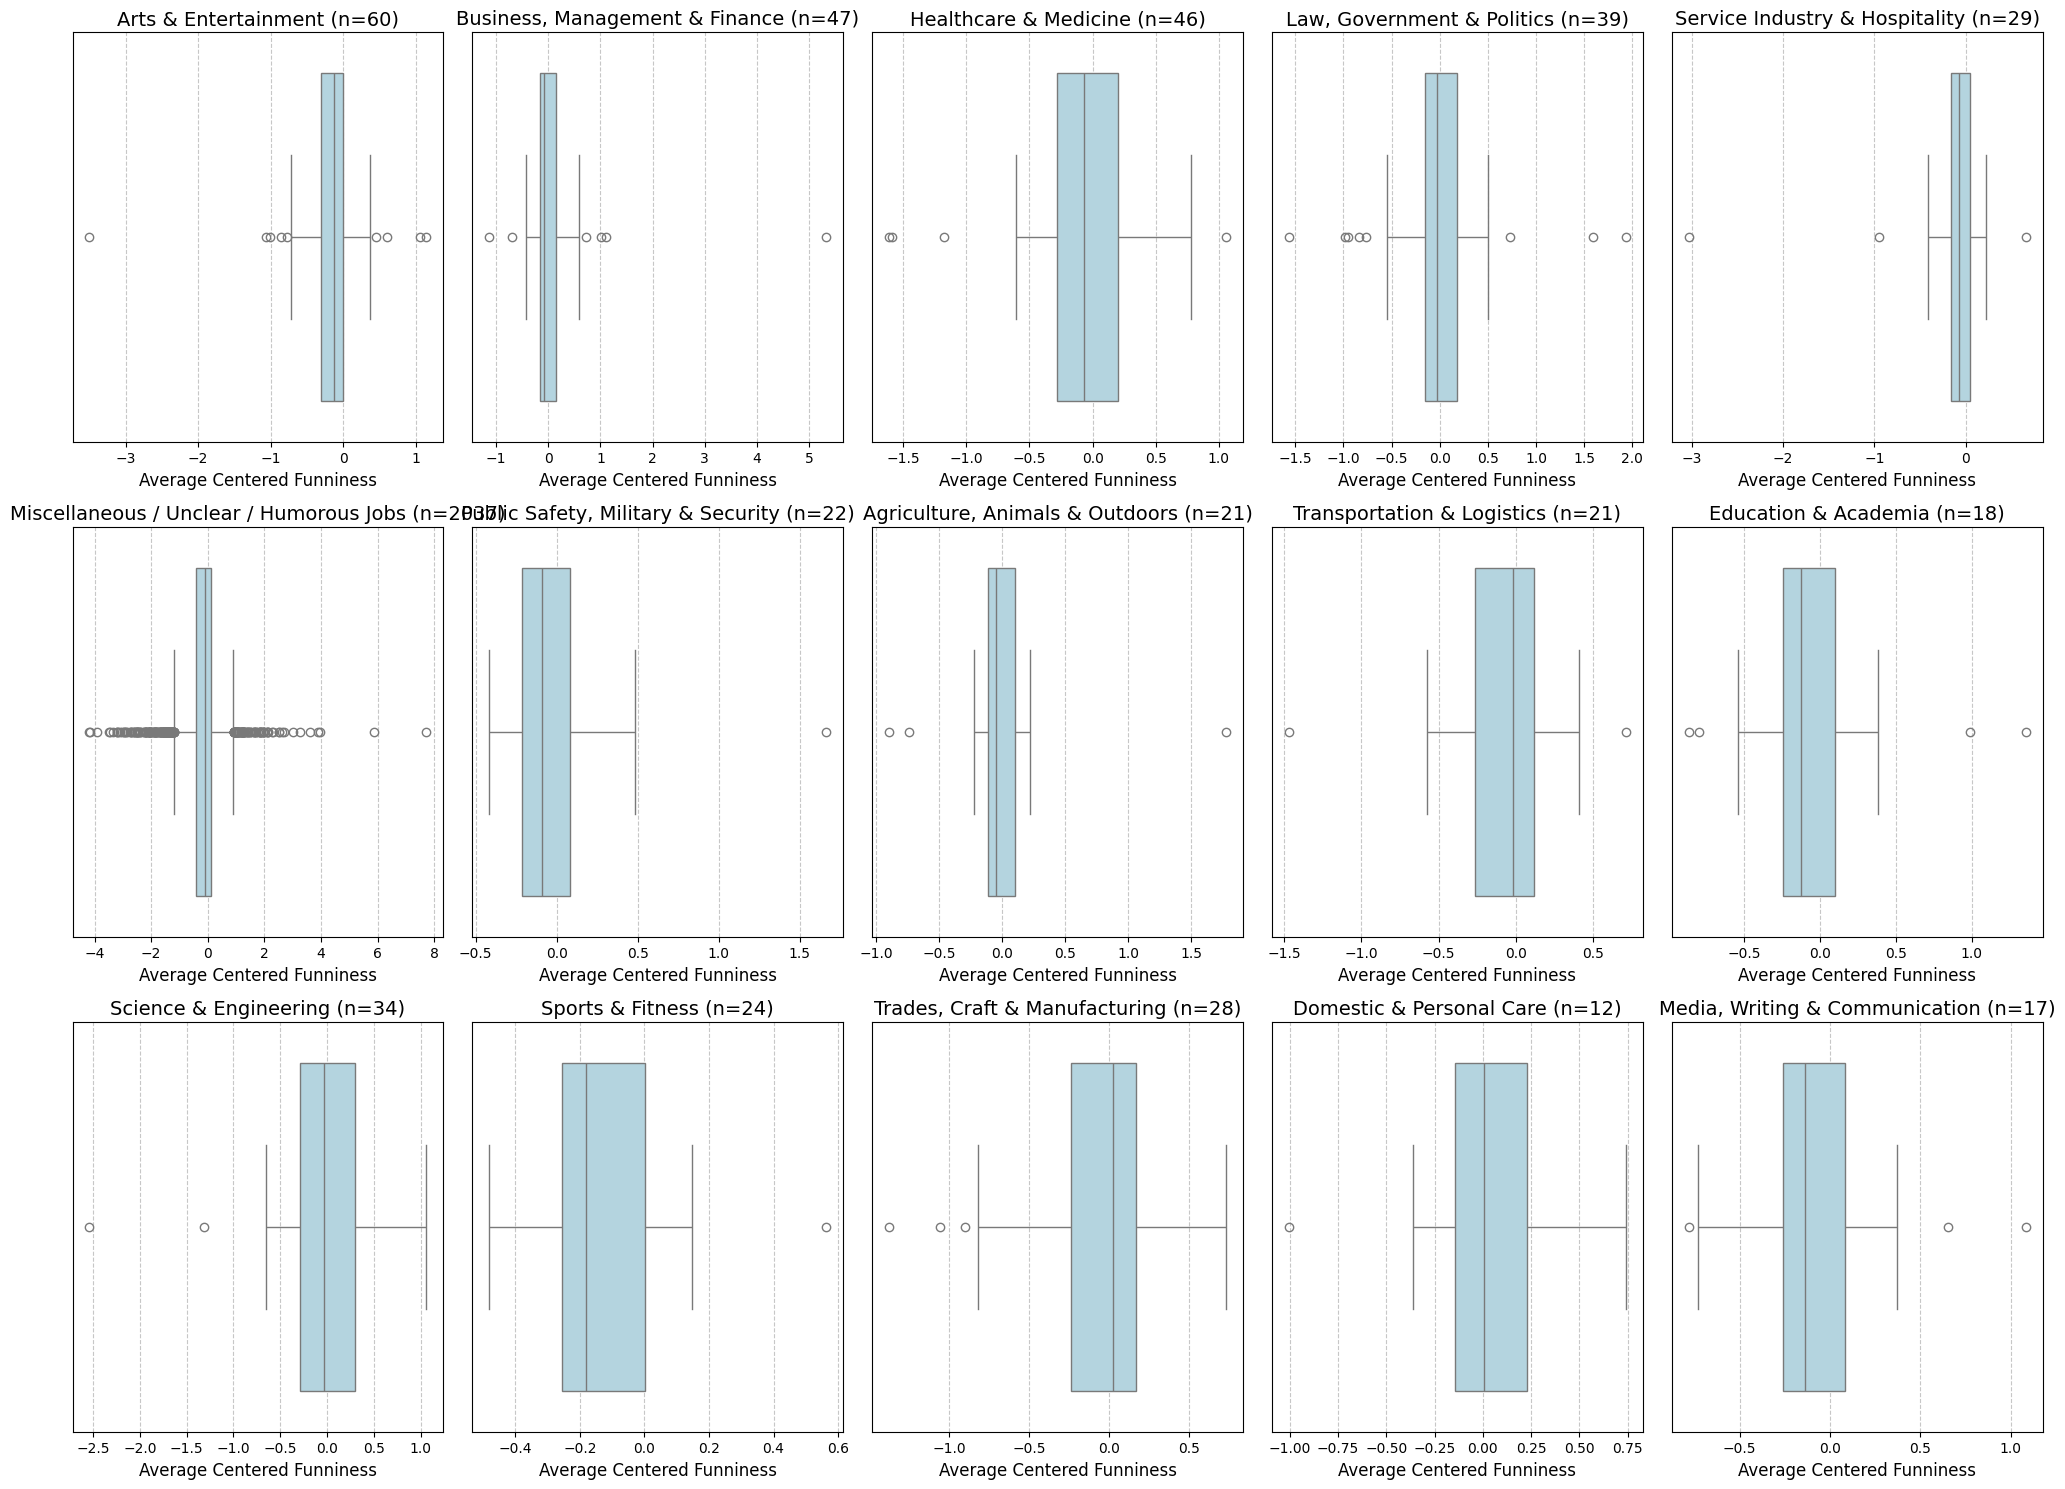

In [25]:
# Graph 1: boxplot of occupation centered scores by field
fig, ax = plt.subplots(nrows = 3, ncols=5, figsize=(20, 15))
categories = occupation_analysis_df['Category'].unique()
for i, category in enumerate(categories):
    row = i // 5
    col = i % 5
    subset = occupation_analysis_df[occupation_analysis_df['Category'] == category]
    sns.boxplot(
        data=subset,
        x='Avg_Funny_Centered',
        ax=ax[row, col],
        color='lightblue'
    )
    ax[row, col].set_title(f"{category} (n={len(subset)})", fontsize=14)
    ax[row, col].set_xlabel("Average Centered Funniness", fontsize=12)
    ax[row, col].set_yticks([])  # Hide y-axis ticks for clarity
    ax[row, col].grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



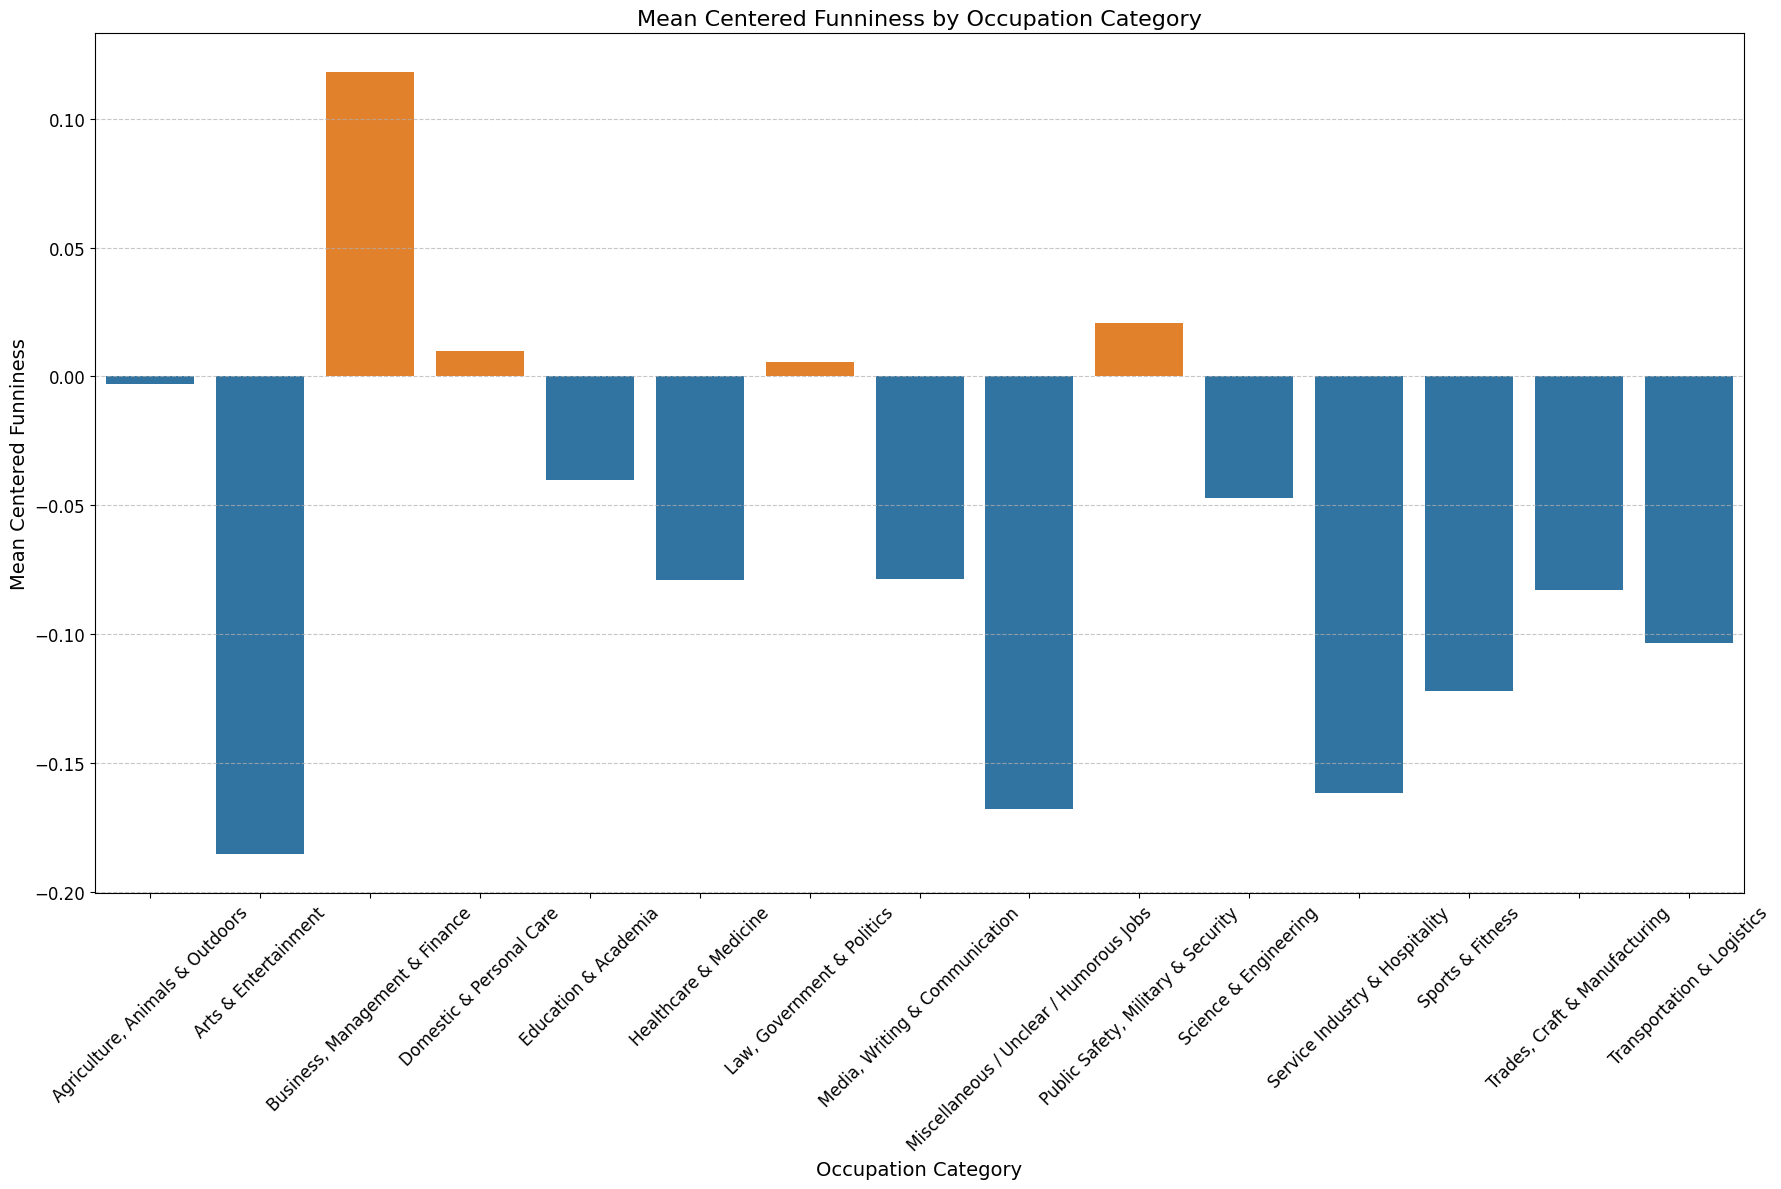

The only occupation categories with positive mean centered funniness are:
Business, Management & Finance: 0.1180
Domestic & Personal Care: 0.0099
Law, Government & Politics: 0.0057
Public Safety, Military & Security: 0.0208


In [26]:
# Graph 2: Bar chart of mean centered funniness by field 
mean_funniness_by_category = occupation_analysis_df.groupby('Category')['Avg_Funny_Centered'].mean().reset_index()

colours = ['navy' if occupation_analysis_df[occupation_analysis_df['Category'] == category]['Avg_Funny_Centered'].mean() >= 0 else 'lightcoral' for category in mean_funniness_by_category['Category']]
plt.figure(figsize=(18, 12))
sns.barplot(
    data=mean_funniness_by_category,
    x='Category',
    y='Avg_Funny_Centered',
    hue=colours,
    legend=False
)
plt.title("Mean Centered Funniness by Occupation Category", fontsize=16)
plt.xlabel("Occupation Category", fontsize=14)
plt.ylabel("Mean Centered Funniness", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("The only occupation categories with positive mean centered funniness are:")
for i, row in mean_funniness_by_category.iterrows():
    if row['Avg_Funny_Centered'] >= 0:
        print(f"{row['Category']}: {row['Avg_Funny_Centered']:.4f}")


---
# <center> Part 4: Temporal trends

For temporal data, we do possess some dates but not all. We will simply assume that each contest came after another, and for temporal information, we can return later.

We will try and see if certain occupational humour spiked during certain times, or if elections had an influence on the occupational humour. We will return to politics at another time as well.

Important events to consider for this temporal segment:
 - 2016 Elections in the US
 - 2016 Harambe zoo? Idk
 - 2020 George Floyd
 - 2019 -> Covid
 - 2020 Elections in the US
 - 2024 Elections
 - Brexit
 - Rise of AI
 - Rise of Tik-Tok and social media
 - Inflation during covid
 - Rise in climate change debates and topics
 - Other political scandals (capitol attack, supreme court contreversies, impeachment and such) We will return to this, but there are some occupations that link to this. 
 - More in depth stuff

1. Temporal trend of categories
2. Temporal trend of selected vocabulary.

In [27]:
#Temporal analysis of each of these groups
occ_to_temporal = dict(zip(occupation_analysis_df['Occupation_Term'], occupation_analysis_df['Temporal_Counts']))
group_temporal_counts = {}

#### Election keywords

Different domains of work can be linked:
- Political jobs
- Law enforcment
- legal roles
- government roles
- military roles
- media roles
- economy roles
- immigration and border

In [28]:
political_roles = ["president", "vice president", "governor", "mayor","senator", "congressman", "congressperson","representative", "state representative","ambassador", "diplomat", "commissioner","legislator", "politician", "attorney general","secretary", "official", "city official","precinct captain"]

legal_roles = [
    "judge", "justice", "lawyer", "attorney", "district attorney",
    "trial lawyer", "corporate lawyer", "public defender",
    "prosecutor", "patent attorney", "criminal lawyer",
    "legal counsel", "legal advisor", "paralegal",
    "litigator", "litigation attorney", "court officer",
    "court stenographer", "juror"
]

security_roles = [
    "cop", "police officer", "policeman", "policewoman",
    "police chief", "police detective", "security",
    "security guard", "security officer", "prison guard",
    "marshal", "sheriff", "deputy", "state trooper",
    "border patrol", "parole officer", "fbi agent",
    "cia agent", "inspector", "investigator",
    "detective", "homicide detective", "transit police",
    "constable"
]

government_admin = [
    "advisor", "adviser", "administrator", "bureau chief",
    "civil servant", "public administrator", "city planner",
    "official greeter", "ombudsman", "commissioner"
]

military_roles = [
    "soldier", "officer", "sergeant", "lieutenant",
    "colonel", "commander", "general", "security consultant",
    "intelligence agent", "naval", "seaman", "able seaman",
    "marine", "fire captain", "fire chief"
]

media_roles = [
    "journalist", "reporter", "columnist", "news writer",
    "news anchor", "commentator", "press secretary",
    "publicist", "editor", "publisher", "analyst",
    "strategist", "fact checker", "lobbyist",
    "speech writer"
]

economic_roles = [
    "banker", "investment banker", "financial advisor",
    "financial analyst", "economist", "auditor",
    "treasurer", "accountant", "actuary"
]

immigration_roles = [
    "border patrol", "immigration officer", "customs officer",
    "inspector", "patrol agent"
]

#simplified core political occupations
core_political_occupations = [
    "president", "senator", "congressman", "mayor", "governor",
    "judge", "lawyer", "attorney",
    "cop", "police officer", "security", "guard",
    "journalist", "reporter",
    "agent", "investigator", "detective",
    "soldier", "officer",
    "lobbyist", "press secretary", "publicist"
]    

In [29]:
#Track the different groups and their count in the data as a fucntion of which id they come from
occupation_group_counts = {
    "Political Roles": political_roles,
    "Legal Roles": legal_roles,
    "Security Roles": security_roles,
    "Government Administration": government_admin,
    "Military Roles": military_roles,
    "Media Roles": media_roles,
    "Economic Roles": economic_roles,
    "Immigration Roles": immigration_roles
}


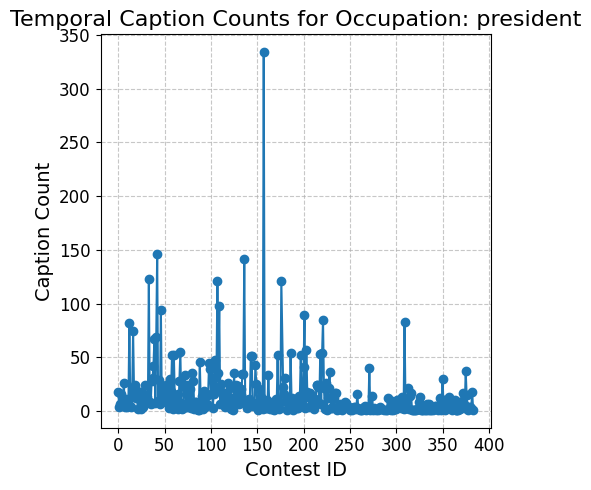

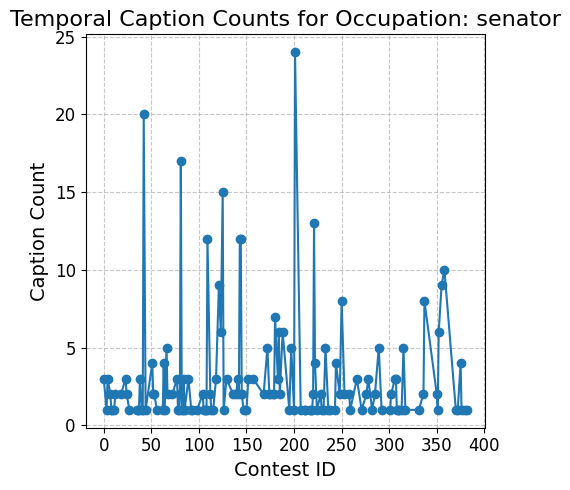

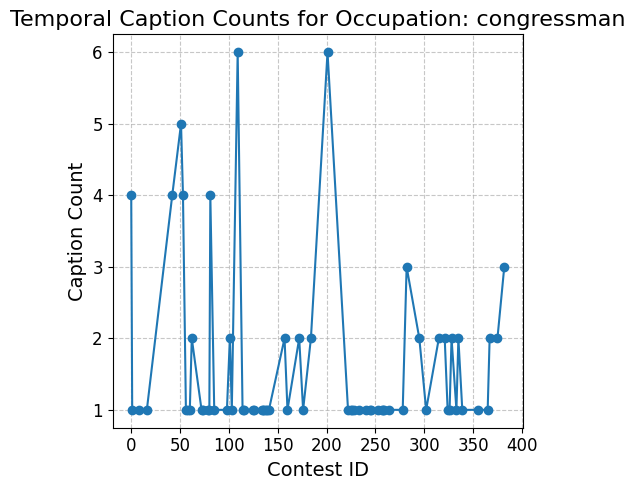

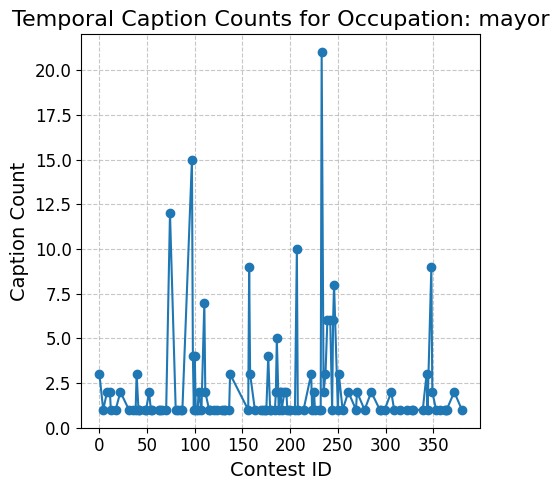

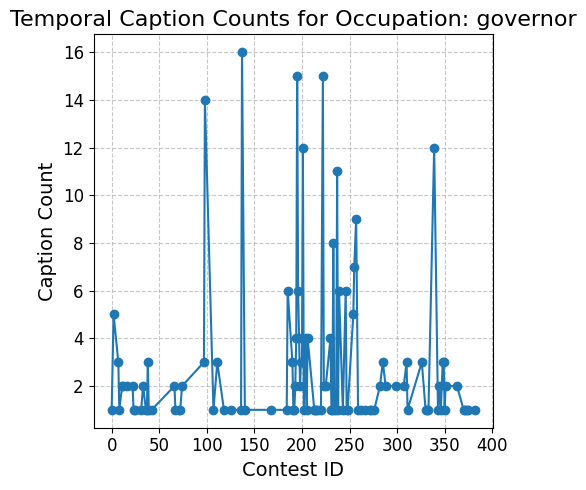

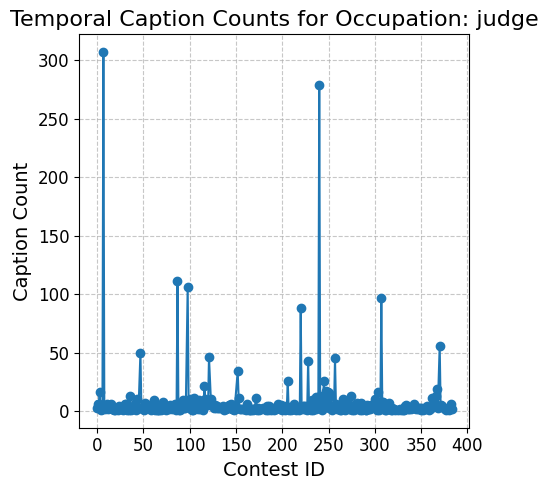

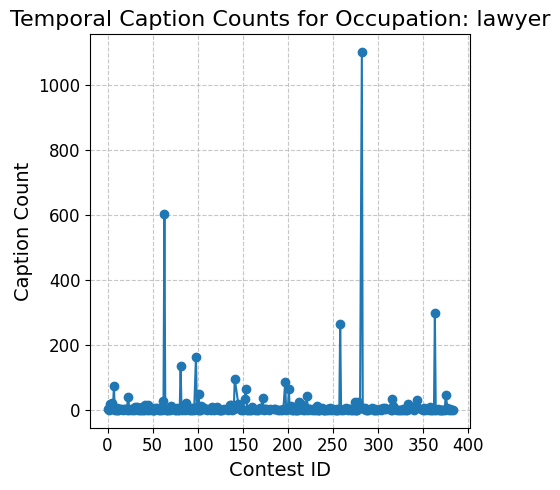

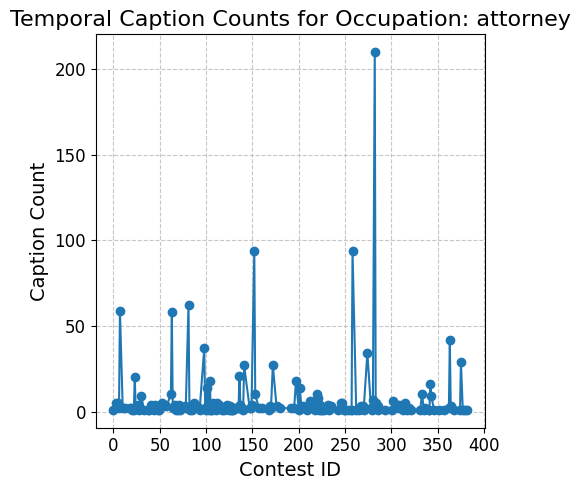

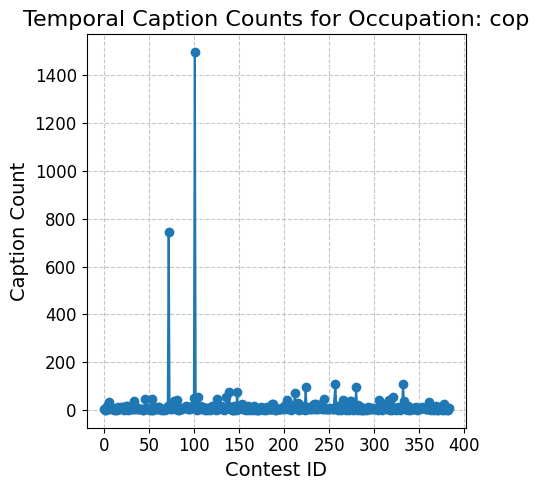

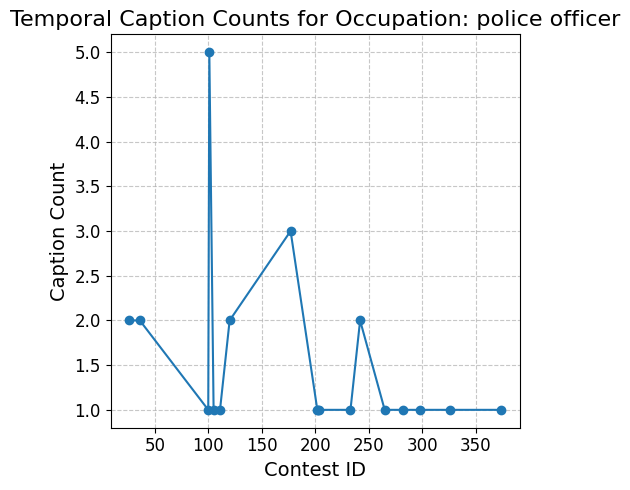

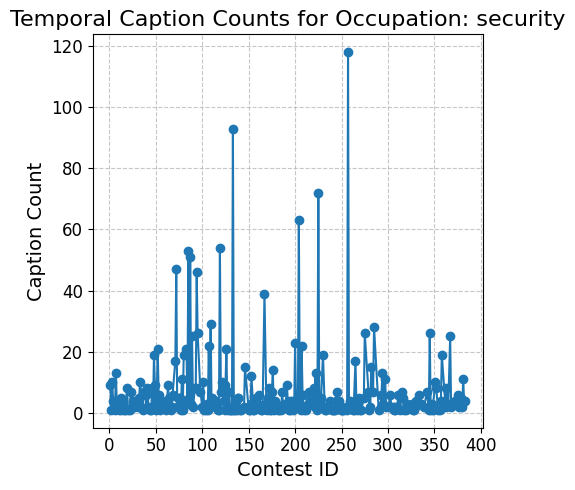

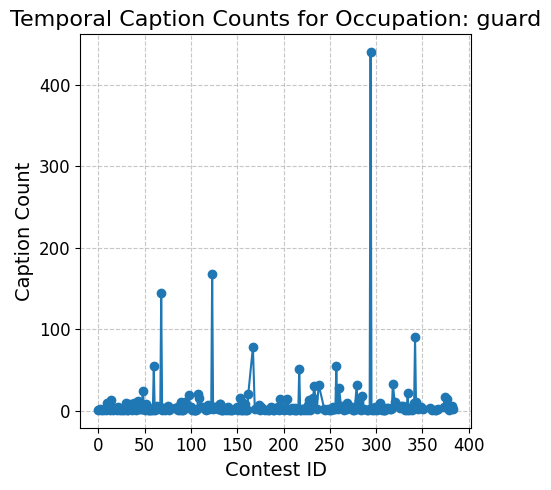

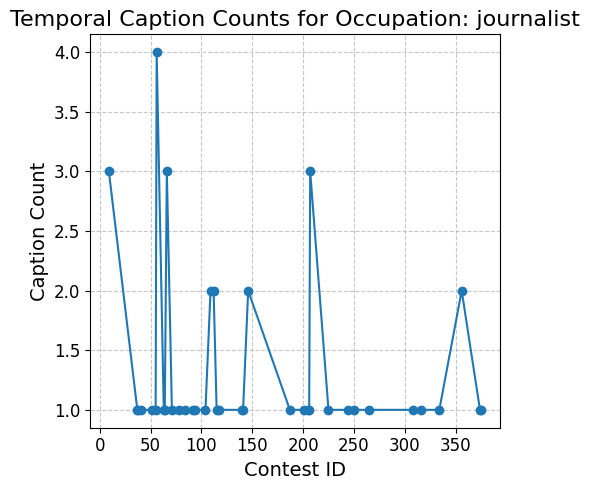

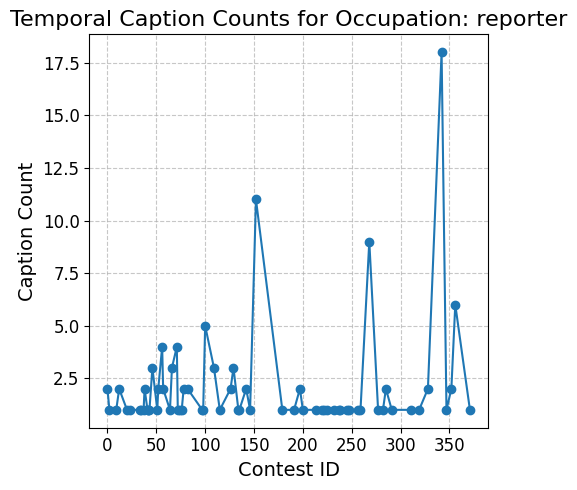

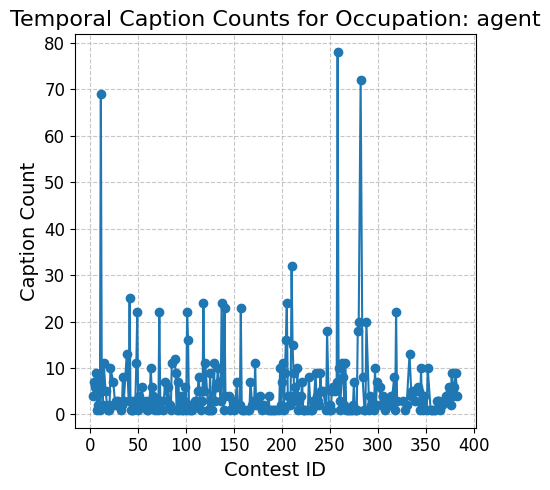

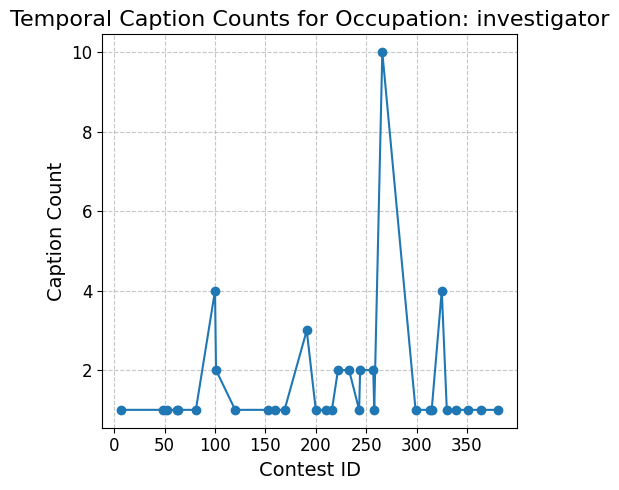

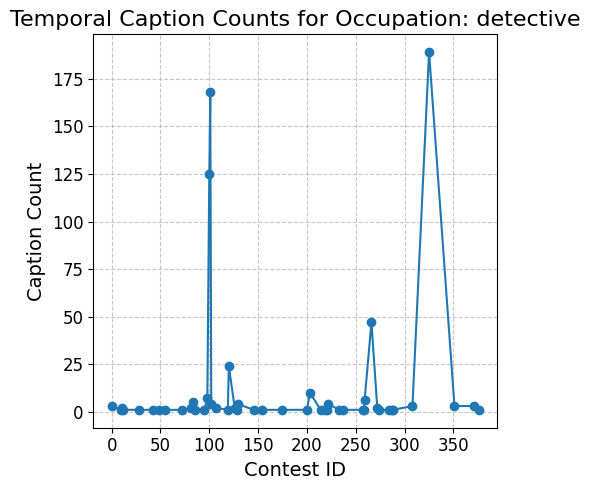

Occupation 'soldier' not found in the data.


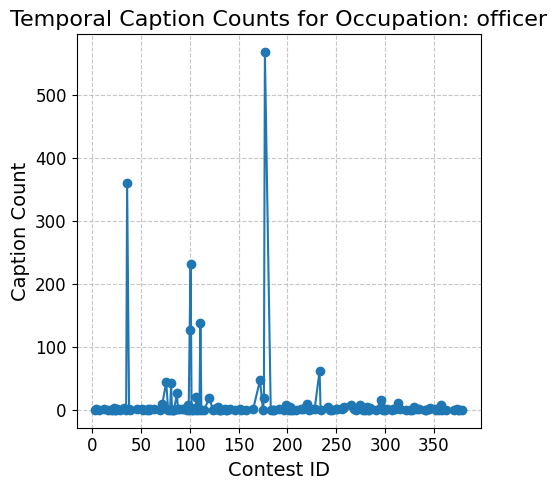

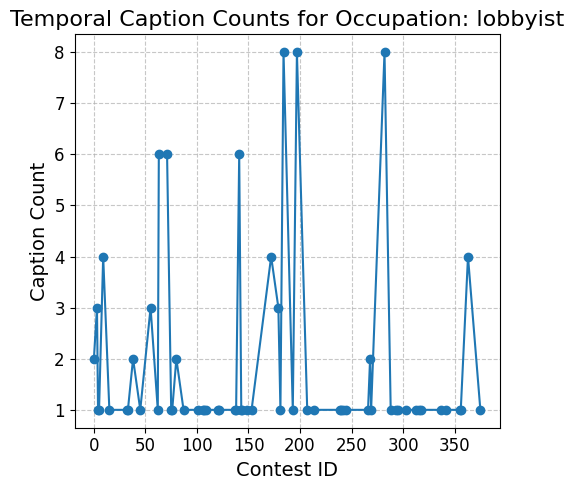

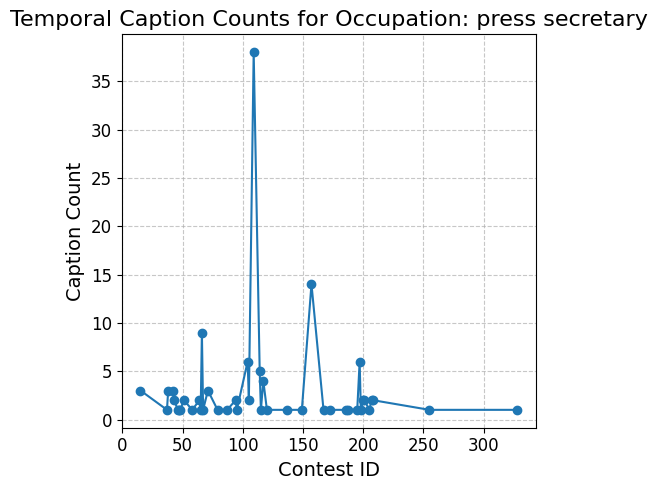

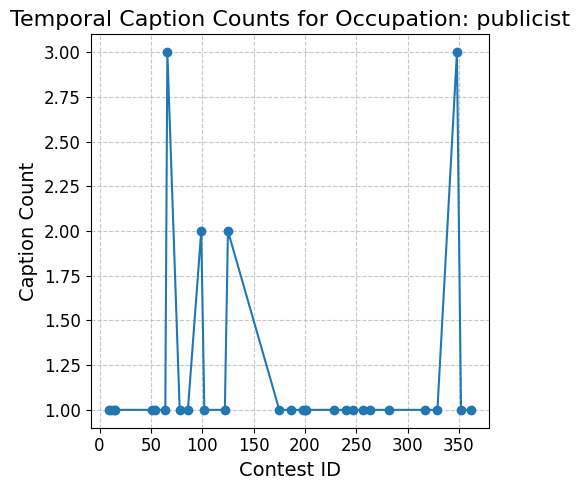

In [30]:
# choose core political occupations for analysis
group_to_track = core_political_occupations

for occ in group_to_track:
    if occ in occ_to_temporal:
        temporal_counts = occ_to_temporal[occ]
        # Sort by contest_id
        sorted_counts = dict(sorted(temporal_counts.items()))
        
        plt.figure(figsize=(5, 5))
        plt.plot(
            list(sorted_counts.keys()),
            list(sorted_counts.values()),
            marker='o',
            label=occ
        )
        plt.title(f"Temporal Caption Counts for Occupation: {occ}", fontsize=16)
        plt.xlabel("Contest ID", fontsize=14)
        plt.ylabel("Caption Count", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Occupation '{occ}' not found in the data.")


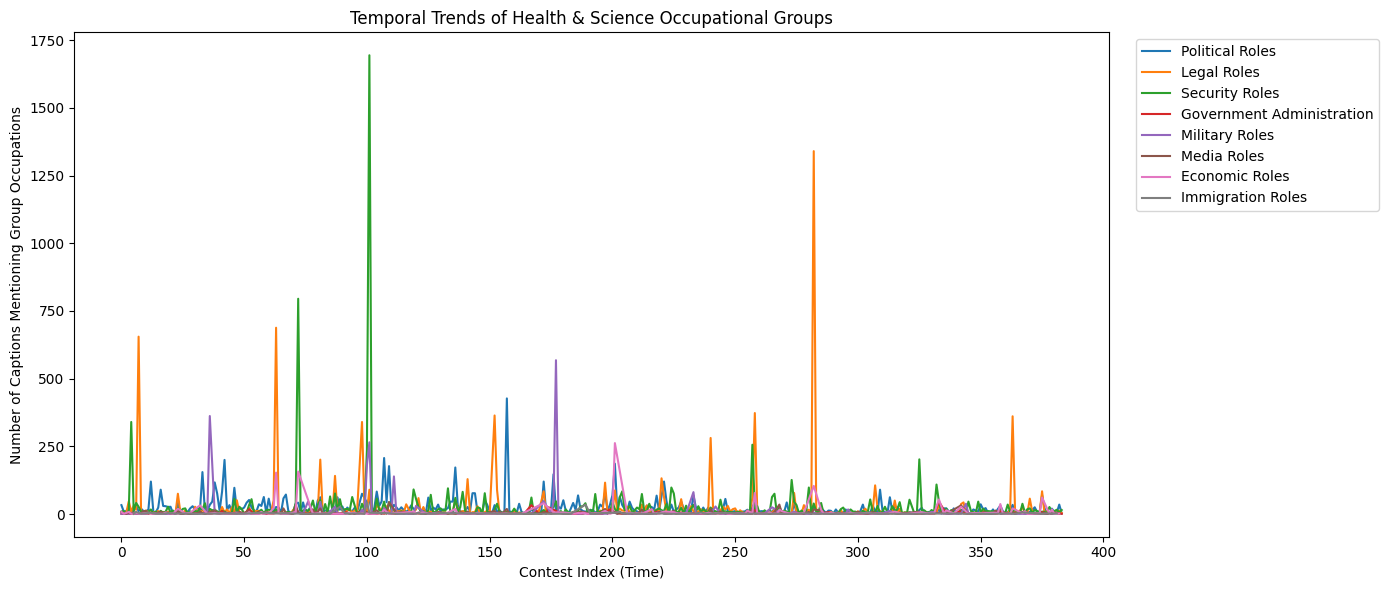

In [31]:
# check the temporal count of the groups identified above (groups not individual occupations)
for group_name, occupations in occupation_group_counts.items():
    counts_per_contest = defaultdict(int)
    for occ in occupations:
        if occ in occ_to_temporal:
            temporal_dict = occ_to_temporal[occ]

            #adding each contest count to the group 
            for contest_id, count in temporal_dict.items():
                counts_per_contest[contest_id] += count

    s = pd.Series(counts_per_contest).sort_index()

    group_temporal_counts[group_name] = s

plt.figure(figsize=(14, 6))


for group_name, series in group_temporal_counts.items():
    if series.sum() < 5:   # skip uninformative groups
        continue
    plt.plot(series.index, series.values, label=group_name)

plt.title("Temporal Trends of Health & Science Occupational Groups")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Number of Captions Mentioning Group Occupations")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

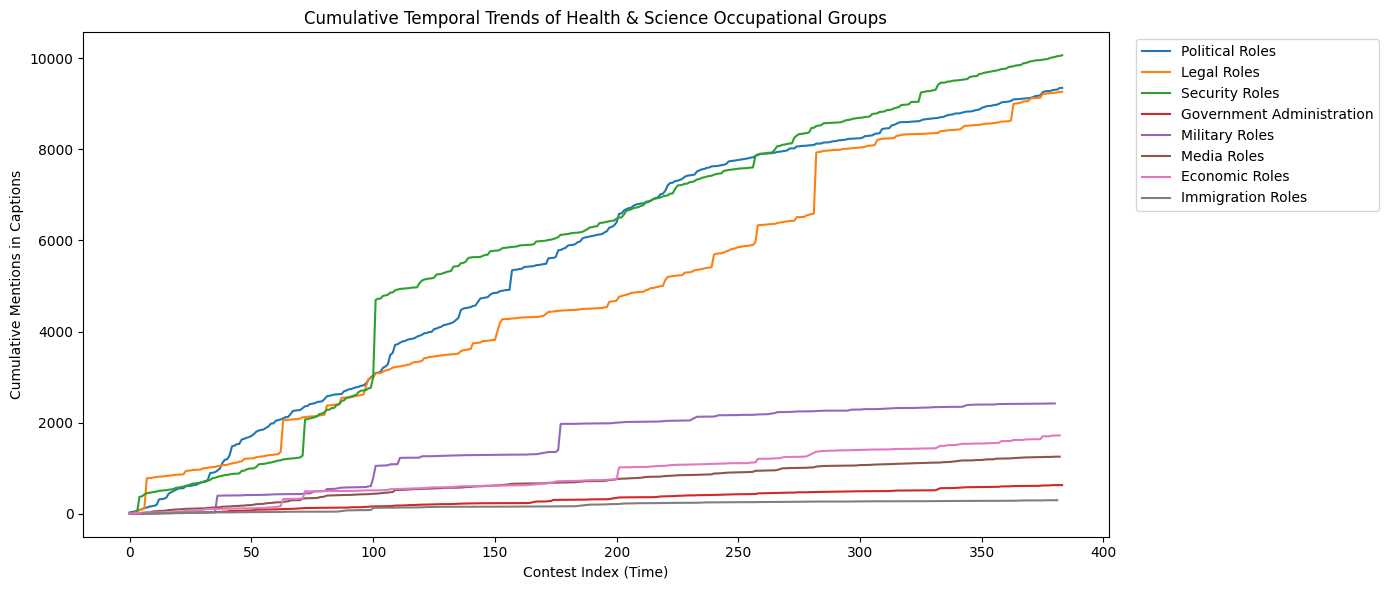

In [32]:
#Sum all occupations in the medical field to see overall trend
for group_name, occupations in occupation_group_counts.items():
    counts_per_contest = defaultdict(int)

    for occ in occupations:
        occ_lower = occ.lower()

        if occ_lower not in occ_to_temporal:
            continue

        temporal_dict = occ_to_temporal[occ_lower]

        for contest_id, count in temporal_dict.items():
            counts_per_contest[contest_id] += count

    # Convert into sorted series
    s = pd.Series(counts_per_contest).sort_index()
    group_temporal_counts[group_name] = s


plt.figure(figsize=(14, 6))

for group_name, series in group_temporal_counts.items():
    if series.sum() < 5:   # skip uninformative groups
        continue
    
    plt.plot(
        series.index, 
        series.cumsum().values,   # <-- cumulative sum
        label=group_name
    )

plt.title("Cumulative Temporal Trends of Health & Science Occupational Groups")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Cumulative Mentions in Captions")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()



#### Medicine an health related jobs

In [33]:
medical_professionals = [
    "doctor", "physician", "surgeon", "dentist", "pediatrician",
    "psychiatrist", "psychologist", "therapist", "chiropractor",
    "cardiologist", "radiologist", "oncologist", "dermatologist",
    "gastroenterologist", "urologist", "neurosurgeon",
    "orthopedic surgeon", "proctologist", "nurologist", # if in data
    "otolaryngologist", "optometrist", "ophthalmologist",
    "podiatrist", "periodontist", "physiatrist"
]
nursing_and_frontline = [
    "nurse", "nurse practitioner", "school nurse",
    "surgical nurse", "geriatric nurse",
    "emt", "paramedic", "medical officer",
    "caregiver", "home health aide", "health inspector"
]
medical_techs = [
    "medical technologist", "lab technician", "technician",
    "phlebotomist", "pathologist", "medical specialist",
    "medical resident", "molecular", "clinical", "tester",
    "dental hygienist"
]
public_health_roles = [
    "epidemiologist", "public health", "health commissioner",
    "health service", "health inspector", "nutritionist",
    "dietitian", "medical writer", "virus researcher",
    "virologist"
]

health_admin_roles = [
    "hospital administrator", "medical director",
    "medical consultant", "clinical administrator",
    "case manager", "healthcare manager",
    "insurance agent", "insurance adjuster",
    "health service worker"
]

scientists = [
    "scientist", "researcher", "physicist", "chemist",
    "biologist", "botanist", "zoologist", "geneticist",
    "anthropologist", "archaeologist", "geologist",
    "astronomer", "astrophysicist", "ecologist",
    "forensic scientist", "environmental scientist",
    "marine biologist", "entomologist", "paleontologist"
]

technical_science_roles = [
    "engineer", "software engineer", "structural engineer",
    "chemical plant", "aeronautical engineer",
    "civil engineer", "mechanical engineer",
    "cloud engineer", "network engineer", "systems engineer",
    "technologist"
]

environment_roles = [
    "environmental scientist", "environmental planner",
    "climatologist", "forester", "park ranger",
    "geographer", "seismologist", "conservationist",
    "ecologist"
]

core_health_science = [
    "doctor", "nurse", "scientist", "researcher", "epidemiologist",
    "virologist", "paramedic", "emt", "surgeon",
    "lab technician", "therapist", "psychologist",
    "hospital administrator", "chemist", "biologist",
    "health inspector", "vaccinator", "physician"
]

health_science_group_counts = {
    "Medical Professionals": medical_professionals,
    "Nursing and Frontline Workers": nursing_and_frontline,
    "Medical Technicians": medical_techs,
    "Public Health Roles": public_health_roles,
    "Health Administration Roles": health_admin_roles,
    "Scientists": scientists,
    "Technical Science Roles": technical_science_roles,
    "Environmental Roles": environment_roles
}

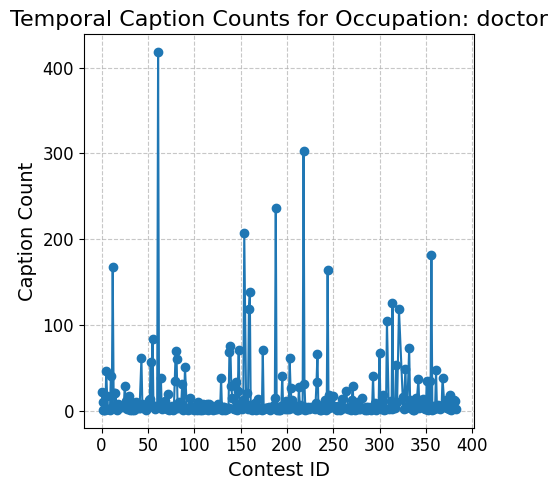

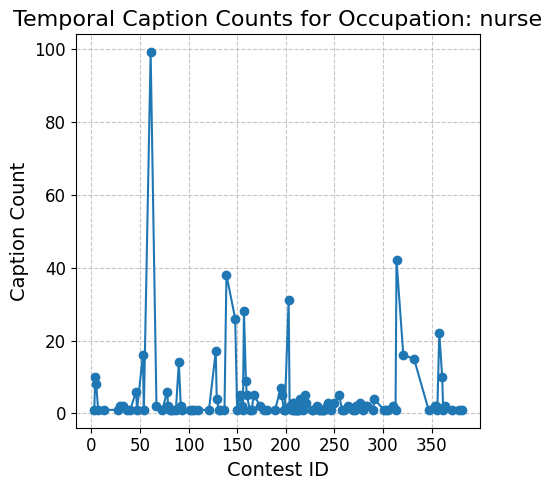

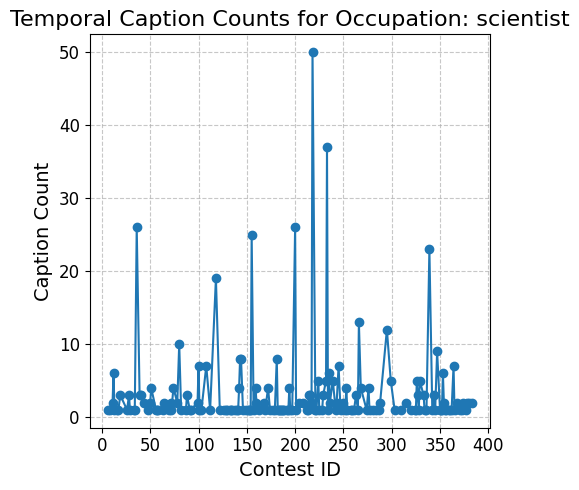

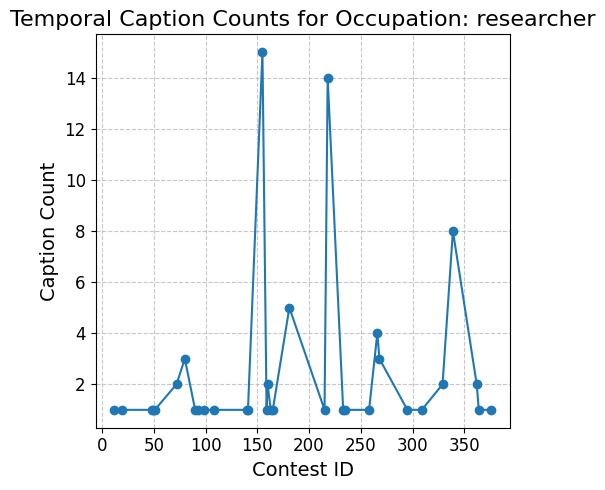

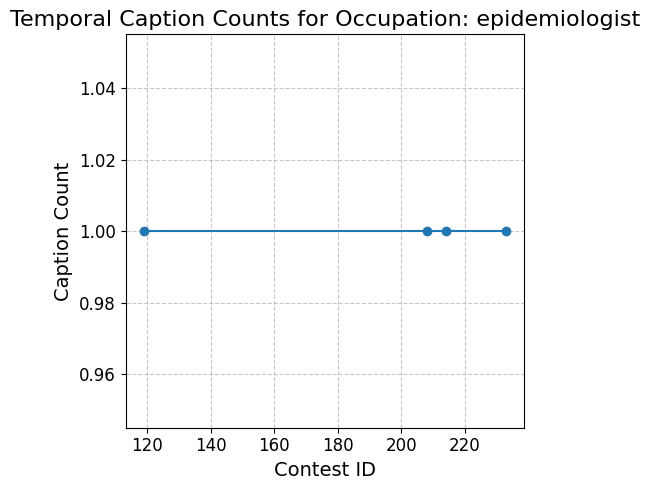

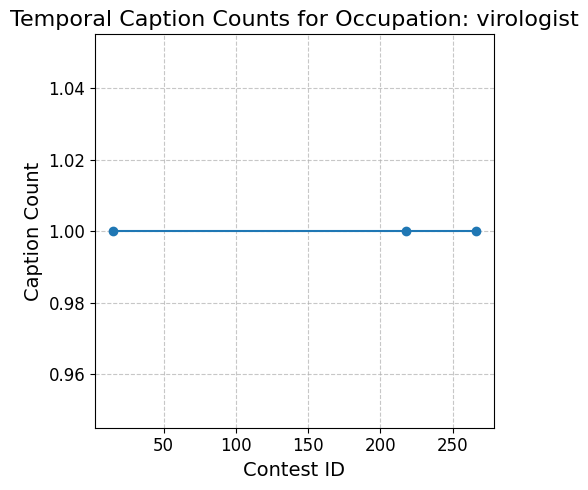

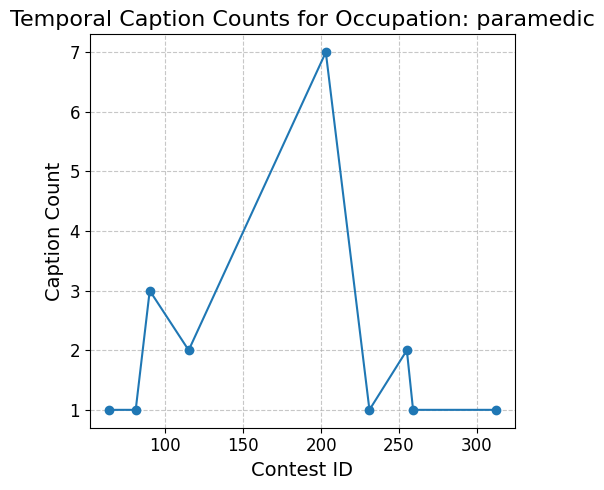

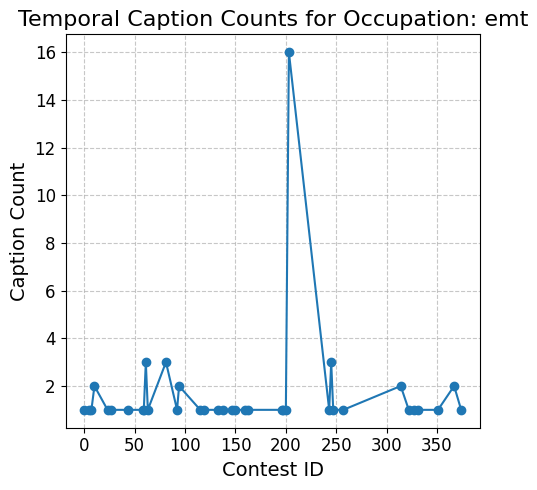

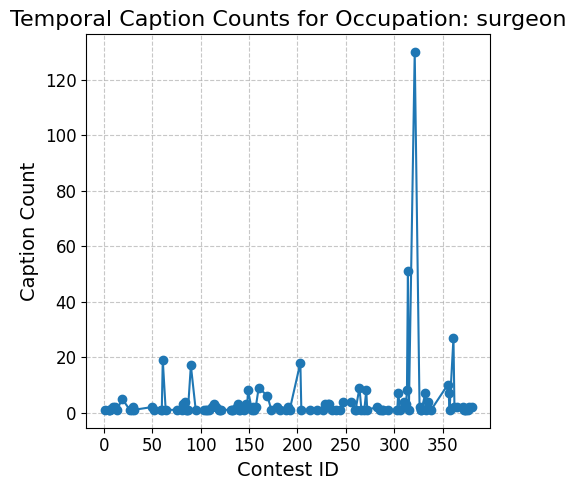

Occupation 'lab technician' not found in the data.


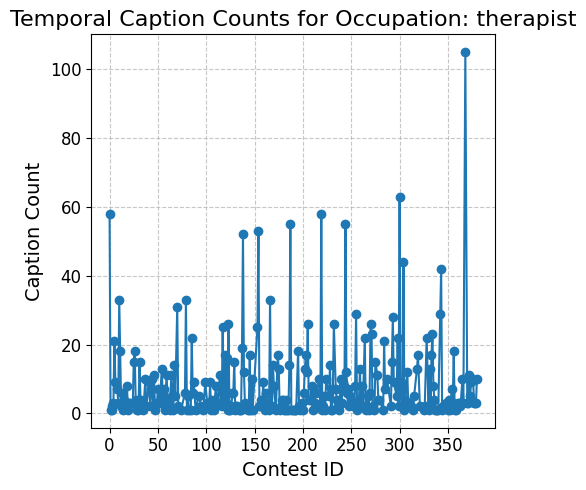

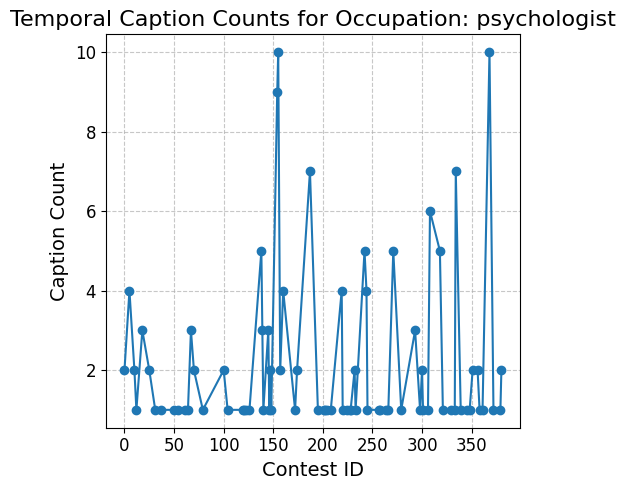

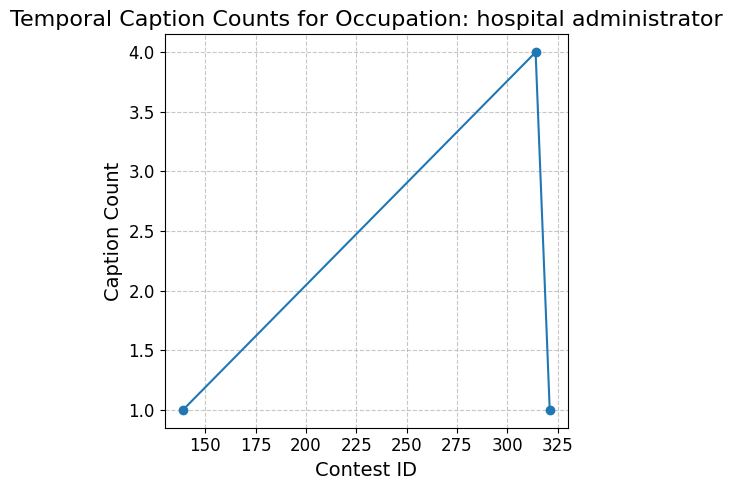

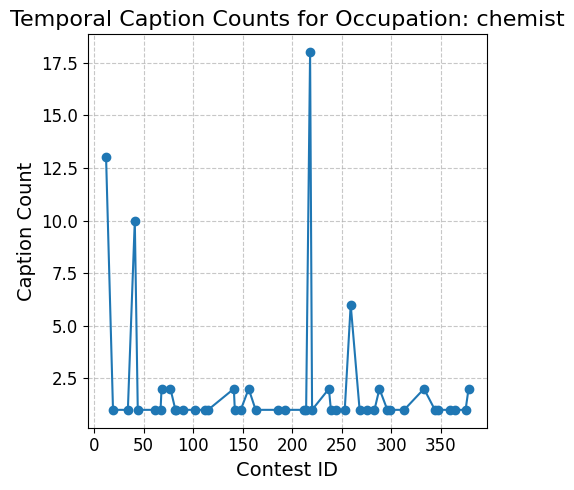

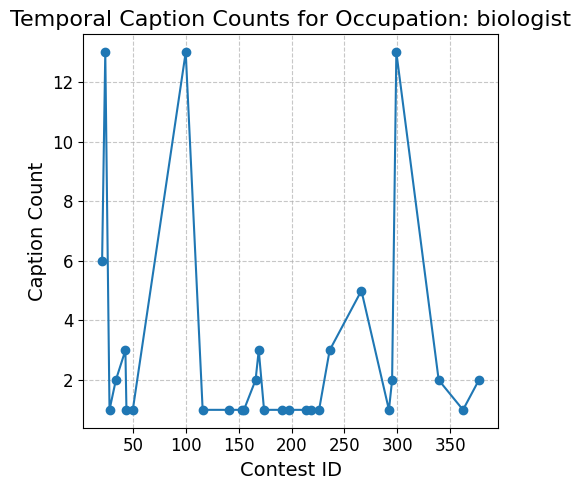

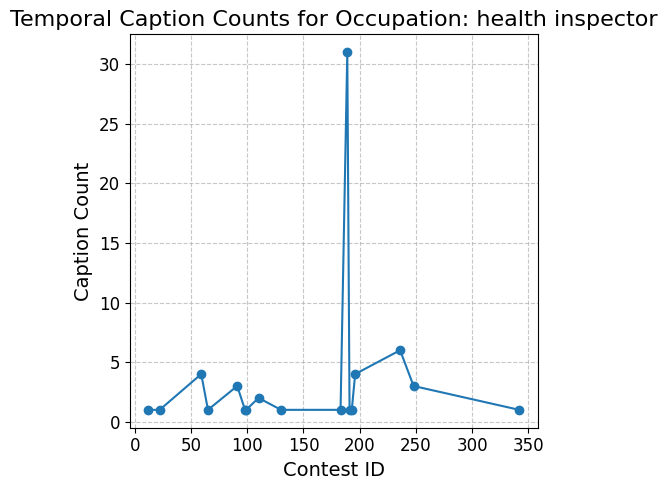

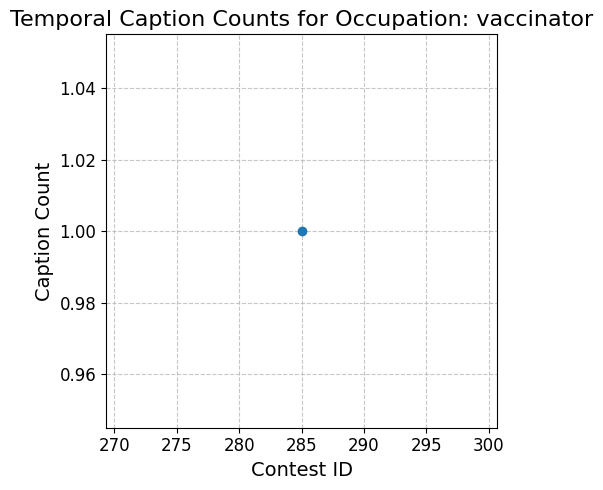

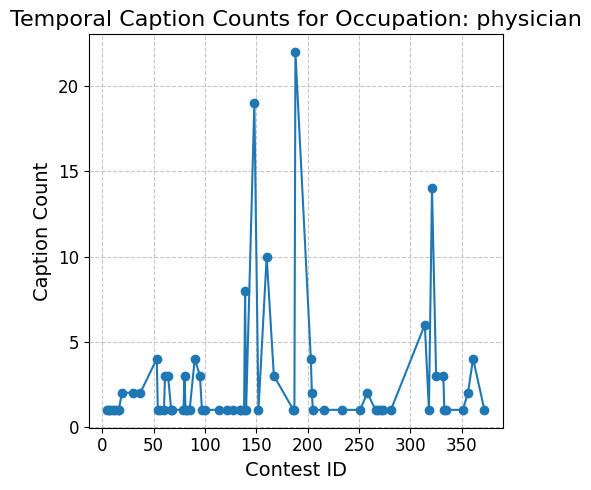

In [34]:
#Choose which group to track:
group_to_track = core_health_science

#Temporal analysis of each of these groups
occ_to_temporal = dict(zip(occupation_analysis_df['Occupation_Term'], occupation_analysis_df['Temporal_Counts']))

for occ in group_to_track:
    if occ in occ_to_temporal:
        temporal_counts = occ_to_temporal[occ]
        # Sort by contest_id
        sorted_counts = dict(sorted(temporal_counts.items()))
        
        plt.figure(figsize=(5, 5))
        plt.plot(
            list(sorted_counts.keys()),
            list(sorted_counts.values()),
            marker='o',
            label=occ
        )
        plt.title(f"Temporal Caption Counts for Occupation: {occ}", fontsize=16)
        plt.xlabel("Contest ID", fontsize=14)
        plt.ylabel("Caption Count", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Occupation '{occ}' not found in the data.")

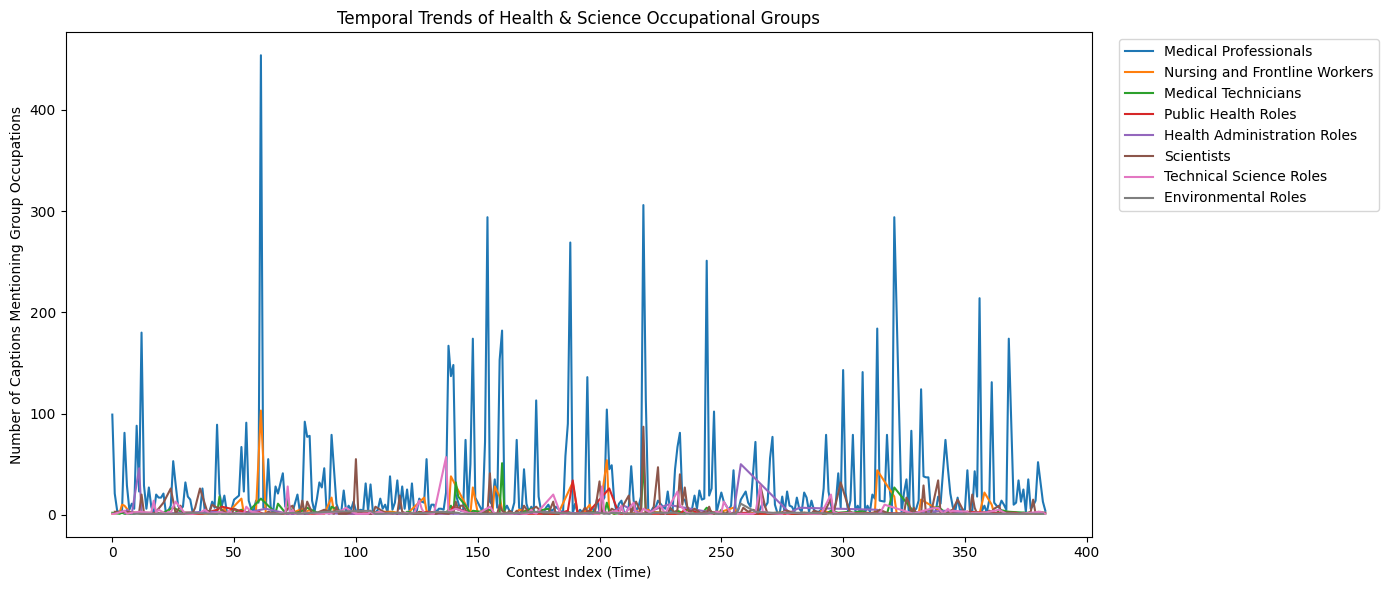

In [35]:
# check the temporal count of the groups identified above (groups not individual occupations)
group_temporal_counts = {}

for group_name, occupations in health_science_group_counts.items():
    counts_per_contest = defaultdict(int)
    for occ in occupations:
        if occ in occ_to_temporal:
            occ_lower= occ.lower()
            if occ_lower not in occ_to_temporal:
                continue
            temporal_dict = occ_to_temporal[occ_lower]

            #adding each contest count to the group 
            for contest_id, count in temporal_dict.items():
                counts_per_contest[contest_id] += count

    s = pd.Series(counts_per_contest).sort_index()

    group_temporal_counts[group_name] = s

plt.figure(figsize=(14, 6))


for group_name, series in group_temporal_counts.items():
    if series.sum() < 5:   # skip uninformative groups
        continue
    plt.plot(series.index, series.values, label=group_name)

plt.title("Temporal Trends of Health & Science Occupational Groups")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Number of Captions Mentioning Group Occupations")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

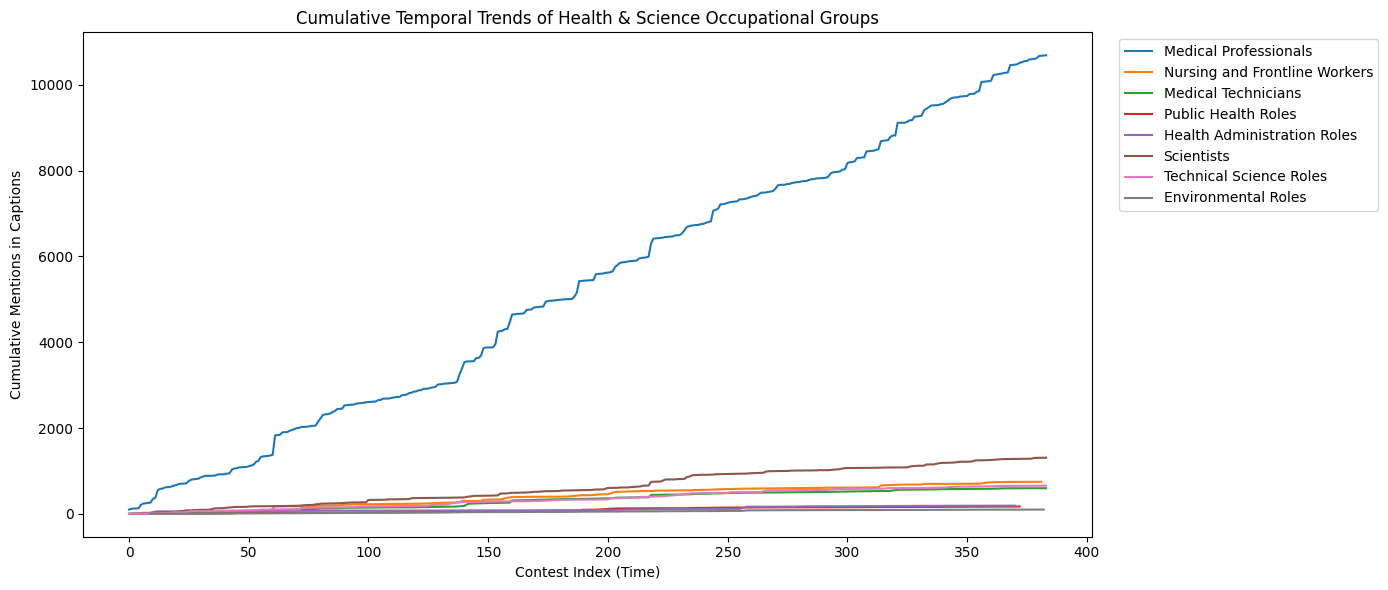

In [36]:
#Sum all occupations in the medical field to see overall trend
for group_name, occupations in health_science_group_counts.items():
    counts_per_contest = defaultdict(int)

    for occ in occupations:
        occ_lower = occ.lower()

        if occ_lower not in occ_to_temporal:
            continue

        temporal_dict = occ_to_temporal[occ_lower]

        for contest_id, count in temporal_dict.items():
            counts_per_contest[contest_id] += count

    # Convert into sorted series
    s = pd.Series(counts_per_contest).sort_index()
    group_temporal_counts[group_name] = s


plt.figure(figsize=(14, 6))

for group_name, series in group_temporal_counts.items():
    if series.sum() < 5:   # skip uninformative groups
        continue
    
    plt.plot(
        series.index, 
        series.cumsum().values,   # <-- cumulative sum
        label=group_name
    )

plt.title("Cumulative Temporal Trends of Health & Science Occupational Groups")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Cumulative Mentions in Captions")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()



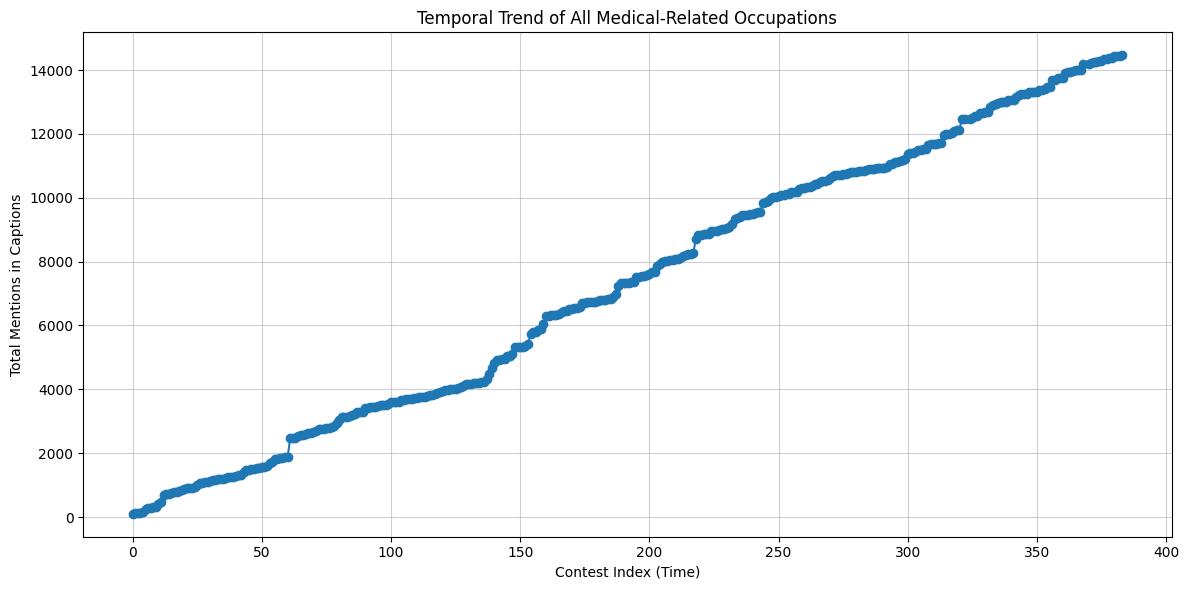

In [37]:
# Flatten all occupations into one unified medical list
all_medical_occupations = [
    occ.lower()
    for group_list in health_science_group_counts.values()
    for occ in group_list
]

total_counts_per_contest = defaultdict(int)

for occ in all_medical_occupations:
    occ_lower = occ.lower()

    if occ_lower not in occ_to_temporal:
        continue

    for contest_id, count in occ_to_temporal[occ_lower].items():
        total_counts_per_contest[contest_id] += count

# Convert into sorted pandas Series
total_medical_series = pd.Series(total_counts_per_contest).sort_index().cumsum()


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(
    total_medical_series.index,
    total_medical_series.values,
    marker='o'
)

plt.title("Temporal Trend of All Medical-Related Occupations")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Total Mentions in Captions")
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()


#### Social and culture words to track

In [38]:
social_cultural_occupations = [
    # Social justice / community roles
    "activist", "community organizer", "advocate", "social worker",
    "union organizer", "labor organizer", "caseworker", "counselor",
    "public defender", "civil rights lawyer", "mediator",
]

law_and_justice_occupations = ["police officer", "cop", "policeman", "policewoman", "sheriff",
    "deputy", "detective", "fbi agent", "cia agent", "security guard",
    "prison guard", "corrections officer", "patrol officer",
    "border patrol", "parole officer", "judge", "prosecutor",
    "attorney", "lawyer", "public defender"]

arts_culture_occupations = ["actor", "actress", "comedian", "musician", "singer", "rapper",
    "dancer", "performer", "entertainer", "director", "producer",
    "screenwriter", "playwright", "artist", "art critic",
    "painter", "sculptor", "writer", "author", "journalist",
    "reporter", "columnist", "editor", "broadcaster", "commentator",
    "podcaster", "radio host", "tv host", "news anchor",
    "photographer", "photojournalist"
]

religion_spiritual_occupations = ["priest", "minister", "pastor", "rabbi", "imam",
    "monk", "nun", "chaplain", "clergy", "theologian",
    "missionary", "evangelist", "yogi", "spiritual advisor"
]

education_academia_occupations = ["teacher", "professor", "lecturer", "principal", "school counselor",
    "dean", "coach", "instructor", "educator", "guidance counselor"]

tech_culture_occupations = ["influencer", "youtuber", "streamer", "gamer",
    "software engineer", "programmer", "developer", "coder",
    "data scientist", "computer scientist", "cybersecurity analyst",
    "it manager", "blogger", "content creator"]

labor_economy = ["worker", "employee", "employer", "manager", "boss",
    "gig worker", "uber driver", "lyft driver", "delivery driver",
    "cashier", "barista", "waiter", "waitress", "server",
    "bartender", "construction worker", "teacher", "nurse"]

immigration_border_occupations = ["immigration officer", "border agent", "customs officer",
    "translator", "interpreter", "refugee worker"
]

fashion_lifestyle_occupations = ["model", "fashion designer", "stylist", "hairdresser",
    "makeup artist", "chef", "barber", "personal trainer",
    "yoga instructor", "fitness coach", "lifestyle blogger"
]


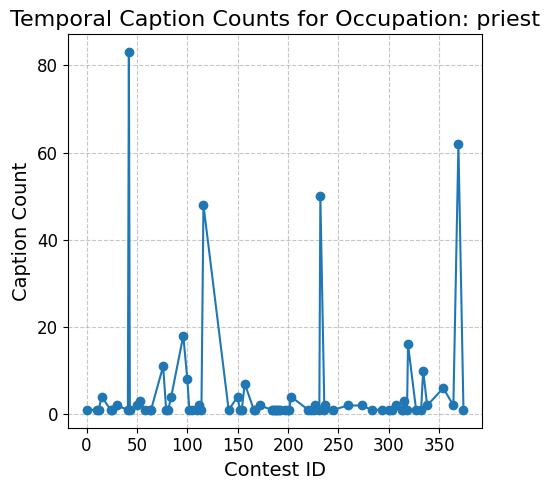

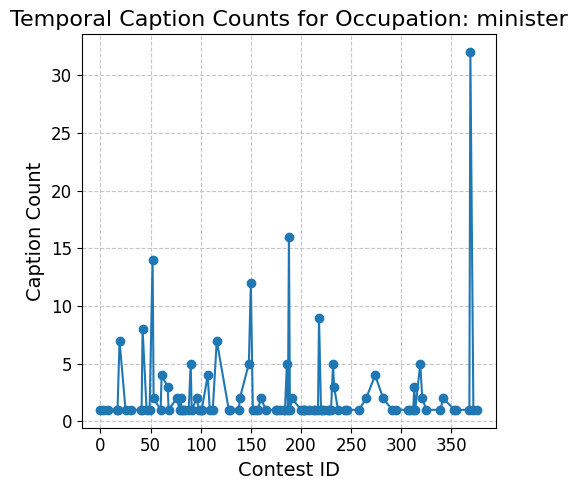

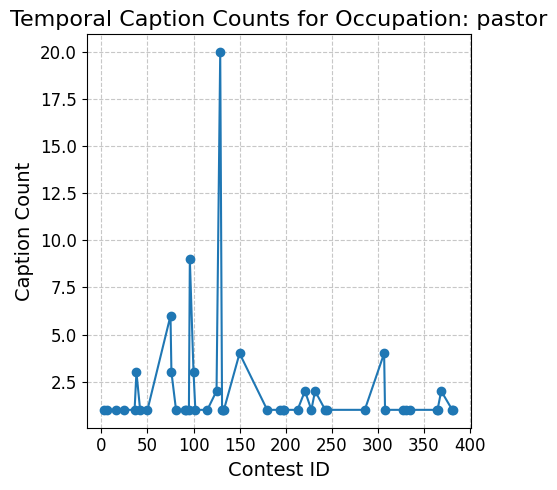

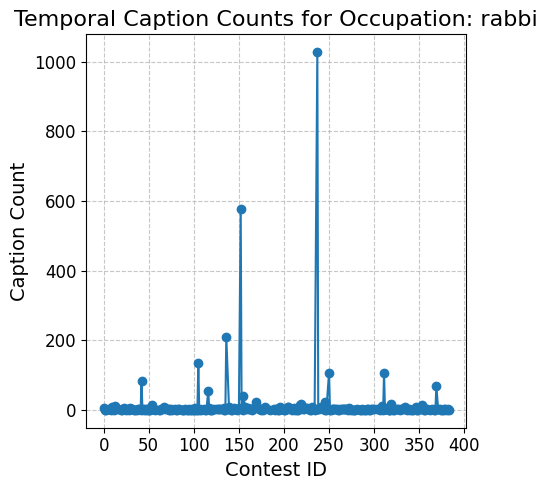

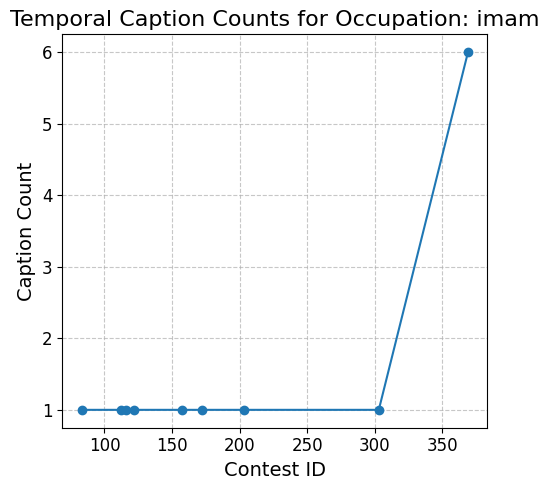

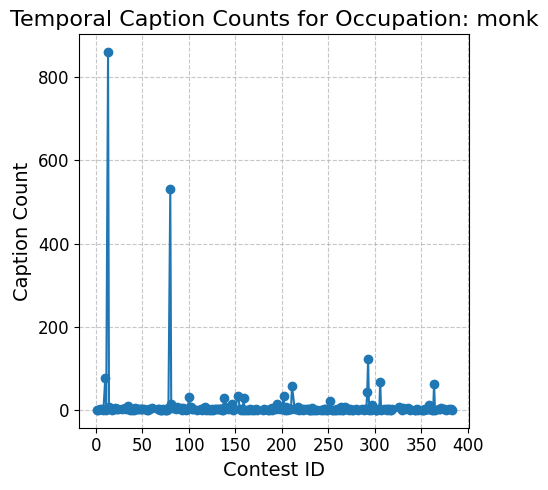

Occupation 'nun' not found in the data.


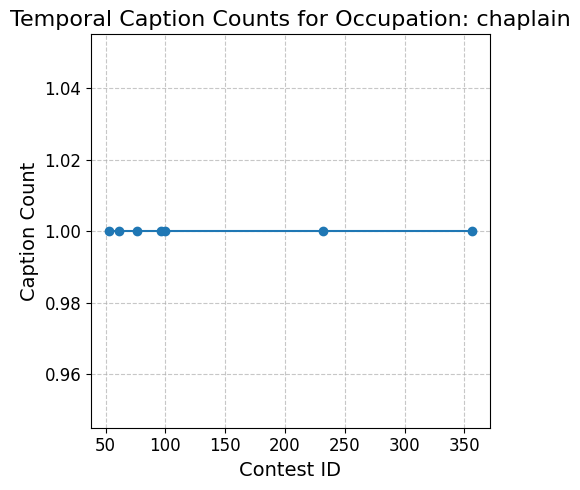

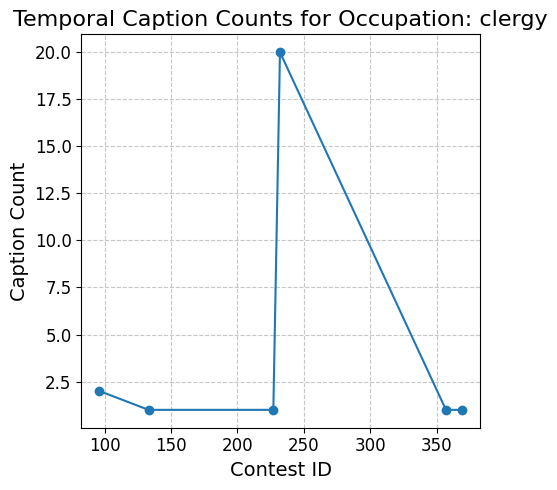

Occupation 'theologian' not found in the data.


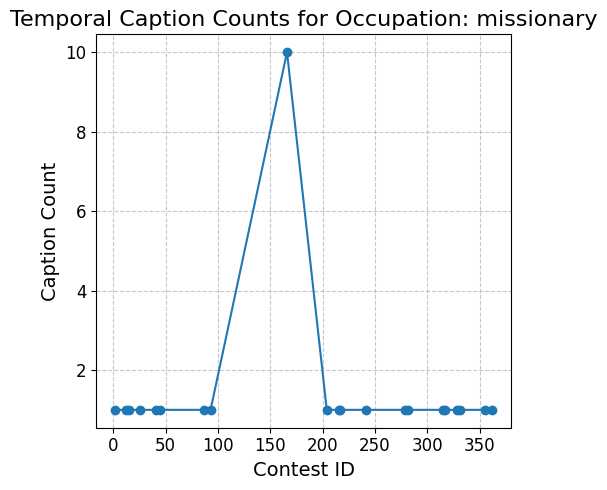

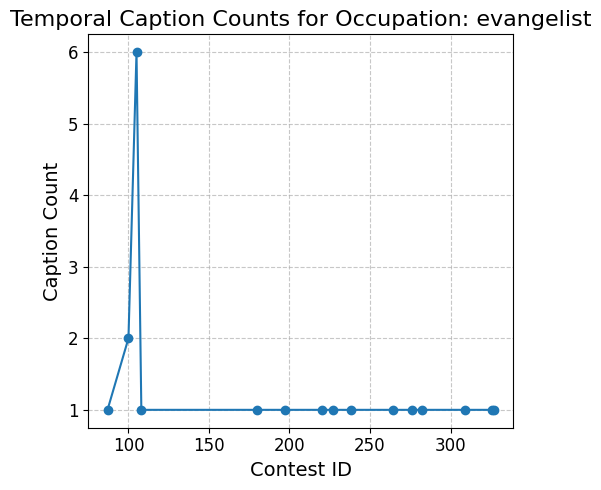

Occupation 'yogi' not found in the data.


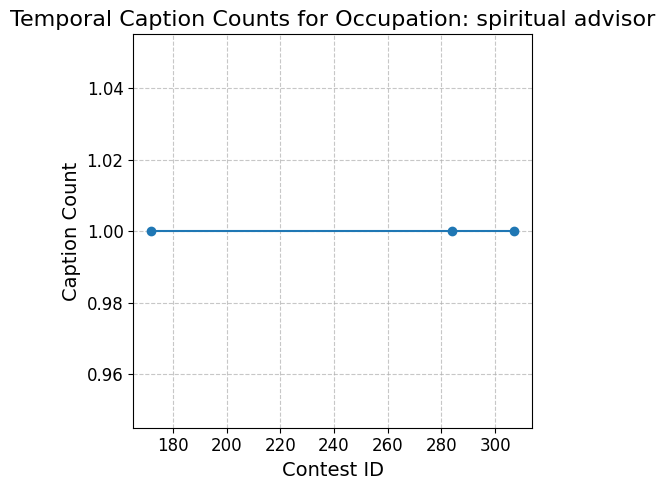

In [39]:
#Temporal analysis of social/cultural occupations
#Choose which group to track:
group_to_track = religion_spiritual_occupations

#Temporal analysis of each of these groups
occ_to_temporal = dict(zip(occupation_analysis_df['Occupation_Term'], occupation_analysis_df['Temporal_Counts']))

for occ in group_to_track:
    if occ in occ_to_temporal:
        temporal_counts = occ_to_temporal[occ]
        # Sort by contest_id
        sorted_counts = dict(sorted(temporal_counts.items()))
        
        plt.figure(figsize=(5, 5))
        plt.plot(
            list(sorted_counts.keys()),
            list(sorted_counts.values()),
            marker='o',
            label=occ
        )
        plt.title(f"Temporal Caption Counts for Occupation: {occ}", fontsize=16)
        plt.xlabel("Contest ID", fontsize=14)
        plt.ylabel("Caption Count", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Occupation '{occ}' not found in the data.")
    

In [40]:
social_cultural_group_counts = {
    "Social Justice / Community Roles": social_cultural_occupations,
    "Law and Justice Occupations": law_and_justice_occupations,
    "Arts and Culture Occupations": arts_culture_occupations,
    "Religion and Spiritual Occupations": religion_spiritual_occupations,
    "Education and Academia Occupations": education_academia_occupations,
    "Tech and Digital Culture Occupations": tech_culture_occupations,
    "Labor and Economy Occupations": labor_economy,
    "Immigration and Border Occupations": immigration_border_occupations,
    "Fashion and Lifestyle Occupations": fashion_lifestyle_occupations
}


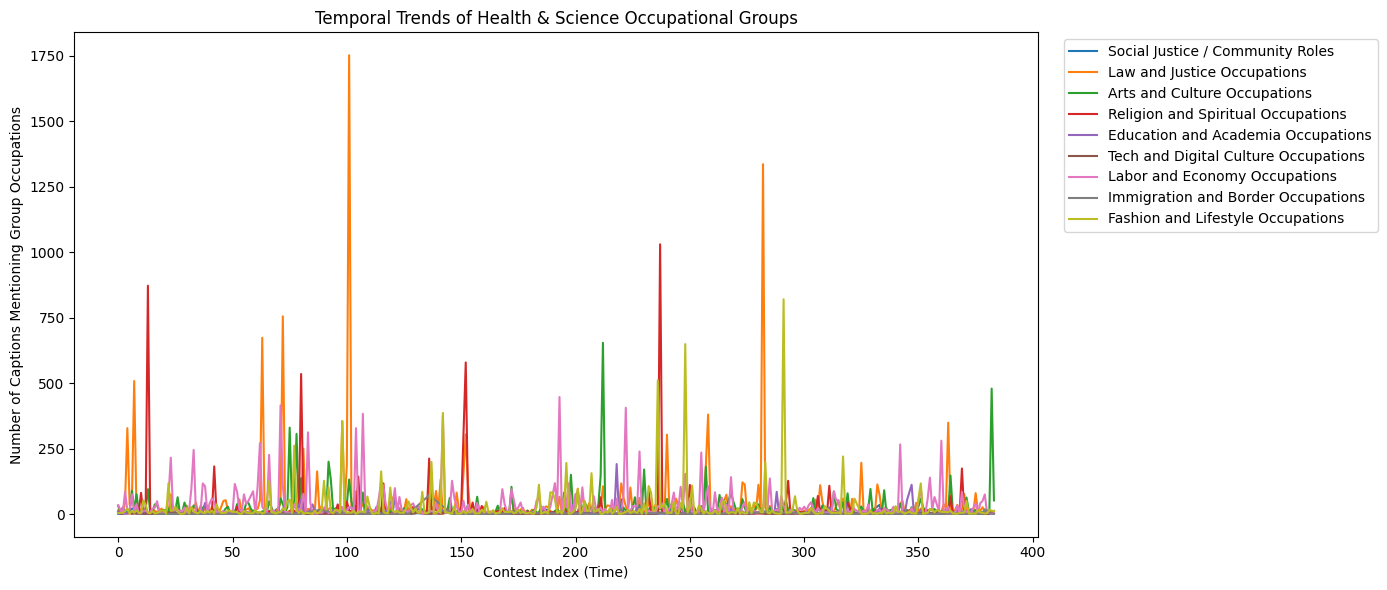

In [41]:
#temporal evolution of the groups
# check the temporal count of the groups identified above (groups not individual occupations)
group_temporal_counts = {}

for group_name, occupations in social_cultural_group_counts.items():
    counts_per_contest = defaultdict(int)
    for occ in occupations:
        if occ in occ_to_temporal:
            occ_lower= occ.lower()
            if occ_lower not in occ_to_temporal:
                continue
            temporal_dict = occ_to_temporal[occ_lower]

            #adding each contest count to the group 
            for contest_id, count in temporal_dict.items():
                counts_per_contest[contest_id] += count

    s = pd.Series(counts_per_contest).sort_index()

    group_temporal_counts[group_name] = s

plt.figure(figsize=(14, 6))


for group_name, series in group_temporal_counts.items():
    if series.sum() < 5:   # skip uninformative groups
        continue
    plt.plot(series.index, series.values, label=group_name)

plt.title("Temporal Trends of Health & Science Occupational Groups")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Number of Captions Mentioning Group Occupations")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


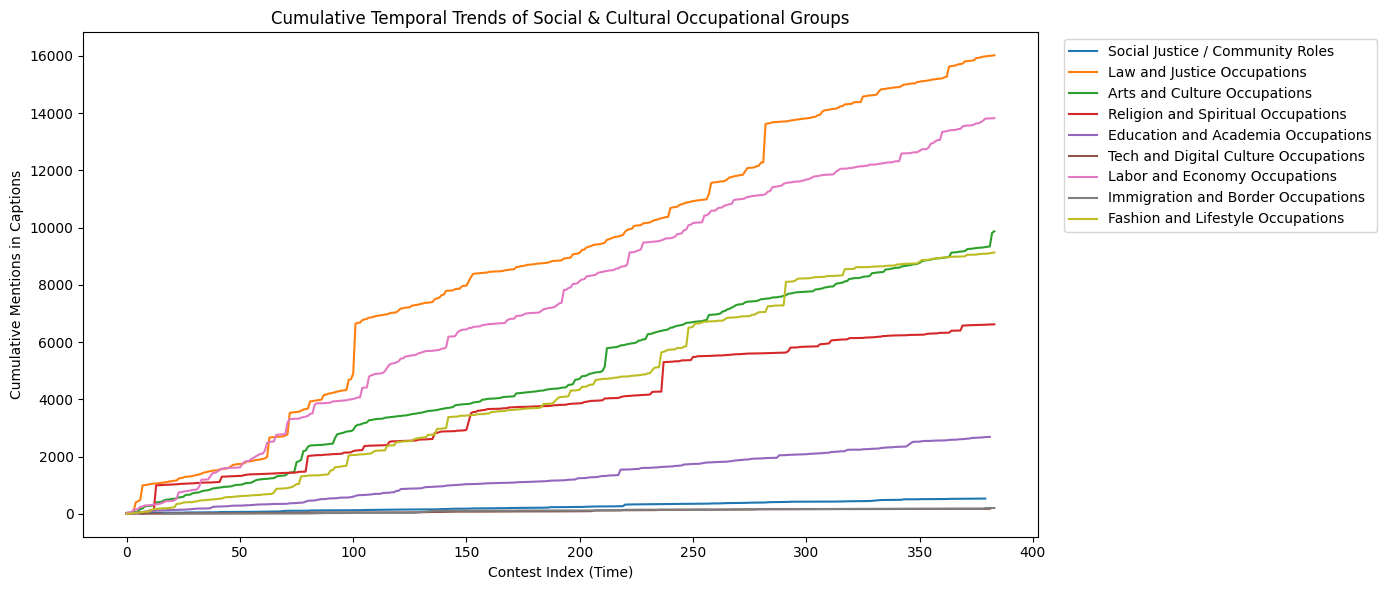

In [42]:
#Cumulative sum of the groups
plt.figure(figsize=(14, 6))
for group_name, series in group_temporal_counts.items():
    if series.sum() < 5:   # skip uninformative groups
        continue
    plt.plot(
        series.index, 
        series.cumsum().values,   # <-- cumulative sum
        label=group_name
    )
plt.title("Cumulative Temporal Trends of Social & Cultural Occupational Groups")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Cumulative Mentions in Captions")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


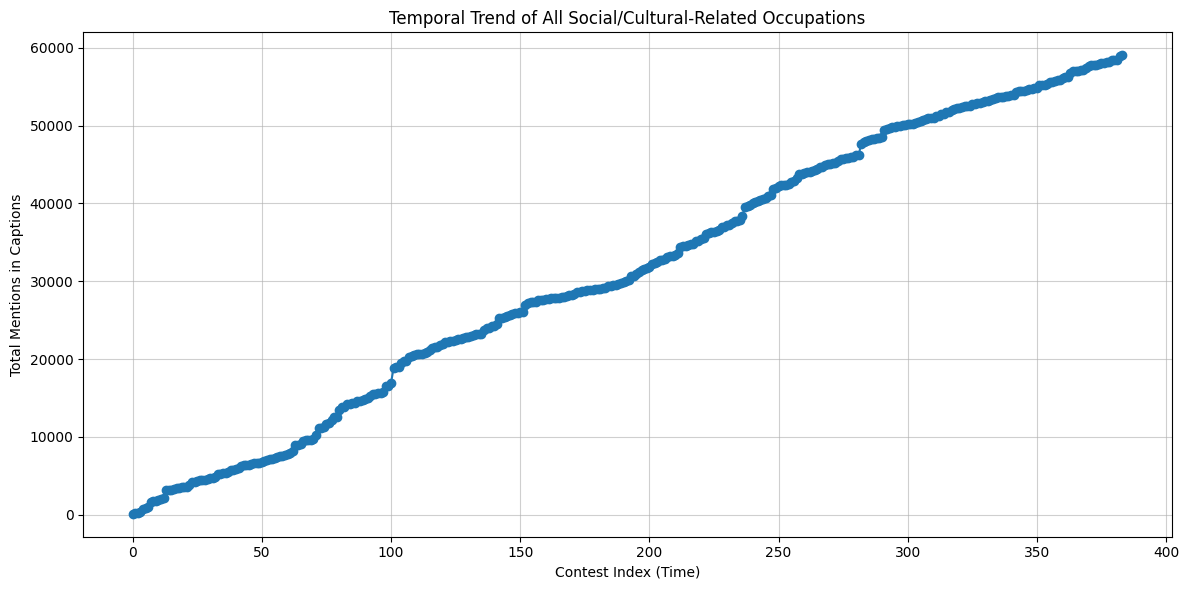

In [43]:
# cumulative of alll social/cultural occupations
all_social_cultural_occupations = [
    occ.lower()
    for group_list in social_cultural_group_counts.values()
    for occ in group_list
]
total_counts_per_contest = defaultdict(int)
for occ in all_social_cultural_occupations:
    occ_lower = occ.lower()

    if occ_lower not in occ_to_temporal:
        continue

    for contest_id, count in occ_to_temporal[occ_lower].items():
        total_counts_per_contest[contest_id] += count
# Convert into sorted pandas Series
total_social_series = pd.Series(total_counts_per_contest).sort_index().cumsum()
plt.figure(figsize=(12, 6))
plt.plot(
    total_social_series.index,
    total_social_series.values,
    marker='o'
)
plt.title("Temporal Trend of All Social/Cultural-Related Occupations")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Total Mentions in Captions")
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

#### Environmental debates to track

In [44]:
climate_science = [
    "climate scientist",
    "climatologist",
    "meteorologist",
    "atmospheric scientist",
    "environmental scientist",
    "environmental engineer",
    "environmental planner",
    "environmental consultant"
]
earth_science = [
    "geologist",
    "hydrologist",
    "seismologist",
    "volcanologist",
    "geographer",
    "naturalist",
    "ecological researcher"
]
wildlife_conservation = [
    "environmentalist",
    "conservationist",
    "park ranger",
    "forest ranger",
    "forester",
    "game warden",
    "wildlife biologist",
    "zoologist",
    "ornithologist",
    "entomologist",
    "ichthyologist",
    "paleontologist",
    "palaeontologist",
    "herpetologist"
]
environmental_health = [
    "environmental health officer",
    "sanitation worker",
    "garbage man",
    "waste collector",
    "waste manager",
    "recycling worker",
    "water tester",
    "water inspector",
    "energy auditor"
]
sustainability_energy = [
    "sustainability officer",
    "sustainability consultant",
    "renewable energy engineer",
    "solar installer",
    "wind turbine technician",
    "power plant operator"
]
land_ecosystems = [
    "arborist",
    "tree surgeon",
    "tree trimmer",
    "tree doctor",
    "landscape gardener",
    "landscape architect",
    "landscaper",
    "botanist"
]
resource_extraction = [
    "farmer",
    "rancher",
    "beekeeper",
    "fisherman",
    "fishing guide",
    "logger",
    "lumberjack",
    "miner",
    "coal miner",
    "oil driller"
]
environmental_groups = {
    "Climate Science": climate_science,
    "Earth Science": earth_science,
    "Wildlife & Conservation": wildlife_conservation,
    "Environmental Health & Waste": environmental_health,
    "Sustainability & Green Energy": sustainability_energy,
    "Land & Ecosystems": land_ecosystems,
    "Agriculture & Extraction": resource_extraction
}


Occupation 'climate scientist' not found in the data.


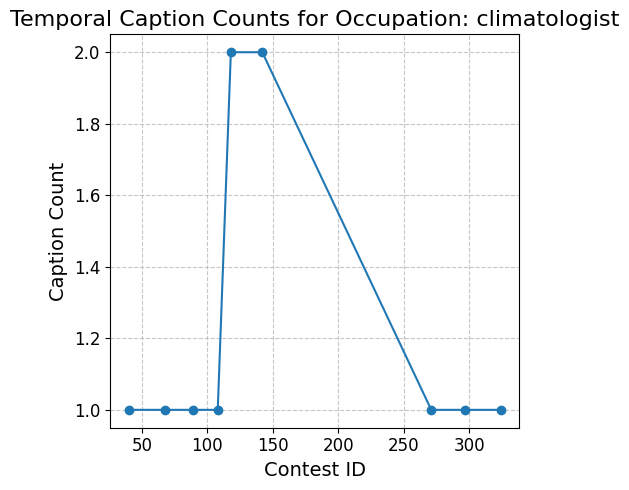

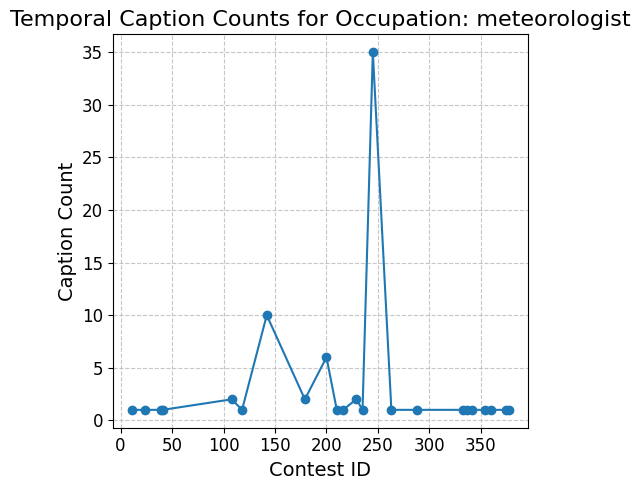

Occupation 'atmospheric scientist' not found in the data.


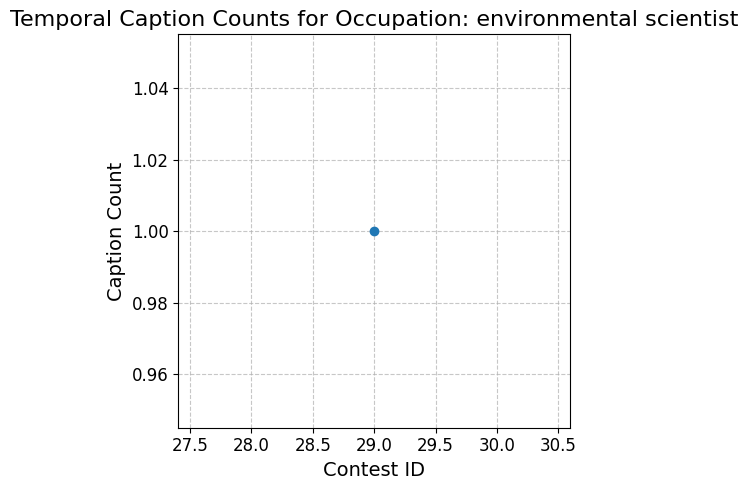

Occupation 'environmental engineer' not found in the data.


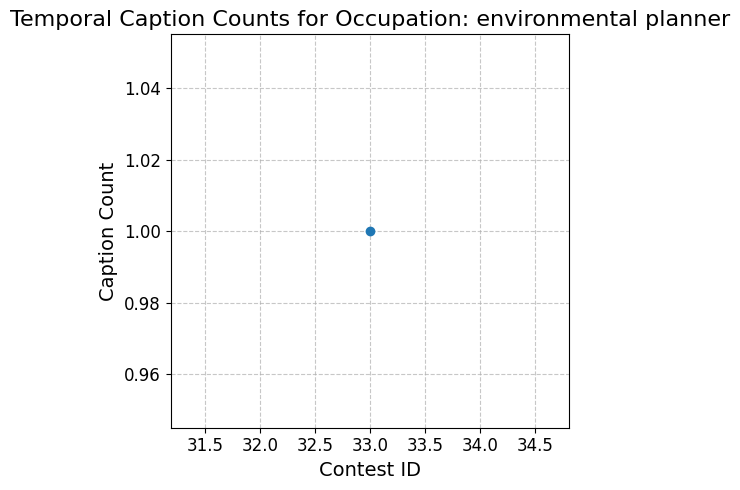

Occupation 'environmental consultant' not found in the data.


In [45]:
#Temporal analysis of social/cultural occupations
#Choose which group to track:
group_to_track = climate_science
#Temporal analysis of each of these groups
occ_to_temporal = dict(zip(occupation_analysis_df['Occupation_Term'], occupation_analysis_df['Temporal_Counts']))
for occ in group_to_track:
    if occ in occ_to_temporal:
        temporal_counts = occ_to_temporal[occ]
        # Sort by contest_id
        sorted_counts = dict(sorted(temporal_counts.items()))
        
        plt.figure(figsize=(5, 5))
        plt.plot(
            list(sorted_counts.keys()),
            list(sorted_counts.values()),
            marker='o',
            label=occ
        )
        plt.title(f"Temporal Caption Counts for Occupation: {occ}", fontsize=16)
        plt.xlabel("Contest ID", fontsize=14)
        plt.ylabel("Caption Count", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Occupation '{occ}' not found in the data.")

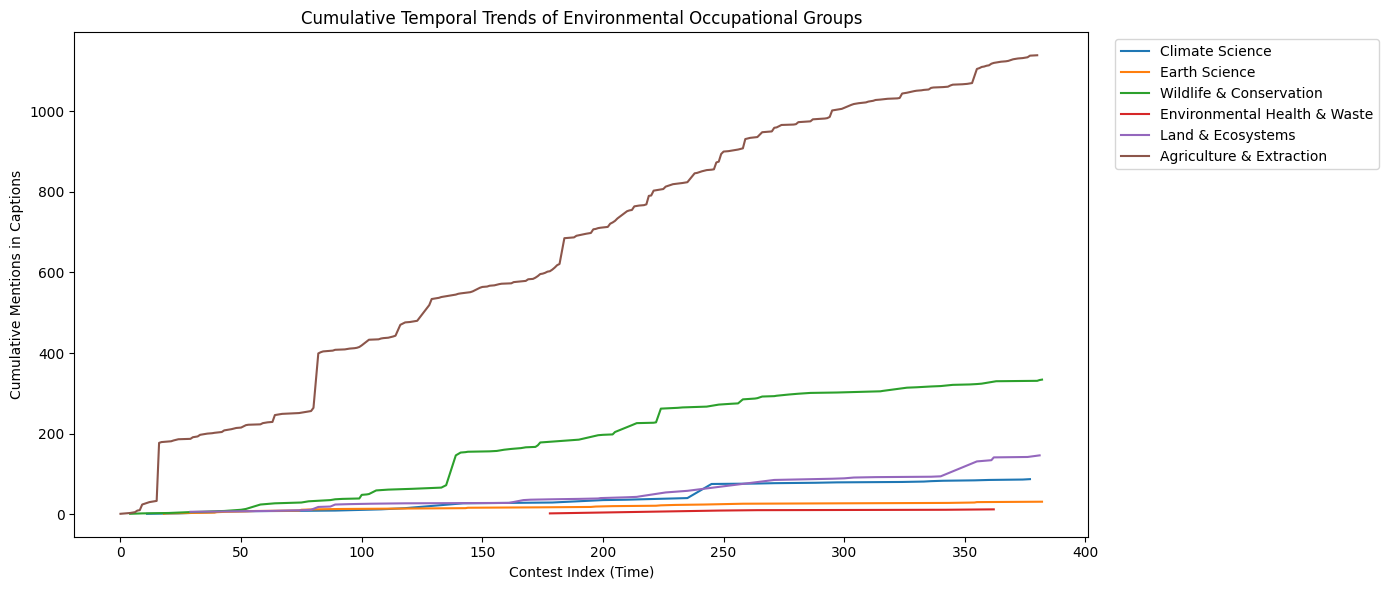

In [46]:
#cumulative trends of the environmental groups
group_temporal_counts = {}
for group_name, occupations in environmental_groups.items():
    counts_per_contest = defaultdict(int)
    for occ in occupations:
        if occ in occ_to_temporal:
            occ_lower= occ.lower()
            if occ_lower not in occ_to_temporal:
                continue
            temporal_dict = occ_to_temporal[occ_lower]

            #adding each contest count to the group 
            for contest_id, count in temporal_dict.items():
                counts_per_contest[contest_id] += count

    s = pd.Series(counts_per_contest).sort_index()

    group_temporal_counts[group_name] = s
plt.figure(figsize=(14, 6))
for group_name, series in group_temporal_counts.items():
    if series.sum() < 5:   # skip uninformative groups
        continue
    plt.plot(
        series.index, 
        series.cumsum().values,   # <-- cumulative sum
        label=group_name
    )
plt.title("Cumulative Temporal Trends of Environmental Occupational Groups")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Cumulative Mentions in Captions")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


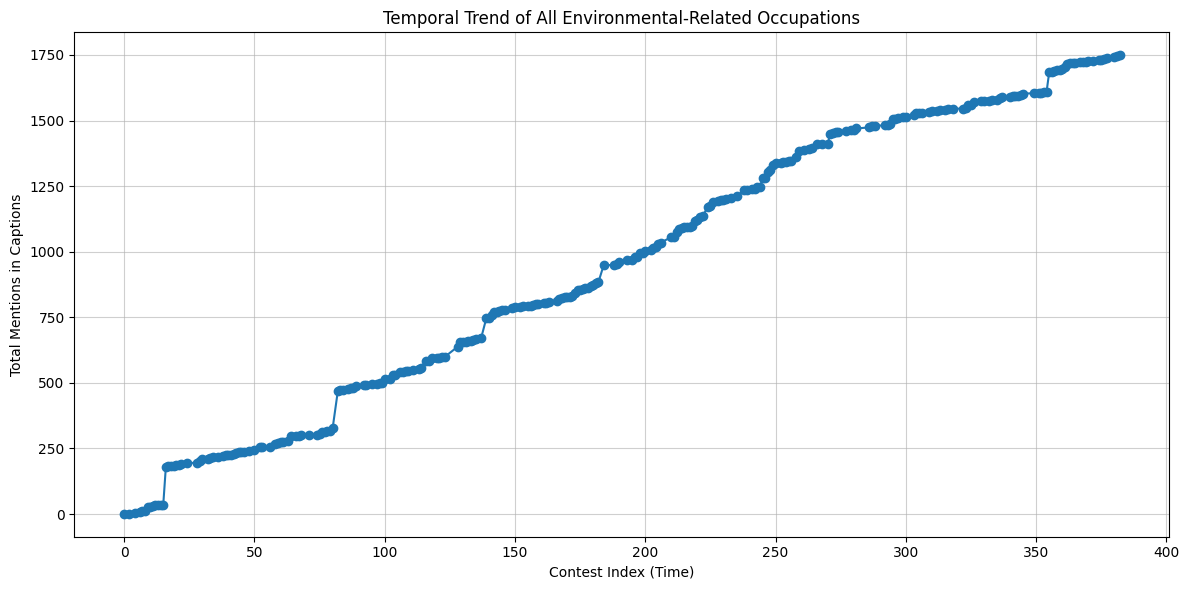

In [47]:
#cumulative of all environmental occupations
total_counts_per_contest = defaultdict(int)
for group_name, occupations in environmental_groups.items():
    for occ in occupations:
        occ_lower = occ.lower()

        if occ_lower not in occ_to_temporal:
            continue

        for contest_id, count in occ_to_temporal[occ_lower].items():
            total_counts_per_contest[contest_id] += count
# Convert into sorted pandas Series
total_environmental_series = pd.Series(total_counts_per_contest).sort_index().cumsum()
plt.figure(figsize=(12, 6))
plt.plot(
    total_environmental_series.index,
    total_environmental_series.values,
    marker='o'
)
plt.title("Temporal Trend of All Environmental-Related Occupations")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Total Mentions in Captions")
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

#### Economy and industry to track

In [48]:
business_leadership = [
    "ceo",
    "executive",
    "chief",
    "chief executive",
    "chief operator",
    "chief justice",
    "manager",
    "managing director",
    "branch manager",
    "department head",
    "division head",
    "supervisor",
    "administrator",
    "office manager",
    "operations manager",
    "project manager",
    "project coordinator",
    "business manager",
    "resource manager",
    "floor manager",
    "shop manager",
    "store manager",
    "production manager",
    "department manager",
    "sales manager",
    "marketing manager",
    "procurement manager",
    "risk management",
    "financial manager",
    "investment manager",
    "account executive"
]

finance_roles = [
    "banker",
    "investment banker",
    "investment advisor",
    "investment analyst",
    "financial advisor",
    "financial analyst",
    "financial planner",
    "financial consultant",
    "financier",
    "cpa",
    "accountant",
    "account manager",
    "accounting manager",
    "accounting staff",
    "auditor",
    "internal auditor",
    "tax accountant",
    "tax advisor",
    "tax attorney",
    "tax preparer",
    "tax collector",
    "tax inspector",
    "tax assessor",
    "tax specialist",
    "treasurer",
    "comptroller",
    "controller",
    "public accountant",
    "estate planner",
    "mortgage broker",
    "loan officer",
    "loan processor",
    "purchaser",
    "buyer",
    "stock broker",
    "bond trader",
    "bondsman",
    "financial officer",
    "portfolio manager"
]

sales_retail = [
    "salesperson",
    "sales associate",
    "sales representative",
    "sales director",
    "sales consultant",
    "sales advertising",
    "store clerk",
    "shop assistant",
    "shop clerk",
    "cashier",
    "vendor",
    "retail worker",
    "customer service",
    "customer representative",
    "service representative",
    "service worker",
    "service manager",
    "waiter",
    "waitress",
    "barista",
    "server",
    "bartender",
    "barkeep",
    "ticket agent",
    "travel agent",
    "travel consultant",
    "booking agent",
    "store detective",
    "storekeeper",
    "shop girl",
    "shop boy"
]
legal_econ_roles = [
    "lawyer",
    "attorney",
    "attorney general",
    "corporate lawyer",
    "public defender",
    "prosecutor",
    "barrister",
    "litigator",
    "trial lawyer",
    "patent lawyer",
    "legal counsel",
    "legal advisor",
    "legal assistant",
    "legal aide",
    "probate lawyer",
    "district attorney"
]
manufacturing_trades = [
    "builder",
    "construction worker",
    "construction manager",
    "construction person",
    "construction engineer",
    "contractor",
    "carpenter",
    "mason",
    "bricklayer",
    "plumber",
    "electrician",
    "mechanic",
    "mechanical engineer",
    "electrical engineer",
    "structural engineer",
    "systems engineer",
    "machine operator",
    "assembler",
    "manufacturer",
    "fabricator",
    "welder",
    "boilermaker",
    "pipefitter",
    "ironworker",
    "steelworker",
    "cement mason",
    "digger",
    "excavator",
    "miner",
    "coal miner",
    "logger",
    "lumberjack"
]
transport_logistics = [
    "driver",
    "uber driver",
    "delivery driver",
    "truck driver",
    "bus driver",
    "train driver",
    "train conductor",
    "locomotive engineer",
    "aviator",
    "pilot",
    "airline pilot",
    "helicopter pilot",
    "ship captain",
    "boat captain",
    "sailor",
    "seaman",
    "ferryman",
    "cabbie",
    "cab driver",
    "taxi driver",
    "chauffeur",
    "courier",
    "mailman",
    "mail carrier",
    "postal carrier",
    "transporter",
    "loader",
    "hauler",
    "freight handler",
    "baggage handler",
    "forklift operator",
    "cargo worker",
    "tanker",
    "warehouse worker",
    "logistics specialist"
]
food_hospitality = [
    "chef",
    "head chef",
    "sous chef",
    "cook",
    "line cook",
    "grill cook",
    "fry cook",
    "pastry chef",
    "pastry cook",
    "food processor",
    "food tester",
    "food handler",
    "food preparation",
    "baker",
    "bread baker",
    "pizza maker",
    "pizzaiolo",
    "bartender",
    "barkeep",
    "bar back",
    "waiter",
    "waitress",
    "cafeteria worker",
    "caterer",
    "caterer truck",
    "restaurant manager",
    "restauranteur",
    "host",
    "hostess",
    "bar manager"
]
media_creative = [
    "journalist",
    "reporter",
    "news anchor",
    "news reporter",
    "newscaster",
    "columnist",
    "commentator",
    "radio announcer",
    "radio producer",
    "cinematographer",
    "camera operator",
    "film director",
    "director",
    "art director",
    "creative director",
    "fashion designer",
    "graphic designer",
    "illustrator",
    "painter",
    "artist",
    "writer",
    "author",
    "screenwriter",
    "copywriter",
    "book editor",
    "editor",
    "publisher",
    "publicist",
    "broadcaster",
    "announcer"
]


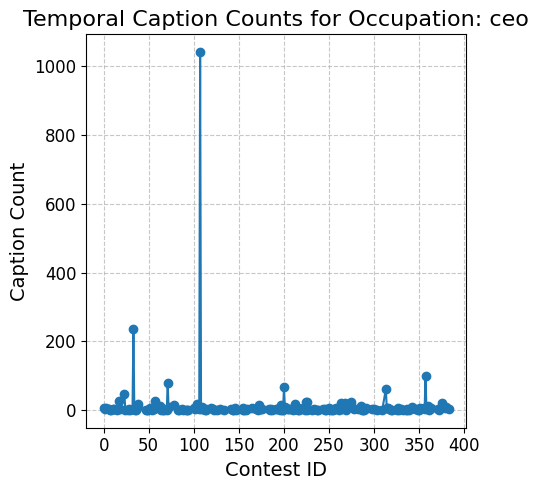

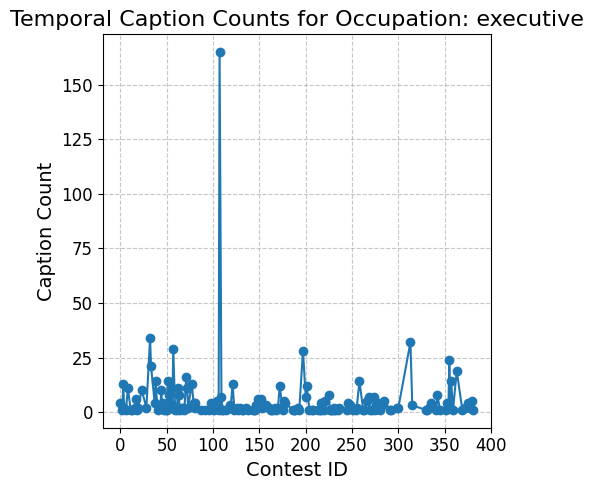

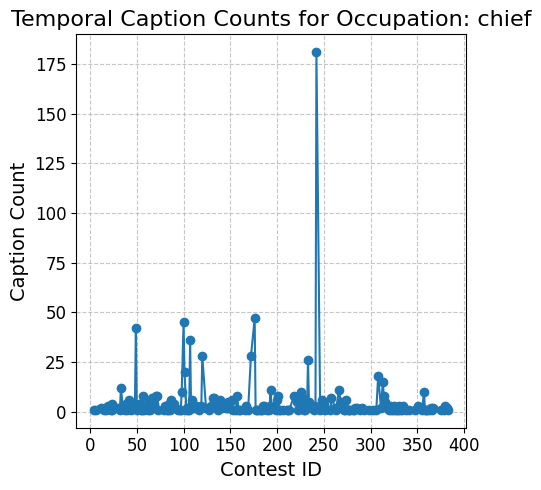

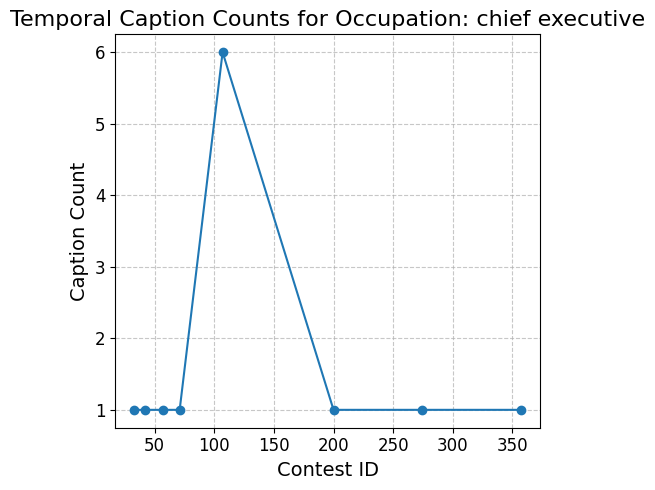

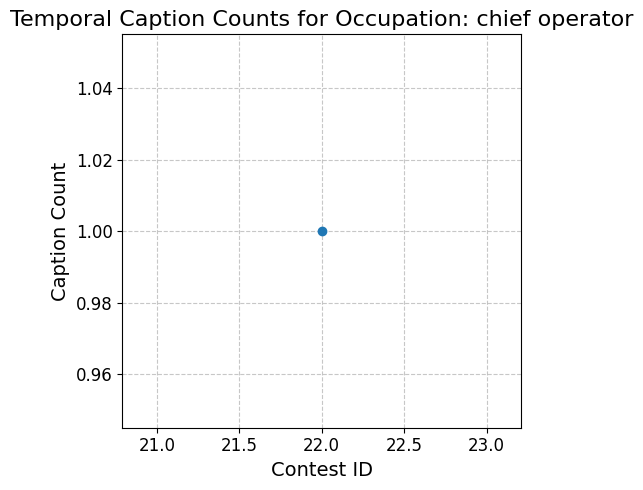

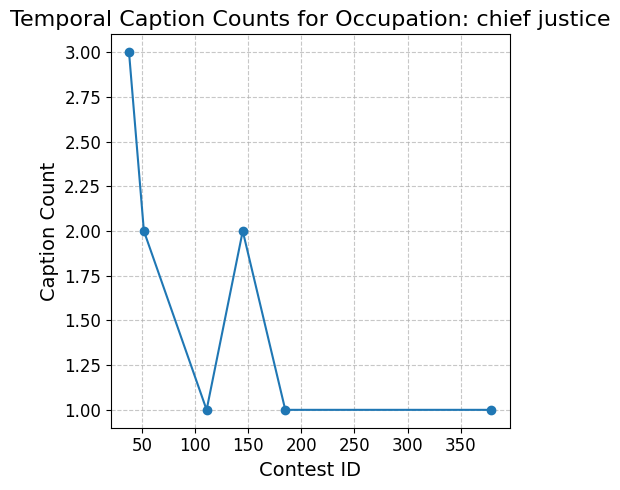

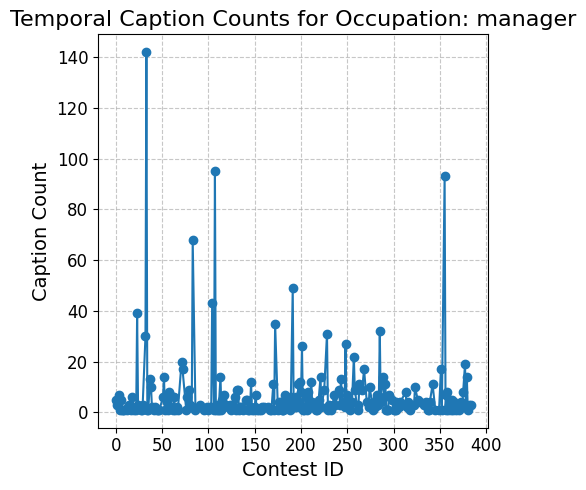

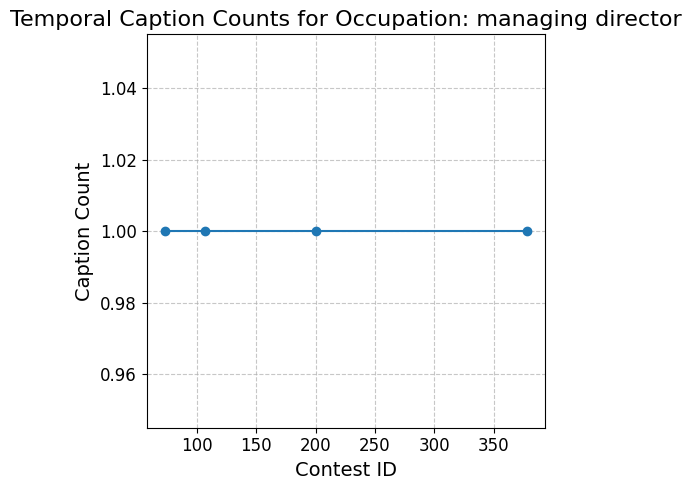

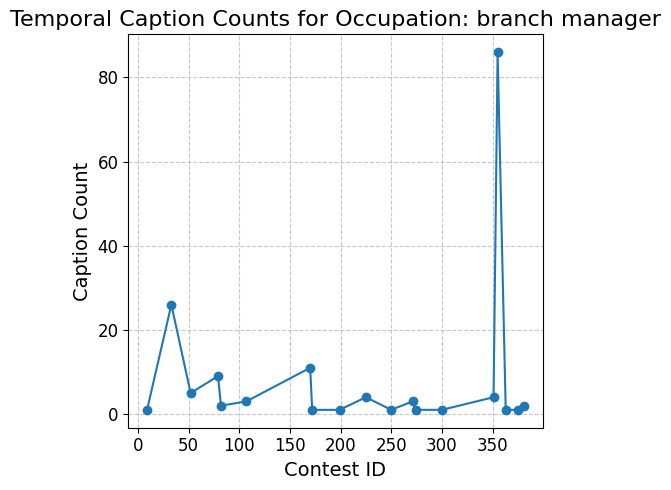

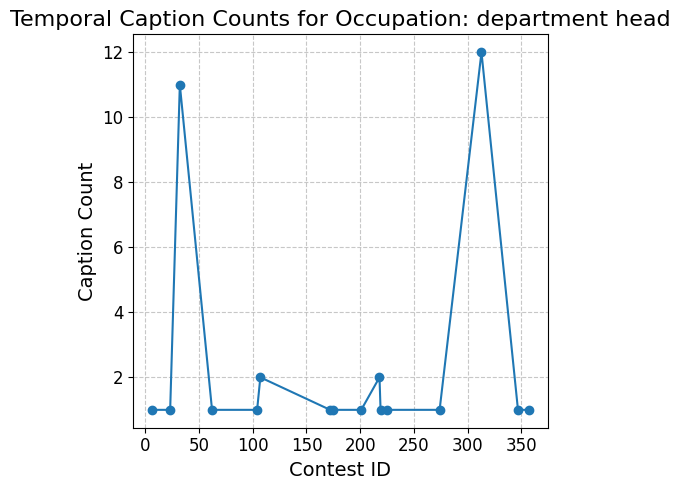

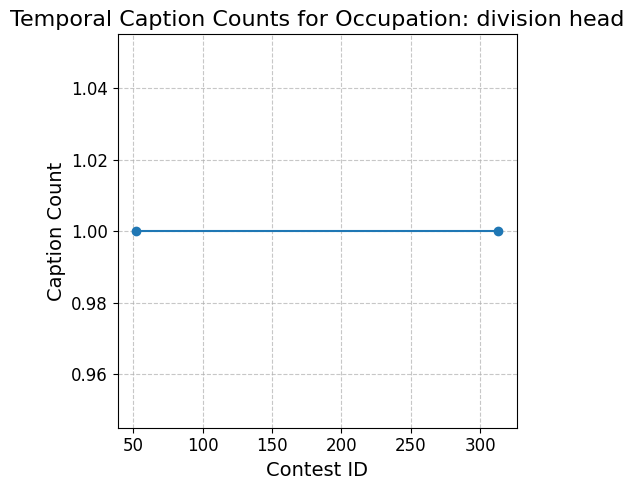

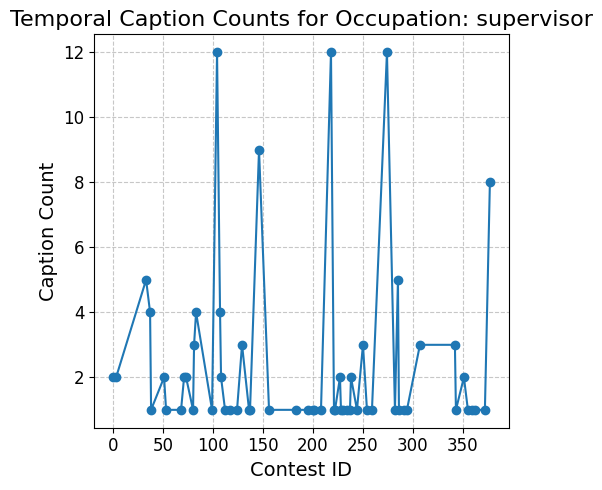

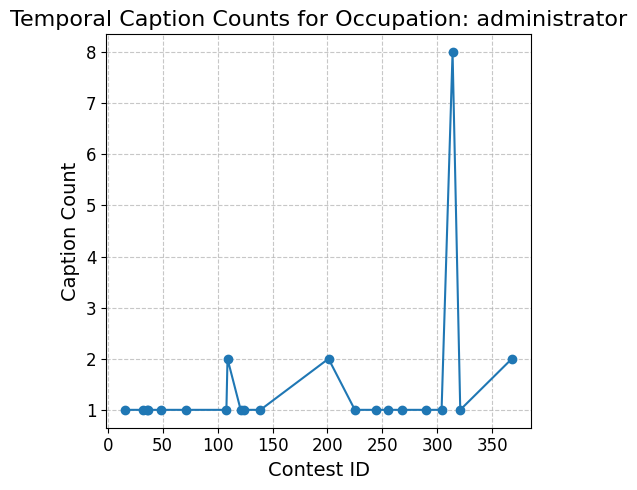

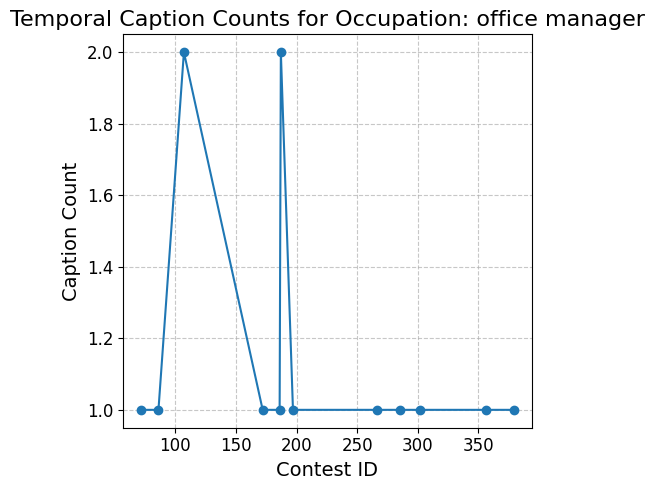

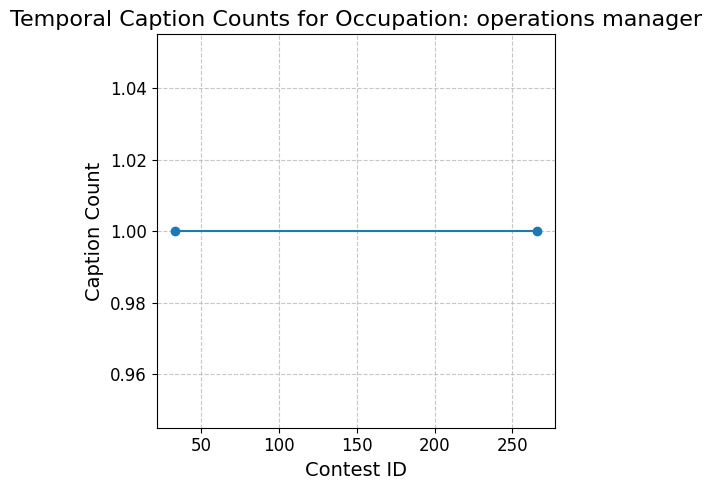

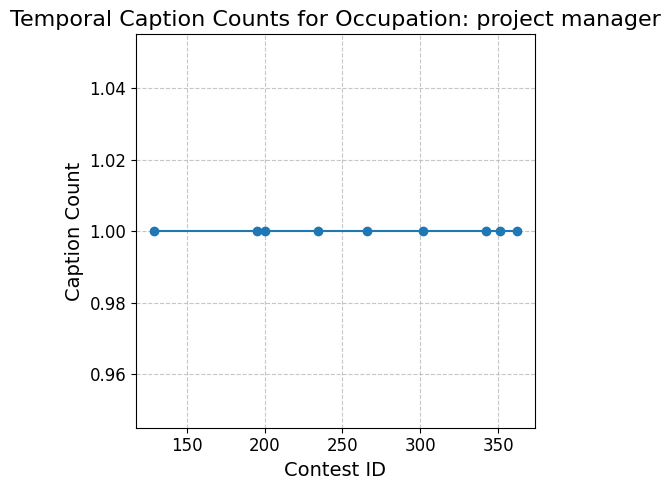

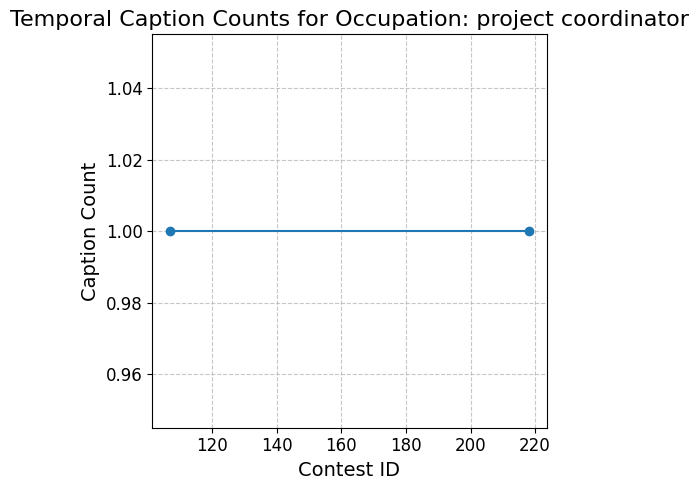

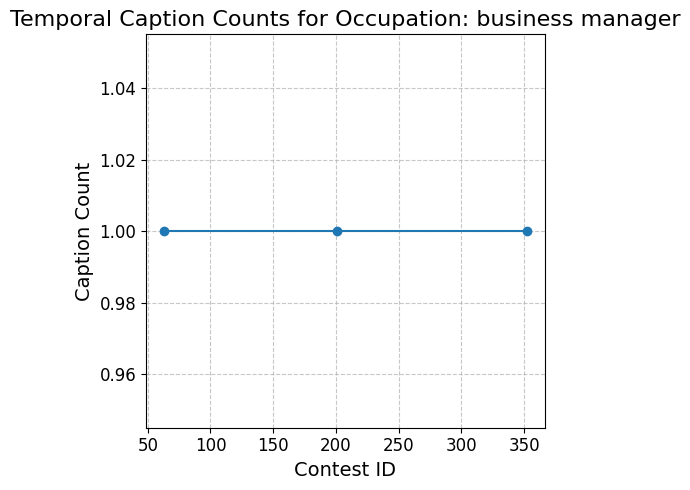

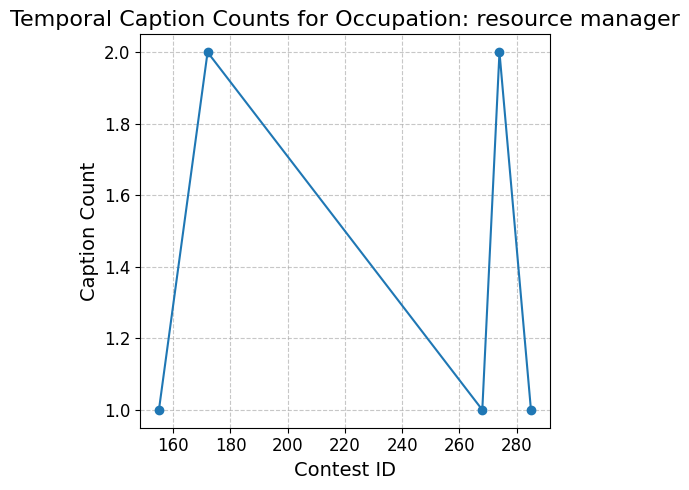

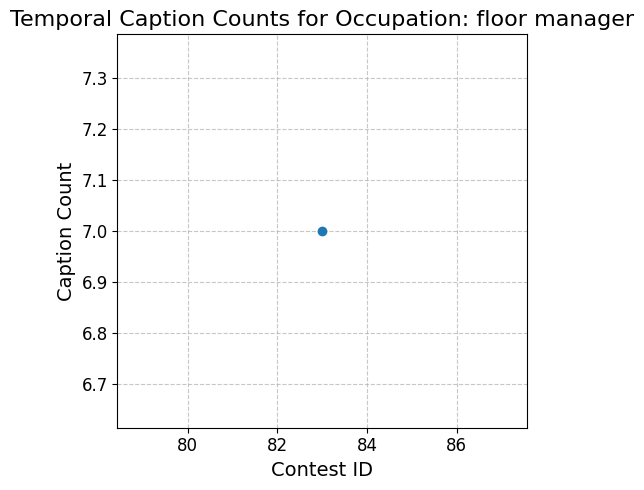

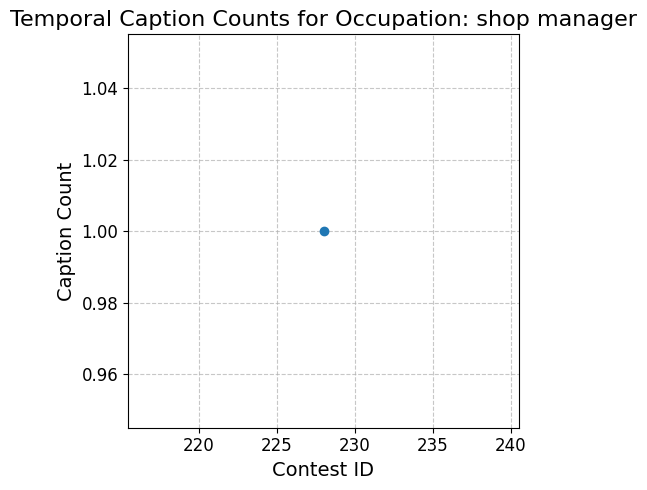

Occupation 'store manager' not found in the data.
Occupation 'production manager' not found in the data.


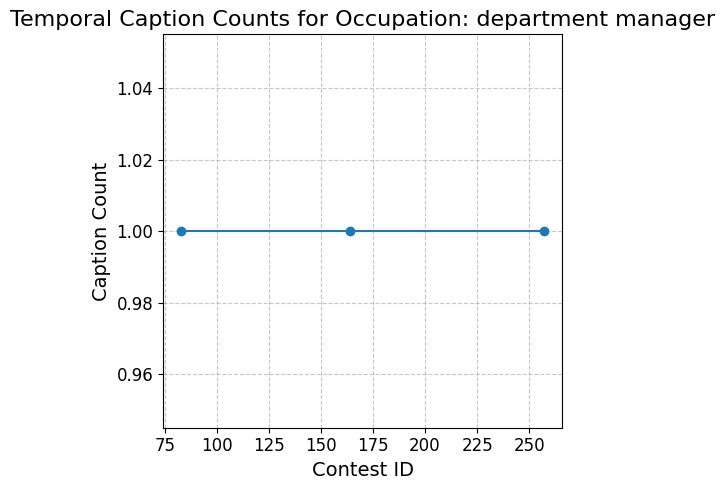

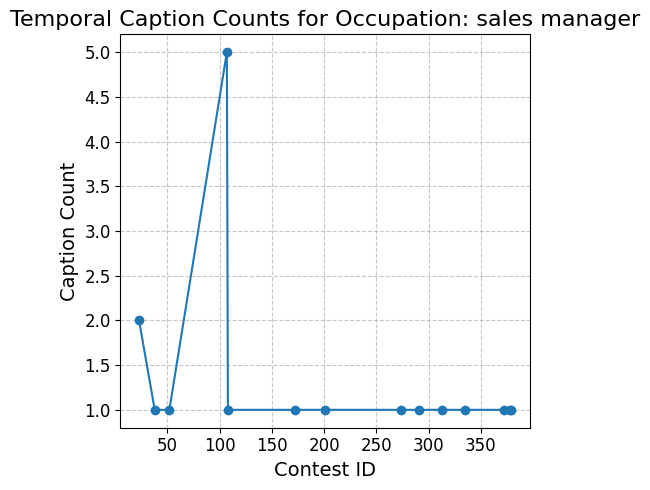

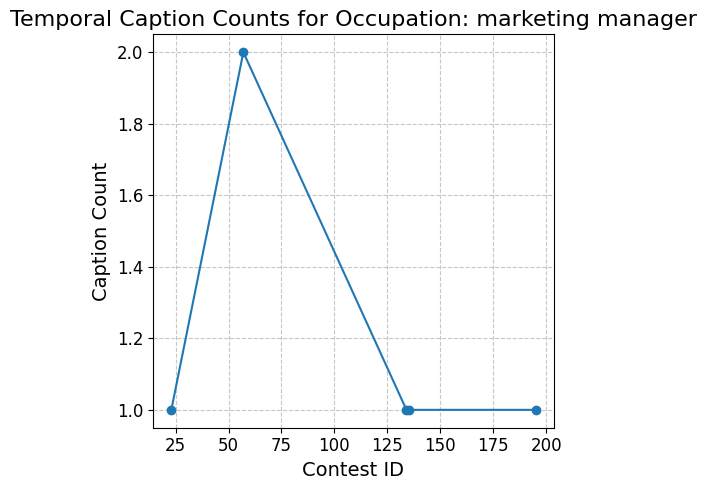

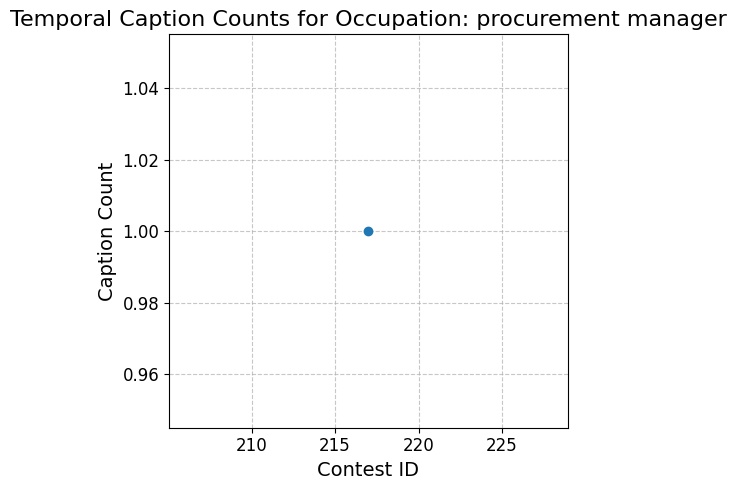

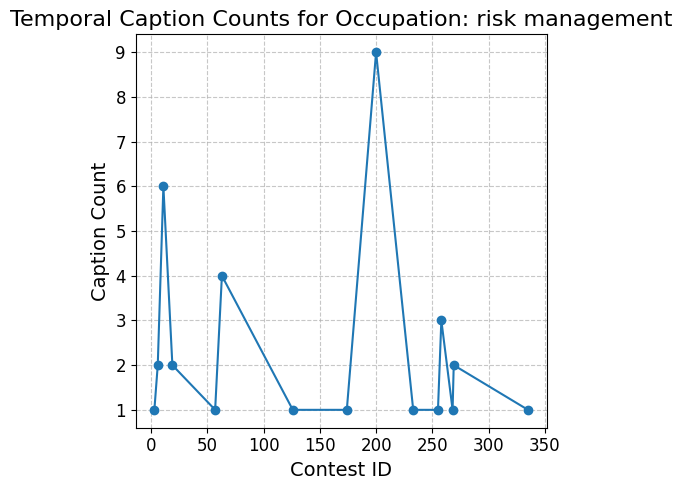

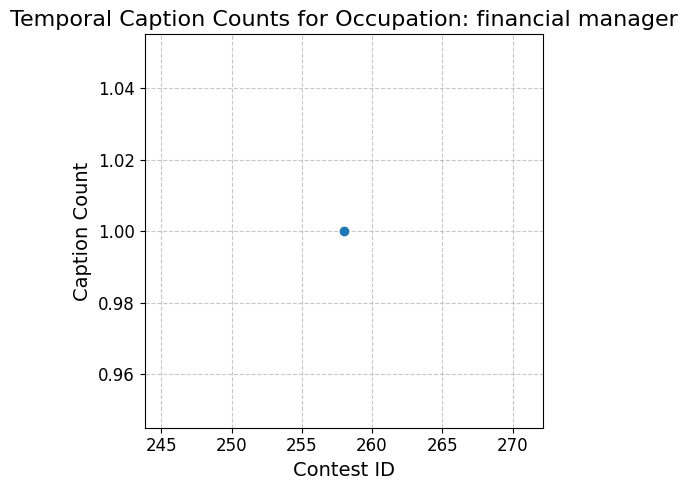

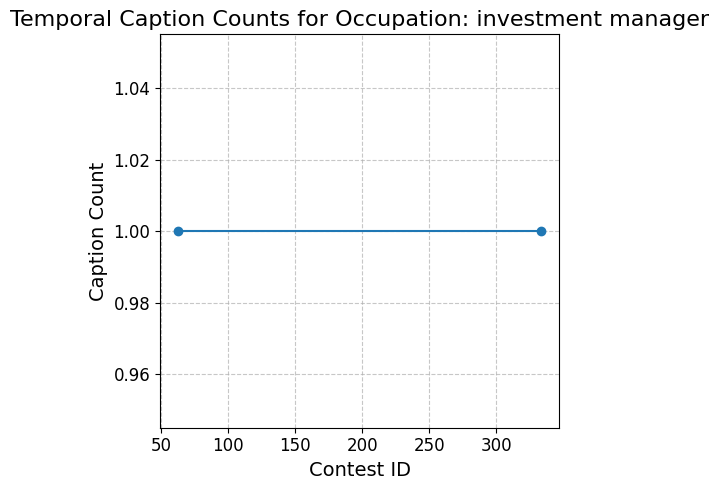

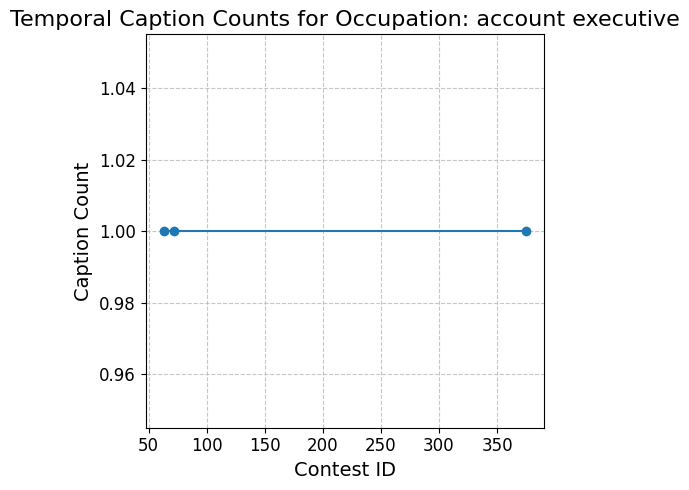

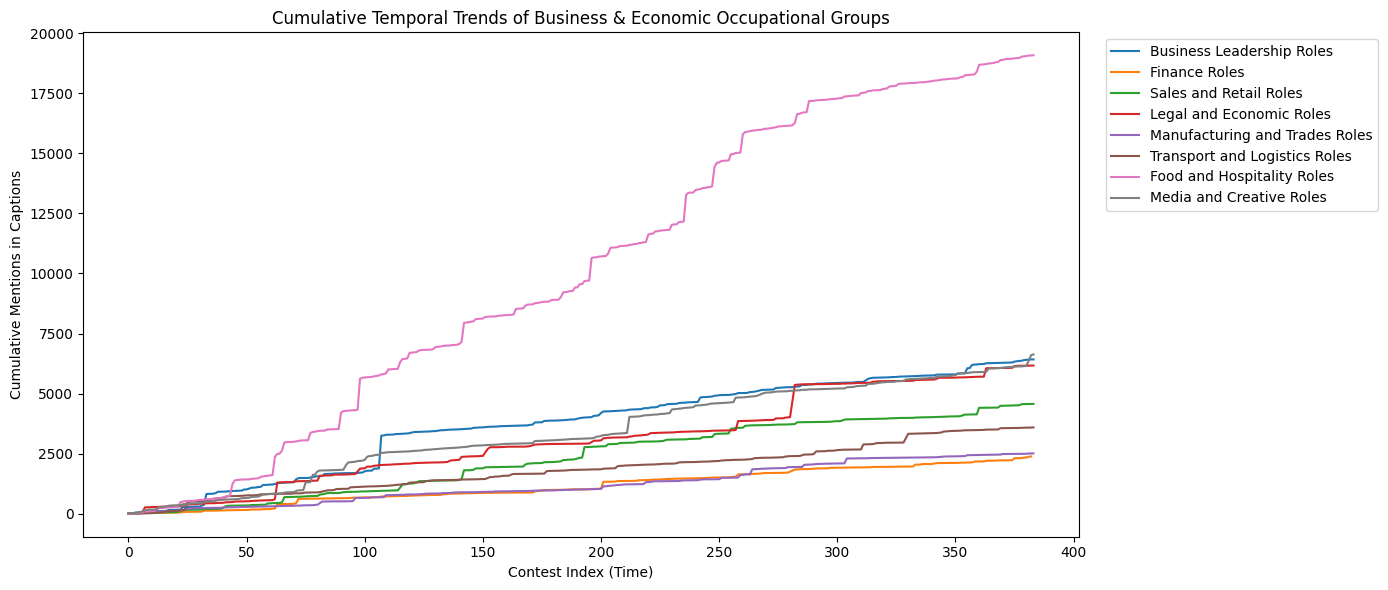

In [49]:
#choose which group to track:
group_to_track = business_leadership
#Temporal analysis of each of these groups
occ_to_temporal = dict(zip(occupation_analysis_df['Occupation_Term'], occupation_analysis_df['Temporal_Counts']))
for occ in group_to_track:
    if occ in occ_to_temporal:
        temporal_counts = occ_to_temporal[occ]
        # Sort by contest_id
        sorted_counts = dict(sorted(temporal_counts.items()))
        
        plt.figure(figsize=(5, 5))
        plt.plot(
            list(sorted_counts.keys()),
            list(sorted_counts.values()),
            marker='o',
            label=occ
        )
        plt.title(f"Temporal Caption Counts for Occupation: {occ}", fontsize=16)
        plt.xlabel("Contest ID", fontsize=14)
        plt.ylabel("Caption Count", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Occupation '{occ}' not found in the data.")
    
business_econ_group_counts = {
    "Business Leadership Roles": business_leadership,
    "Finance Roles": finance_roles,
    "Sales and Retail Roles": sales_retail,
    "Legal and Economic Roles": legal_econ_roles,
    "Manufacturing and Trades Roles": manufacturing_trades,
    "Transport and Logistics Roles": transport_logistics,
    "Food and Hospitality Roles": food_hospitality,
    "Media and Creative Roles": media_creative
}
#cumulative trends of the business/economic groups
group_temporal_counts = {}
for group_name, occupations in business_econ_group_counts.items():
    counts_per_contest = defaultdict(int)
    for occ in occupations:
        if occ in occ_to_temporal:
            occ_lower= occ.lower()
            if occ_lower not in occ_to_temporal:
                continue
            temporal_dict = occ_to_temporal[occ_lower]

            #adding each contest count to the group 
            for contest_id, count in temporal_dict.items():
                counts_per_contest[contest_id] += count

    s = pd.Series(counts_per_contest).sort_index()

    group_temporal_counts[group_name] = s
plt.figure(figsize=(14, 6))

for group_name, series in group_temporal_counts.items():
    if series.sum() < 5:   # skip uninformative groups
        continue
    plt.plot(
        series.index, 
        series.cumsum().values,   # <-- cumulative sum
        label=group_name
    )
plt.title("Cumulative Temporal Trends of Business & Economic Occupational Groups")
plt.xlabel("Contest Index (Time)")
plt.ylabel("Cumulative Mentions in Captions")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


---
# <center> Part 5: Alignment with cartoon context

We now want to check if captions are funnier when the occupation they have in it matches the depicted cartoon. How does the cartoon context influence the cartoon according to the metadata?


In [50]:
import re

In [51]:
'''# load all occupation data
df_occupations = pd.read_csv("final_combined_occupations.csv")

metadata = dataC_v2.copy()

# Extract occupation list (singular, canonical)
occupations = df_occupations["Occupation"].str.lower().tolist()

# Expand synonyms
df_occupations["Synonyms"] = df_occupations["Synonyms"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Build synonym to occupation mapping
syn_to_occ = {
    synonym.lower(): occ.lower()
    for occ, syns in zip(df_occupations["Occupation"], df_occupations["Synonyms"])
    for synonym in syns
}

# Helper function to flatten text fields
def flatten_text(x):
    if isinstance(x, list):
        return " ".join(x).lower()
    if isinstance(x, str):
        return x.lower()
    return ""


# tracking which occupations appear in which contests and sections
meta_occ_dict = {
    occ: {
        "normal": set(),
        "uncanny": set(),
        "question": set(),
        "total": set()
    }
    for occ in occupations
}


for contest_id, row in dataC_v2.iterrows():
    
    # Flatten metadata fields
    normal_text  = flatten_text(row["cleaned_image_descriptions_v2"])
    uncanny_text = flatten_text(row["cleaned_image_uncanny_descriptions_v2"])
    question_text = flatten_text(row["cleaned_question_descriptions_v2"])
    
    # Track which occupations appear in each section
    present_normal = set()
    present_uncanny = set()
    present_question = set()
    
    for syn, occ in syn_to_occ.items():
        pattern = r"\b" + re.escape(syn) + r"\b"
        
        if re.search(pattern, normal_text):
            present_normal.add(occ)
        if re.search(pattern, uncanny_text):
            present_uncanny.add(occ)
        if re.search(pattern, question_text):
            present_question.add(occ)
    
    # Assign contest_id to the correct set
    for occ in present_normal:
        meta_occ_dict[occ]["normal"].add(contest_id)
        meta_occ_dict[occ]["total"].add(contest_id)

    for occ in present_uncanny:
        meta_occ_dict[occ]["uncanny"].add(contest_id)
        meta_occ_dict[occ]["total"].add(contest_id)

    for occ in present_question:
        meta_occ_dict[occ]["question"].add(contest_id)
        meta_occ_dict[occ]["total"].add(contest_id)


df_meta_occ = pd.DataFrame({
    "Occupation": occupations,
    "Contests_Normal":   [sorted(list(meta_occ_dict[occ]["normal"]))   for occ in occupations],
    "Contests_Uncanny":  [sorted(list(meta_occ_dict[occ]["uncanny"]))  for occ in occupations],
    "Contests_Question": [sorted(list(meta_occ_dict[occ]["question"])) for occ in occupations],
    "Contests_Total":    [sorted(list(meta_occ_dict[occ]["total"]))    for occ in occupations],
})

df_meta_occ["Normal_Text"] = dataC_v2["cleaned_image_descriptions_v2"]
df_meta_occ["Uncanny_Text"] = dataC_v2["cleaned_image_uncanny_descriptions_v2"]
df_meta_occ["Question_Text"] = dataC_v2["cleaned_question_descriptions_v2"]
df_meta_occ["Location"] = dataC_v2["image_locations"]

binary_matrix = pd.DataFrame({
    occ: df_meta_occ["Contests_Total"].apply(lambda lst, o=occ: int(o in lst))
    for occ in occupations
})

#save to csv
df_meta_occ.to_csv("occupation_contest_participation.csv", index=False)

#save the dictionary as a json
import json
meta_occ_dict_json = {
    occ: {
        "normal": sorted(list(vals["normal"])),
        "uncanny": sorted(list(vals["uncanny"])),
        "question": sorted(list(vals["question"])),
        "total": sorted(list(vals["total"]))
    }
    for occ, vals in meta_occ_dict.items()
}

# Save to JSON
with open("occupation_contest_participation.json", "w") as f:
    json.dump(meta_occ_dict_json, f)

#save the matrix to csv
binary_matrix.to_csv("occupation_contest_binary_matrix.csv", index=False)
'''

'# load all occupation data\ndf_occupations = pd.read_csv("final_combined_occupations.csv")\n\nmetadata = dataC_v2.copy()\n\n# Extract occupation list (singular, canonical)\noccupations = df_occupations["Occupation"].str.lower().tolist()\n\n# Expand synonyms\ndf_occupations["Synonyms"] = df_occupations["Synonyms"].apply(\n    lambda x: ast.literal_eval(x) if isinstance(x, str) else x\n)\n\n# Build synonym to occupation mapping\nsyn_to_occ = {\n    synonym.lower(): occ.lower()\n    for occ, syns in zip(df_occupations["Occupation"], df_occupations["Synonyms"])\n    for synonym in syns\n}\n\n# Helper function to flatten text fields\ndef flatten_text(x):\n    if isinstance(x, list):\n        return " ".join(x).lower()\n    if isinstance(x, str):\n        return x.lower()\n    return ""\n\n\n# tracking which occupations appear in which contests and sections\nmeta_occ_dict = {\n    occ: {\n        "normal": set(),\n        "uncanny": set(),\n        "question": set(),\n        "total": set()

Below are four graphs:
1. Scatterplot of any occupation present in the normal section, uncanny section, or question section, colour coded, and temporal axis as x-axis.
2. Timeline of Top occupations (highlight the top 20)
3. number of occupations per contest (bars)
4. Heatmap of top occupations across contests.

In [ ]:
import json
#load from csv
df_meta_occ = pd.read_csv("occupation_contest_participation.csv")

#load the dictionary from json
with open("occupation_contest_participation.json", "r") as f:
    meta_occ_loaded = json.load(f)

meta_occ_dict = {
    occ: {
        "normal": set(vals["normal"]),
        "uncanny": set(vals["uncanny"]),
        "question": set(vals["question"]),
        "total": set(vals["total"])
    }
    for occ, vals in meta_occ_loaded.items()
}

# load the matrix from csv
binary_matrix = pd.read_csv("occupation_contest_binary_matrix.csv")

num_contests = len(dataC_v2)

# Initialize 0/1 arrays
normal_flag = np.zeros(num_contests)
uncanny_flag = np.zeros(num_contests)
question_flag = np.zeros(num_contests)

# Fill flags: any occupation → mark contest_id = 1
for occ in meta_occ_dict:
    for c in meta_occ_dict[occ]["normal"]: # mispelled: mor3mal by accident
        normal_flag[c] = 1
    for c in meta_occ_dict[occ]["uncanny"]:
        uncanny_flag[c] = 1
    for c in meta_occ_dict[occ]["question"]:
        question_flag[c] = 1
#save flags to dataframe
flags_df = pd.DataFrame({
   "Contest_ID": range(num_contests),
    "Occupation_in_Normal": normal_flag,
    "Occupation_in_Uncanny": uncanny_flag,
    "Occupation_in_Question": question_flag
})
#save to csv
flags_df.to_csv("occupation_presence_flags.csv", index=False)


204


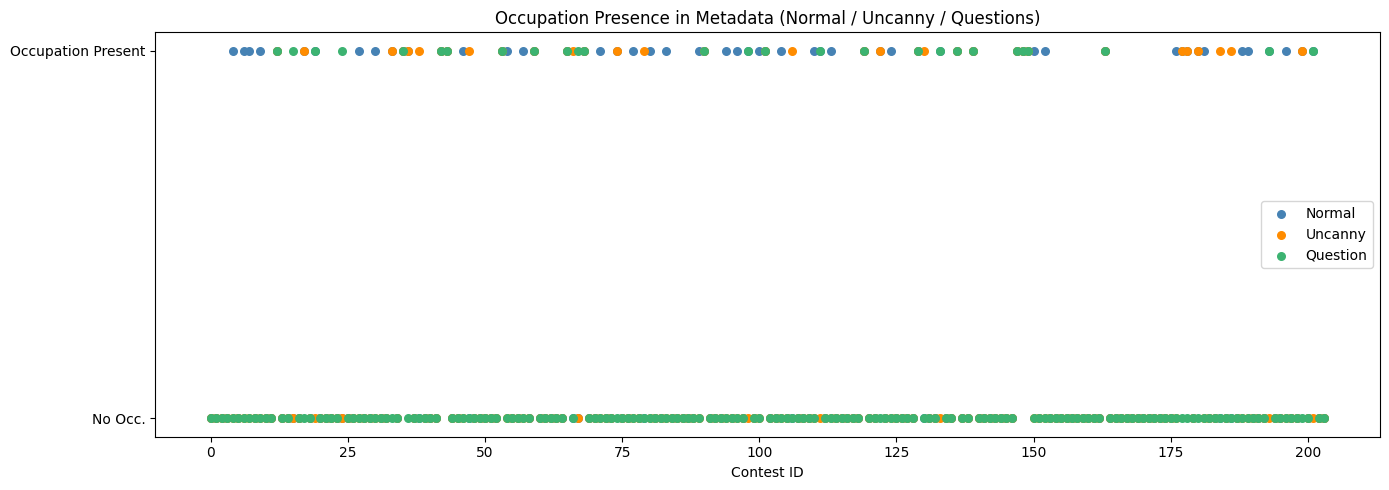

In [ ]:
#load flags from dataframe
flags_df = pd.read_csv("occupation_presence_flags.csv")
normal_flag = flags_df["Occupation_in_Normal"].values
uncanny_flag = flags_df["Occupation_in_Uncanny"].values
question_flag = flags_df["Occupation_in_Question"].values

plt.figure(figsize=(14, 5))
print(len(dataC_v2))
plt.scatter(range(len(dataC_v2)), normal_flag[:len(dataC_v2)],   color="steelblue",   label="Normal",   s=30)
plt.scatter(range(len(dataC_v2)), uncanny_flag[:len(dataC_v2)],  color="darkorange",  label="Uncanny",  s=30)
plt.scatter(range(len(dataC_v2)), question_flag[:len(dataC_v2)], color="mediumseagreen", label="Question", s=30)

plt.yticks([0, 1], ["No Occ.", "Occupation Present"])
plt.xlabel("Contest ID")
plt.title("Occupation Presence in Metadata (Normal / Uncanny / Questions)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
occ_count_per_contest = np.zeros(num_contests)

# For each contest, count how many occupations appear in metadata
for occ in meta_occ_dict:
    for c in meta_occ_dict[occ]["total"]:
        occ_count_per_contest[c] += 1

plt.figure(figsize=(14, 5))
plt.bar(range(num_contests), occ_count_per_contest, color="cornflowerblue")

plt.xlabel("Contest ID")
plt.ylabel("Number of Occupations in Metadata")
plt.title("Occupational Density of Cartoon Metadata per Contest")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import seaborn as sns

top_k = 20
top_occ = df_meta_occ.sort_values("Num_Total", ascending=False).head(top_k)["Occupation"]

heatmap_matrix = np.zeros((top_k, num_contests))

for i, occ in enumerate(top_occ):
    for c in meta_occ_dict[occ]["total"]:
        heatmap_matrix[i, c] = 1

plt.figure(figsize=(16, 7))
sns.heatmap(
    heatmap_matrix,
    cmap="Blues",
    cbar=False,
    yticklabels=top_occ.tolist(),
    xticklabels=False
)

plt.title("Heatmap of Top Occupations Across Contests", fontsize=16)
plt.xlabel("Contest ID")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()


Now we want to check how the image (metadata) influences people to talk about occupations. We will see which occupation occurs in the metadata and how the image context may influence the occupations in the captions, how frequently occupation based humouor is used, and so forth.

---
## <center> Next plot

Pie chart of most common locations in images

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all locations across contests
all_locations = []

for loc_list in dataC_v2["image_locations"]:
    if isinstance(loc_list, list):
        all_locations.extend([loc.lower().strip() for loc in loc_list])
    elif isinstance(loc_list, str):  
        # in case some rows accidentally saved a single string
        all_locations.append(loc_list.lower().strip())

# Count locations
location_counts = Counter(all_locations)

# Convert to DataFrame for convenience
df_locations = pd.DataFrame(
    location_counts.items(), columns=["Location", "Count"]
).sort_values(by="Count", ascending=False)

TOP_N = 15  # choose how many to show

# Bar plot of top locations
plt.figure(figsize=(9, 6))
sns.barplot(
    data=df_locations.head(TOP_N),
    x="Location",
    y="Count",
    palette="inferno"
)
plt.title(f"Top {TOP_N} Image Locations in Metadata", fontsize=16)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Number of Contests", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Pie chart of top locations
plt.figure(figsize=(10, 10))
plt.pie(
    df_locations.head(TOP_N)["Count"],
    labels=df_locations.head(TOP_N)["Location"],
    autopct='%1.1f%%',
    startangle=140
)
plt.title(f"Top {TOP_N} Image Locations (Proportion)", fontsize=16)
plt.tight_layout()
plt.show()

print("print all locations with counts:")
for loc, count in location_counts.most_common():
    print(f"{loc}: {count}")

#print total unique locations as a list
unique_locations = list(location_counts.keys())
print("Unique locations:", unique_locations)

#print all occupations in my dataset
all_occupations = df_meta_occ["Occupation"].tolist()

#print all occupations in my captions


We need to connect locations that occur with expected jobs related to the specific location. This way we can check the image and how that affects the occupation present. Is the occupation that is mentioned what we expect? what occupation occurs most frequenlty with the top 20 locations.

TODOS
1. For each location, determine which occupations appear most often in captions.
2. For each location, build a list of “expected occupations."
3. Compare expected vs. actual
    - For each location:

    - Which expected occupations are NOT mentioned?

    - Which unexpected occupations ARE mentioned?

    - Do unexpected jobs correlate with higher funny_score?

In [ ]:
print(occupation_analysis_df['Occupation_Term'].tolist())

In [ ]:
import ast
from collections import defaultdict

# load metadata occupation participation
df_meta_occ = pd.read_csv("occupation_contest_participation.csv")

# convert stored lists back to python lists
df_meta_occ["Contests_Total"] = df_meta_occ["Contests_Total"].apply(ast.literal_eval)

# reverse index: contest_id → set of occupations from metadata
expected_by_contest = defaultdict(set)

for _, row in df_meta_occ.iterrows():
    occ = row["Occupation"].lower()
    for cid in row["Contests_Total"]:
        expected_by_contest[cid].add(occ)

# build dataframe: one row per contest
rows = []

for cid in range(len(dataC_v2)):
    rows.append({
        "contest_id": cid,
        "location": dataC_v2.loc[cid, "image_locations"],
        "expected_occupations": sorted(list(expected_by_contest[cid]))
    })

df_expected = pd.DataFrame(rows)


In [ ]:
rows = []

for cid in range(len(dataC_v2)):
    # Count occupations that appear in this contest
    num_normal = sum(cid in meta_occ_dict[occ]["normal"] for occ in occupations)
    num_uncanny = sum(cid in meta_occ_dict[occ]["uncanny"] for occ in occupations)
    num_question = sum(cid in meta_occ_dict[occ]["question"] for occ in occupations)
    
    rows.append({
        "contest_id": cid,
        "location": dataC_v2.loc[cid, "image_locations"],
        "num_occ_normal": num_normal,
        "num_occ_uncanny": num_uncanny,
        "num_occ_question": num_question,
        "num_occ_total": num_normal + num_uncanny + num_question,
        "expected_occupations": df_expected[df_expected["contest_id"] == cid]["expected_occupations"].values[0]
    })

df_context_summary = pd.DataFrame(rows)


In [ ]:
df_occupations = pd.read_csv("final_combined_occupations.csv")

# Convert each string to a Python list
df_occupations['Synonyms'] = df_occupations['Synonyms'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# create mapping from singular term to plural. We already have this in occupational data
# Create a mapping from synonym to occupation
occupations = df_occupations['Occupation']
synonyms_list = df_occupations['Synonyms'].tolist()

syn_to_occ = {
    synonym.lower(): occ
    for occ, synonyms in zip(occupations, synonyms_list)
    for synonym in synonyms
}

# All occupation tokens (synonyms included)
occupation_terms = set(syn_to_occ.keys())

# canonical occupation set
canonical_occupations = set(occupations)

from collections import defaultdict

caption_contest_occ = defaultdict(set)

for idx, caption in enumerate(documents):
    contest_id = all_contest_ids[idx]

    # tokenise ONCE
    tokens = set(caption.lower().split())

    # find occupation-related tokens
    matched_terms = tokens & occupation_terms

    # map to canonical occupations
    for term in matched_terms:
        caption_contest_occ[contest_id].add(syn_to_occ[term])

rows = []
for cid in range(len(dataA_v2)):
    rows.append({
        "contest_id": cid,
        "occupations": sorted(list(caption_contest_occ.get(cid, set()))),
        "num_occupations": len(caption_contest_occ.get(cid, set()))
    })

caption_contest_df = pd.DataFrame(rows)

#save to csv
caption_contest_df.to_csv("caption_contest_occupations.csv", index=False)


---
# <center> Part 6 Language Context Around Occupations

In [ ]:
from collections import defaultdict
import pandas as pd

# assume:
# documents = cleaned captions (strings)
# all_contest_ids = contest id per caption
# syn_to_occ = synonym → canonical occupation mapping
# occupations = canonical occupation list

rows = []

for idx, caption in enumerate(documents):
    tokens = caption.lower().split()
    token_set = set(tokens)

    # occupations present in this caption
    occs_in_caption = {
        syn_to_occ[t] for t in token_set if t in syn_to_occ
    }

    if not occs_in_caption:
        continue

    for occ in occs_in_caption:
        # context = all tokens except occupation synonyms
        context_tokens = [
            t for t in tokens
            if t not in syn_to_occ or syn_to_occ[t] != occ
        ]

        rows.append({
            "caption_id": idx,
            "contest_id": all_contest_ids[idx],
            "occupation": occ,
            "context_tokens": context_tokens
        })

df_occ_context = pd.DataFrame(rows)
